## If error downloading weights due to firewall:
Find the .deepface dicretory (https://stackoverflow.com/questions/76620093/keyerror-when-initializing-resnet-using-dlib-in-python)

Search for the weights trying to download in the error message on google/git

Download them and save them in the .deepface/weights folder



In [1]:
# import face_recognition
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import json
import numpy as np
import random
import pandas as pd
# from google.colab.patches import cv2_imshow

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as p
from scipy.stats import mannwhitneyu
from numpy.linalg import norm
import os
import scipy.stats as stats

2024-10-16 14:58:39.143086: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 14:58:44.477029: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 14:58:44.479904: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-16 14:58:47.660068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
PATH = '/mnt/iDriveShare/Kayla/CBCT_images/anonymized/screenshots/'

In [254]:
# TO DO, match with directory of images

### Example Using DeepFace

In [284]:
patient = 'sample'

In [285]:
PATH = '/mnt/iDriveShare/Kayla/CBCT_images/anonymized/screenshots/'
image_path_1 = PATH+patient+"_1.png"
image_path_2 =  PATH+patient+"_2.png"
image_path_A =  PATH+patient+"_A.png"
image_path_phant = PATH+"phant.png"
image_path_phantcrop = PATH+ "phantcrop.png"

In [291]:
faces = DeepFace.extract_faces(image_path_1)#,model='Facenet')#,enforce_detection=False)

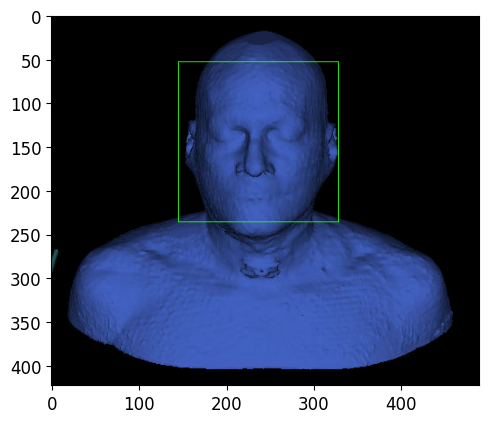

In [292]:
image = cv2.imread(image_path_1)  
x = faces[0]['facial_area']['x']
y = faces[0]['facial_area']['y']
w = faces[0]['facial_area']['w']
h = faces[0]['facial_area']['h']
image = cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)
plt.imshow(image)

In [ ]:
# DeepFace.analyze(img_path = image_path_1, actions = ['age', 'gender', 'race', 'emotion']) 

## Example Tests

In [345]:
# original list
# list_patients = ['19','54','59','70','81','118','272','274','384','437','447','448']
list_patients=['118','447','910']

In [320]:
def test_face(list_patients,num = ["1","2","A"], detector="retinaface"):
    
    for p in list_patients:
        for n in num:
            try:
                faces = DeepFace.represent(PATH+p+"_"+n+".png",detector_backend=detector)

                print(p, n,':', faces[0]['face_confidence'])
            except Exception as e:
                print("NO FACE", p,  n)


In [321]:
test_face(list_patients)

118 1 : 1.0
118 2 : 1.0
118 A : 1.0
447 1 : 1.0
447 2 : 1.0
447 A : 1.0


In [322]:
results_1_2 = []
results_A_2 = []

for p in list_patients:
    
    print(p)
    if p not in skip:
        result = DeepFace.verify(img1_path = PATH+p+"_1.png", img2_path = PATH+p+'_2.png', detector_backend='retinaface',enforce_detection=False,threshold=0.4)
        results_1_2.append(result['distance'])
        print("1 vs 2",result['distance'])

        result = DeepFace.verify(img1_path = PATH+p+"_A.png", img2_path = PATH+p+"_2.png", detector_backend='retinaface', enforce_detection=False,threshold=0.4)
        results_A_2.append(result['distance'])
        print("A vs 2",result['distance'])

118
1 vs 2 0.15215399715564604
A vs 2 0.6476642369752892
447
1 vs 2 0.18599447776312406
A vs 2 0.6466165327378031


In [131]:
# def generate_TSNE():


def get_embeddings(list_patients, num=["1","2","A"],detector='retinaface',model='facenet512'):
    dict_emb = {}
    # colours = ['red','blue','magenta','cyan','orange','lime','yellow','green','purple','salmon','cadetblue','olive']
    colours = [
        'red', 'blue', 'magenta', 'cyan', 'orange', 'lime', 'yellow', 'green', 'purple', 'salmon', 'cadetblue', 'olive',
        'pink', 'brown', 'black', 'papayawhip', 'grey', 'navy', 'teal', 'maroon', 'gold', 'silver', 'coral', 'indigo', 'violet',
        'turquoise', 'khaki', 'lavender', 'maroon', 'plum'
    ]
    
    for i, p in enumerate(list_patients):
        dict_emb[p] = {}
        for n in num:
            dict_emb[p][n] = {}
            dict_emb[p][n]['colour'] = colours[i]

            #embeddings
            embedding_objs = DeepFace.represent(img_path = PATH+p+"_"+n+".png", enforce_detection=False,detector_backend=detector,model=model) 

            print(p,n,embedding_objs[0]['face_confidence'])
            dict_emb[p][n]['embedding'] = embedding_objs[0]['embedding']

    return dict_emb

In [156]:
# def generate_TSNE():


def get_embeddings_from_dict(list_patients, num=["1","2","A"],detector='retinaface',model='facenet512'):
    dict_emb_ = {}
    # colours = ['red','blue','magenta','cyan','orange','lime','yellow','green','purple','salmon','cadetblue','olive']
        colours = [
        'red', 'blue', 'magenta', 'cyan', 'orange', 'lime', 'yellow', 'green', 'purple', 'salmon', 'cadetblue', 'olive',
        'pink', 'brown', 'black', 'white', 'grey', 'navy', 'teal', 'maroon', 'gold', 'silver', 'coral', 'indigo', 'violet',
        'turquoise', 'khaki', 'lavender', 'plum', 'beige', 'crimson', 'fuchsia', 'skyblue', 'chartreuse', 'chocolate', 'mint',
        'peach', 'orchid', 'amber', 'azure', 'emerald', 'ruby', 'sapphire', 'tan', 'periwinkle', 'mustard', 'apricot',
        'thistle', 'cerulean', 'wheat', 'blush', 'copper', 'lemon', 'sienna', 'ivory', 'tomato', 'charcoal', 'aqua', 'amethyst'
    ]

    for i, p in enumerate(list_patients):
        dict_emb[p] = {}
        for n in num:
            dict_emb[p][n] = {}
            dict_emb[p][n]['colour'] = colours[i]

            #embeddings
            embedding_objs = DeepFace.represent(img_path = PATH+p+"_"+n+".png", enforce_detection=False,detector_backend=detector,model=model) 

            print(p,n,embedding_objs[0]['face_confidence'])
            dict_emb[p][n]['embedding'] = embedding_objs[0]['embedding']

    return dict_emb

In [219]:
def plot_embeddings(dict_emb, num=['1', '2', 'A'], skip=[]):
    X = []
    c = []
    y = []
    labels = []
    colours = [
        'red', 'blue', 'magenta', 'cyan', 'orange', 'lime', 'yellow', 'green', 'purple', 'salmon', 'cadetblue', 'olive',
        'pink', 'brown', 'black', 'white', 'grey', 'navy', 'teal', 'maroon', 'gold', 'silver', 'coral', 'indigo', 'violet',
        'turquoise', 'khaki', 'lavender', 'forestgreen', 'beige', 'crimson', 'fuchsia', 'skyblue', 'chartreuse', 'chocolate', 'mint',
        'peach', 'orchid', 'amber', 'azure', 'emerald', 'ruby', 'sapphire', 'tan', 'periwinkle', 'mustard', 'apricot',
        'thistle', 'cerulean', 'wheat', 'blush', 'copper', 'lemon', 'sienna', 'ivory', 'tomato', 'charcoal', 'aqua', 'amethyst'
    ]

    colours = [
    '#FF0000', '#0000FF', '#FF00FF', '#00FFFF', '#FFA500', '#00FF00', '#FFFF00', '#008000', '#800080', '#FA8072',
    '#5F9EA0', '#808000', '#FFC0CB', '#A52A2A', '#000000', '#FFFFFF', '#808080', '#000080', '#008080', '#800000',
    '#FFD700', '#C0C0C0', '#FF7F50', '#4B0082', '#EE82EE', '#40E0D0', '#F0E68C', '#E6E6FA', '#228B22', '#F5F5DC',
    '#DC143C', '#FF00FF', '#87CEEB', '#7FFF00', '#D2691E', '#98FF98', '#FFE5B4', '#DA70D6', '#FFBF00', '#007FFF',
    '#50C878', '#E0115F', '#0F52BA', '#D2B48C', '#CCCCFF', '#FFDB58', '#FBCEB1', '#D8BFD8', '#007BA7', '#F5DEB3',
    '#DE5D83', '#B87333', '#FFF700', '#A0522D', '#FFFFF0', '#FF6347', '#36454F', '#00FFFF', '#9966CC'
]
    
    for i, p in enumerate([x for x in dict_emb if x not in skip]):
        for n in num:
            X.append(dict_emb[p][n][0]['embedding'])
            c.append(colours[i])
            y.append(p)
            labels.append(p + "_" + n)
    
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(np.array(X))
    
    # Create a DataFrame for plotting
    embeddings_df = pd.DataFrame(X_tsne, columns=["x", "y"])
    embeddings_df["label"] = y
    
    # Scatter plot with colors
    fig, ax = plt.subplots(figsize=(14, 12))
    custom_palette = sns.color_palette(colours)
    sns.scatterplot(x="x", y="y", s=100, hue="label", palette=custom_palette, data=embeddings_df, alpha=1, ax=ax)
    
    # Add labels to each point with smaller font size
    x = [item[0] for item in X_tsne]
    y = [item[1] for item in X_tsne]
    for i, txt in enumerate(labels):
        plt.text(x[i], y[i], txt, fontsize=8, ha='center', va='bottom')  # Adjust font size here
    
    plt.title("t-SNE Visualization")
    
    # Adjust legend to be outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
    
    plt.show()


In [353]:
# skip = ['118','274','384','59','447']

In [391]:
# embs = get_embeddings(list_patients)

In [390]:
# plot_embeddings(embs)

In [358]:
len(X)

4

In [359]:
distances = []
list_to_do = list_patients.copy()
for p1 in [p for p in list_patients if p not in skip]:
    list_to_do.remove(p1)
    for p2 in [p for p in list_to_do if p not in skip and p != p1]:
        result = DeepFace.verify(img1_path = PATH+p1+"_2.png", img2_path = PATH+p2+'_2.png', enforce_detection=False,threshold=0.4)
        print(p1,"vs",p2,result['distance'])
        distances.append(result['distance'])

118 vs 447 0.2460139329240152
118 vs 910 0.5050207749089821
447 vs 910 0.5002713519143366


In [67]:
def plot_whiskers_3(results_1_2, results_diff,results_A_2):
    data = [results_1_2, results_diff,results_A_2]
    plt.rcParams['font.size'] = 12.
    # Create a figure instance
    fig = plt.figure(figsize=(4,5))
    
    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])
    
    # Create the boxplot
    bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)
    
    colors = ['#0000FF', '#00FF00', '#FFFF00']
    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Changing color and line width of whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                    linewidth = 1.5,
                    linestyle =":")
    
    # Changing color and line width of caps
    for cap in bp['caps']:
        cap.set(color ='black',
                linewidth = 2)
    
    # # Changing color and line width of medians
    # for median in bp['medians']:
    #     median.set(color ='red',
    #                linewidth = 3)
    
    # # Changing style of fliers
    # for flier in bp['fliers']:
    #     flier.set(marker ='D',
    #                color ='#e7298a',
    #                alpha = 0.5)
        
    # # x-axis labels
    ax.set_xticklabels(['CT1-CT2',  'CT1 to \nother patient','CT 1 (Anon) to \n CT 2'])
    plt.ylabel("Cosine Similarity")

    
    # # Removing top axes and right axes
    # # ticks
    # ax.get_xaxis().tick_bottom()
    # ax.get_yaxis().tick_left()
    ax.set_ylim(ymin=0)#,ymax=1)
    # show plot
    plt.show()
        

In [68]:
plot_whiskers_3(results_1_2, distances,results_A_2)

NameError: name 'results_1_2' is not defined

In [368]:
same_image =[]

list_to_do = list_patients.copy()
for p1 in [p for p in list_patients if p not in skip]:

    result = DeepFace.verify(img1_path = PATH+p1+"_1.png", img2_path = PATH+p1+'_1.png', enforce_detection=False,threshold=0.4)
    print(p1,"1 vs 1",result['distance'])
    same_image.append(result['distance'])

  4%|██████▊                                                                                                                                                                                    | 19.4M/537M [1:24:22<37:32:12, 3.83kB/s]


118 1 vs 1 0.0
447 1 vs 1 -2.220446049250313e-16
910 1 vs 1 0.0


In [46]:
distances_2_1_other = []
list_to_do = list_patients.copy()
for p1 in [p for p in list_patients if p not in skip]:
#     list_to_do.remove(p1)
    for p2 in [p for p in list_to_do if p not in skip and p != p1]:
        result = DeepFace.verify(img1_path = PATH+p1+"_1.png", img2_path = PATH+p2+'_2.png', enforce_detection=False,threshold=0.4)
        print(p1,"vs",p2,result['distance'])
        distances_2_1_other.append(result['distance'])

19 vs 54 0.48890561497980367
19 vs 70 0.43113179034248794
19 vs 81 0.4865805041696747
19 vs 272 0.22366109493647668
19 vs 437 0.575591546727991
19 vs 448 0.3890026200643073
54 vs 19 0.47793568246626295
54 vs 70 0.5512119347506736
54 vs 81 0.6012282186780455
54 vs 272 0.5076429122726083
54 vs 437 0.5071051727407361
54 vs 448 0.6499456293949728
70 vs 19 0.3979541570215408
70 vs 54 0.5434322671137787
70 vs 81 0.6720801011196291
70 vs 272 0.5785289691350262
70 vs 437 0.667000163149585
70 vs 448 0.6024961540742135
81 vs 19 0.5081618448777717
81 vs 54 0.5482713277071409
81 vs 70 0.639627157443414
81 vs 272 0.4464708928148188
81 vs 437 0.5355470297059288
81 vs 448 0.3157109242502083
272 vs 19 0.5007280165707072
272 vs 54 0.620529384117657
272 vs 70 0.7491128546113829
272 vs 81 0.5761308615390388
272 vs 437 0.6251243576243011
272 vs 448 0.7251506482131469
437 vs 19 0.5146091608016685
437 vs 54 0.4225201814759916
437 vs 70 0.4226979940655847
437 vs 81 0.4978827321225978
437 vs 272 0.60734912133

### New cohort


In [381]:
list_patients = ['118','272','437','447','462','600','625','628',
                 '633','638','644','651','673','685','734','755',
                 '790','848','892','910','965','946','961','1288',
                 '1314','1502','1763','1892','2037','2056']#['19','54','59','70','81','118','272','274','384','437','447','448']
print(len(list_patients)) # skipping 877 as covered by bolus

30


In [382]:
skip = ['600','638','633','651','685','625','755','892','1502','1763','734','1892']

In [383]:
new_list = sorted([int(f) for f in list_patients if f not in skip])
print(new_list)
print(len(new_list))
print(len(list_patients))
print(len(skip))

[118, 272, 437, 447, 462, 628, 644, 673, 790, 848, 910, 946, 961, 965, 1288, 1314, 2037, 2056]
18
30
12


In [14]:
# detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'fastmtcnn',
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'centerface',
]

models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
    
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
  "GhostFaceNet",
]

metrics = ["cosine", "euclidean", "euclidean_l2"]

In [6]:
def get_same_results(list_patients, models=['Facenet512'],detectors=['retinaface'],print_result=True,metric='cosine'):
    results = {}
    
    for backend in detectors: #'opencv','dlib',
        results[backend] = {}
        for model in models:
            print("Testing",backend,"backend, and",model,"model.")
            results_p = []
            num_undetected = 0
            for p in list_patients: 
                try:
                    result = DeepFace.verify(img1_path = PATH+p+"_1.png", img2_path = PATH+p+'_2.png', enforce_detection=True,threshold=0.4, detector_backend =backend,model_name=model,distance_metric=metric)
                    results_p.append(result['distance'])
                    if print_result:
                        print(p,result['distance'])
                except:
                    num_undetected+=1
                    print(p,"undetected")
            results[backend][model] = {
                "results": results_p,
                "undetected":num_undetected
            }
    return results
            

In [7]:
def get_diff_results(list_patients,models=['Facenet512'],detectors=['retinaface'],rand=False,print_result=True,metric='cosine'):
    results = {}

    for backend in detectors:
        results[backend] = {}
        for model in models:
            print("Testing", backend, "backend, and", model, "model.")
            results_p = []
            num_undetected = 0
            processed_combinations = set()
            list_to_do = list_patients.copy()
            # print(list_to_do)
            for p1 in list_patients: 
                # print(p1)
                list_to_do.remove(p1)
            # for p1 in [ x for x in list_patients if x not in skip]:
                # possible_p2 = [p for p in list_patients if p not in skip and p != p1 and (p1, p) not in processed_combinations and (p, p1) not in processed_combinations]
                # if possible_p2:  # Ensure there are still patients to choose from
                    # p2 = random.choice(possible_p2)
                for p2 in [p for p in list_to_do if p != p1]:
               
                    try:
                        result = DeepFace.verify(img1_path=PATH + p1 + "_2.png", img2_path=PATH + p2 + '_2.png', enforce_detection=True, threshold=0.4, detector_backend=backend, model_name=model,distance_metric=metric)
                        results_p.append(result['distance'])
                        # print(p1, p2, result['distance'])
                        
                        # if result['distance'] < 0.5:
                        #     print("******")
                        if print_result:
                            print(p1,p2,result['distance'])
                            
                    except:
                        num_undetected += 1
                    processed_combinations.add((p1, p2))
            
            results[backend][model] = {
                "results": results_p,
                "undetected": num_undetected
            }
    return results
            

In [57]:
def get_anon_results(list_patients,models=['Facenet512'],detectors=['retinaface'],rand=False,print_result=True,metric='cosine'):
    full_results_A_ALL = {}
    
    for backend in detectors: #'opencv','dlib',
        full_results_A_ALL[backend] = {}
        for model in models:
            print("Testing",backend,"backend, and",model,"model.")
            results_p = []
            num_undetected = 0
            for p in [x for x in list_patients]:# if x not in skip]: 
                try:
                    result = DeepFace.verify(img1_path = PATH+p+"_A.png", img2_path = PATH+p+'_2.png', enforce_detection=False,threshold=0.4, detector_backend =backend,model_name=model,distance_metric=metric)
                    results_p.append(result['distance'])
                except:
                    print("error ",p)
                    num_undetected+=1
            full_results_A_ALL[backend][model] = {
                "results": results_p,
                "undetected":num_undetected
            }
    return full_results_A_ALL

In [386]:
full_results = get_same_results(list_patients)

Testing retinaface backend, and Facenet512 model.


In [388]:
get_same_results(list_patients)

Testing retinaface backend, and Facenet512 model.


{'retinaface': {'Facenet512': {'results': [0.17436911038152536,
    0.2470585598951337,
    0.2591133287212748,
    0.21322523237785052,
    0.17142517928825518,
    0.31029979372696115,
    0.18727560211600047,
    0.13998138246803482,
    0.6654317644111098,
    0.7799421406100453,
    0.1897806097159741,
    0.3129511936718744,
    0.3004551392475552,
    0.24705530917542284,
    0.3225068207076782,
    0.32142491031921305,
    0.21471848149972095,
    0.09277341364570202,
    0.17086178867628343,
    0.11875230341658449,
    0.21175341021121197,
    0.28656381205105497,
    0.1689056531791051,
    0.12010842538338651,
    0.1517782102034977,
    0.1676563791902217,
    0.5041347021487648,
    0.30933916657961225,
    0.2130403230262503,
    0.23138654880344245],
   'undetected': 0}}}

In [62]:
for backend in full_results:
    print(backend,":",full_results[backend][models[0]]['undetected'],"undetected.")
    # retina face, opencv and dlib are the best.
    

opencv : 3 undetected.
dlib : 3 undetected.
retinaface : 0 undetected.


In [41]:
for model in full_results['opencv']:
    print(len(full_results['opencv'][model]['results']))

17
17
17
17
0
17
17
17
17
17


In [59]:
full_results

{'opencv': {'VGG-Face': {'results': [0.31030175322951403,
    0.2598265895977183,
    0.10423675118507925,
    0.28629182744208204,
    0.25831906369718893,
    0.2023786394212107,
    0.19672086339607442,
    0.27686444921775255,
    0.2549329765193047,
    0.368819928786537,
    0.23983169912460423,
    0.17032057527788358,
    0.21906726750115535,
    0.34549105902474764,
    0.2799808797287142,
    0.33503869106808637,
    0.41478336625624157],
   'undetected': 4},
  'Facenet': {'results': [0.1482345484910752,
    0.28296382734738046,
    0.1450270070382651,
    0.24746333700228373,
    0.5044473697559709,
    0.1373602437649858,
    0.13109024480009457,
    0.1707683693291926,
    0.2081824931014996,
    0.22387196826272493,
    0.3147940379625094,
    0.20396510152093095,
    0.07286084379912916,
    0.2157621905668894,
    0.27828523892094503,
    0.1494344315946975,
    0.23175796773764745],
   'undetected': 4},
  'Facenet512': {'results': [0.15141034282864008,
    0.2564288725

In [8]:
def plot_results_model(full_results, detector, full_results_diff=[]):
    models = [m for m in full_results[detector].keys() if 'DeepFace' not in m]
    data = [full_results[detector][m]['results'] for m in models]
    
    diff = False
    if full_results_diff:
        diff = True
        data_diff = [full_results_diff[detector][m]['results'] for m in models]
    
    plt.rcParams['font.size'] = 12.
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_axes([0,0,1,1])
    
    # Combine data and data_diff for plotting
    combined_data = []
    for i in range(len(data)):
        combined_data.append(data[i])
        if diff:
            combined_data.append(data_diff[i])
    
    # Create the boxplot
    bp = ax.boxplot(combined_data, patch_artist=True)
    
    # Changing color and line width of whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B', linewidth = 1.5, linestyle =":")
    
    # Changing color and line width of caps
    for cap in bp['caps']:
        cap.set(color ='black', linewidth = 2)
    
    # Coloring the boxes
    for i, box in enumerate(bp['boxes']):
        if diff and i % 2 == 1:  # data_diff boxes
            box.set(facecolor='red')
        else:  # data boxes
            box.set(facecolor='blue')
    
    # Adjust x-axis labels
    xtick_labels = []
    for model in models:
        xtick_labels.append(model)
        if diff:
            xtick_labels.append(model + ' diff')
    
    ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
    plt.ylabel("Cosine Difference")
    plt.title("Model performances for " + detector + " detector")
    plt.show()

In [9]:
def perform_stats_test(full_results, full_results_diff, detector,):
    
    models = [m for m in full_results[detector].keys() if 'DeepFace' not in m and m in full_results_diff[detector].keys()]
    print(models)
    data = [full_results[detector][m]['results'] for m in models]
    data_diff = [full_results_diff[detector][m]['results'] for m in models if 'DeepFace' not in m]

    print("Results for detector", detector)
    for i in range(len(data)):
        
        stat, p_value = mannwhitneyu(data[i], data_diff[i], alternative='two-sided')
        print(models[i])
        print(f'U statistic: {stat}')
        print(f'p-value: {p_value}')
        
        
        alpha = 0.05
        if p_value < alpha:
            print("There is a significant difference between the two groups.")
        else:
            print("There is no significant difference between the two groups.")

In [81]:
# Convert and write JSON object to file
with open("deepface_model_tests_rmmany.json", "w") as outfile: 
    json.dump(full_results, outfile)

In [229]:
with open("results/deepface_model_tests.json") as f: 
    full_results_og30 = json.load(f)

In [230]:
with open("results/deepface_model_tests_different.json") as f: 
    full_results_dif_og30 = json.load(f)

In [ ]:

full_results_diff_test = {}

for backend in ['dlib']:
    full_results_diff_test[backend] = {}
    for model in models:
        print("Testing",backend,"backend, and",model,"model.")
        results_p = []
        num_undetected = 0
        list_to_do = list_patients.copy()
        # print(list_to_do)
        for p1 in list_patients: 
            # print(p1)
            list_to_do.remove(p1)
            # print(list_to_do)
            for p2 in [p for p in list_to_do if p != p1]:
               
                try:
                    result = DeepFace.verify(img1_path = PATH+p1+"_2.png", img2_path = PATH+p2+'_2.png', enforce_detection=True,threshold=0.4,detector_backend = backend,model_name=model)
                    results_p.append(result['distance'])
                    if result['distance'] < 0.5:
                        print(p1,p2,result['distance'])
                          

                except:
                    num_undetected+=1
        full_results_diff_test[backend][model] = {
            "results": results_p,
            "undetected":num_undetected
        }
        # print(full_results_diff)

Testing dlib backend, and VGG-Face model.


2024-09-27 15:00:15.398261: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-09-27 15:00:15.711771: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-09-27 15:00:15.810901: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-09-27 15:00:16.797270: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


118 272 0.49470122724025256
118 437 0.377589988891029
118 447 0.47980422883939233
118 633 0.4572758131065021
118 638 0.46700523705720354
118 673 0.42187757447370045
118 685 0.4335951680914468
118 734 0.3576787598175558
118 946 0.4142762371183554
118 1314 0.3471474687498234
118 1892 0.4341185189692741
272 437 0.48267703611853086
272 447 0.46557821182368486
272 600 0.4073950723005406
272 633 0.42927160472317416
272 651 0.476331429586762
272 673 0.37863204693701646
272 685 0.2852650728790733
272 734 0.344618707062751
272 790 0.48207454269961536
272 965 0.4978445365940236
272 946 0.32005339995911175
272 961 0.3413942040493092
272 1763 0.3959328134866429
272 1892 0.48833914221266317
272 2056 0.4312280684433869
437 462 0.4375778226553205
437 600 0.3095354551742817
437 651 0.4588927329796939
437 685 0.32725964109314776
437 734 0.3625437352673899
437 965 0.45220947475321116
437 1763 0.44993875478232415
437 1892 0.48299001394645347
437 2037 0.45968376111049736
447 462 0.42090145724178485
447 60

In [394]:
# print(np.mean(full_results_diff['dlib']['Dlib']['results']))
# print(np.mean(full_results_diff['dlib']['DeepID']['results']))

In [ ]:
# Convert and write JSON object to file
# with open("deepface_model_tests_different_test_.json", "w") as outfile: 
    json.dump(full_results_diff_test, outfile)
# Convert and write JSON object to file
with open("deepface_model_tests_different_test_2.json", "w") as outfile: 
    json.dump(full_results_diff_test_2, outfile)

In [66]:
print(full_results_diff)

{'opencv': {'VGG-Face': {'results': [0.5269831736253994, 0.6061339004366306, 0.2460139329240152, 0.20979735645933217, 0.41681442406215996, 0.8445312368213735, 0.7461638241974217, 0.6154872054091126, 0.8089584834192276, 0.638493458514382, 0.31598237313309385, 0.5752943129811025, 0.8969333140688001, 0.6847843980127213, 0.6113297820269782, 0.5973827476904094, 0.6764528199930511, 0.5050207749089821, 0.6125575587002412, 0.45675813100832663, 0.5439311284645594, 0.697136375989653, 0.30694705019443036, 0.7084847654213715, 0.5946141246839011, 0.47673957667012057, 0.7817654959350112, 0.6536137537246159, 0.6472325430452454, 0.49369549623415365, 0.5120234811389357, 0.5385814352574718, 0.780395471738494, 0.666561215188082, 0.5317837534510376, 0.7285372973109208, 0.43848518189434904, 0.3647032216490611, 0.39933194222195456, 0.8702045991765053, 0.5208404969584909, 0.43997662821307726, 0.6367235805567921, 0.5488020537472875, 0.6496893095181892, 0.43311263179476456, 0.37744722318919144, 0.3990557483408

In [227]:
# data = [full_results['dlib'][m]['results'] for m in ['Dlib','DeepID']] + [full_results_diff['dlib'][m]['results'] for m in ['Dlib','DeepID']] 

# plt.rcParams['font.size'] = 12.
# fig = plt.figure(figsize=(10,6))
# ax = fig.add_axes([0,0,1,1])

# # Create the boxplot
# bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)

# # Changing color and line width of whiskers
# for whisker in bp['whiskers']:
#     whisker.set(color ='#8B008B',
#                 linewidth = 1.5,
#                 linestyle =":")

# # Changing color and line width of caps
# for cap in bp['caps']:
#     cap.set(color ='black',
#             linewidth = 2)

# ax.set_xticklabels(models)
# plt.ylabel("Cosine Difference")
# plt.title("Model performances for"+detector+"detector")
# plt.show()

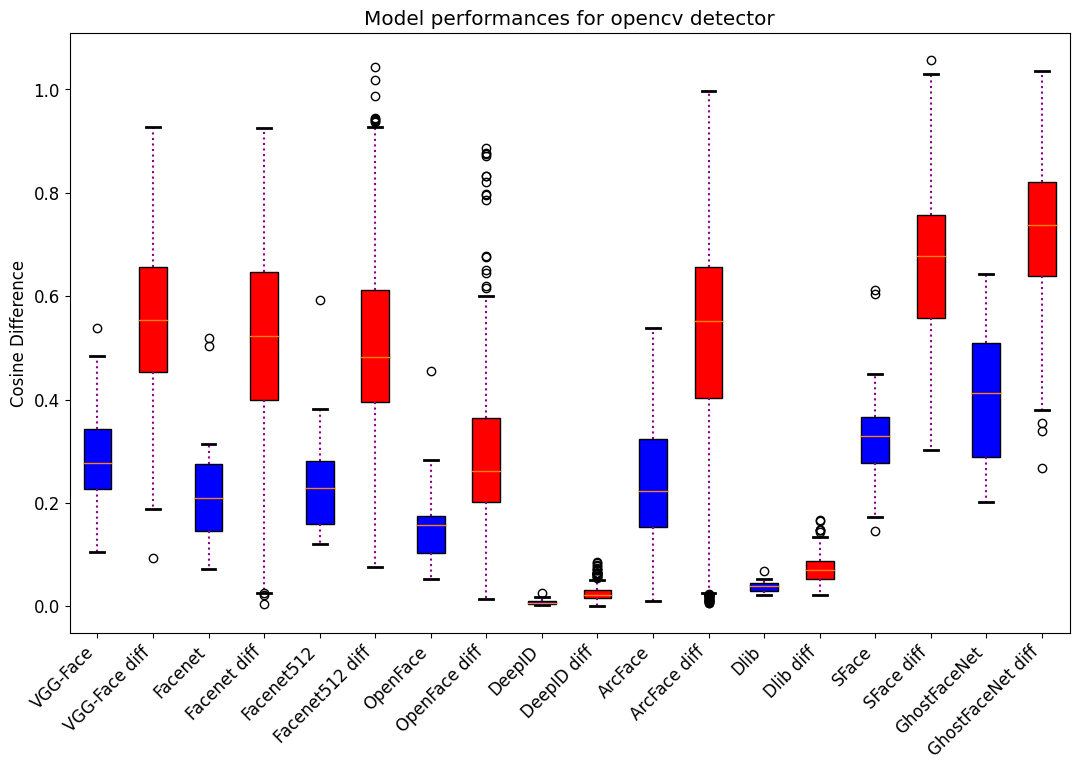

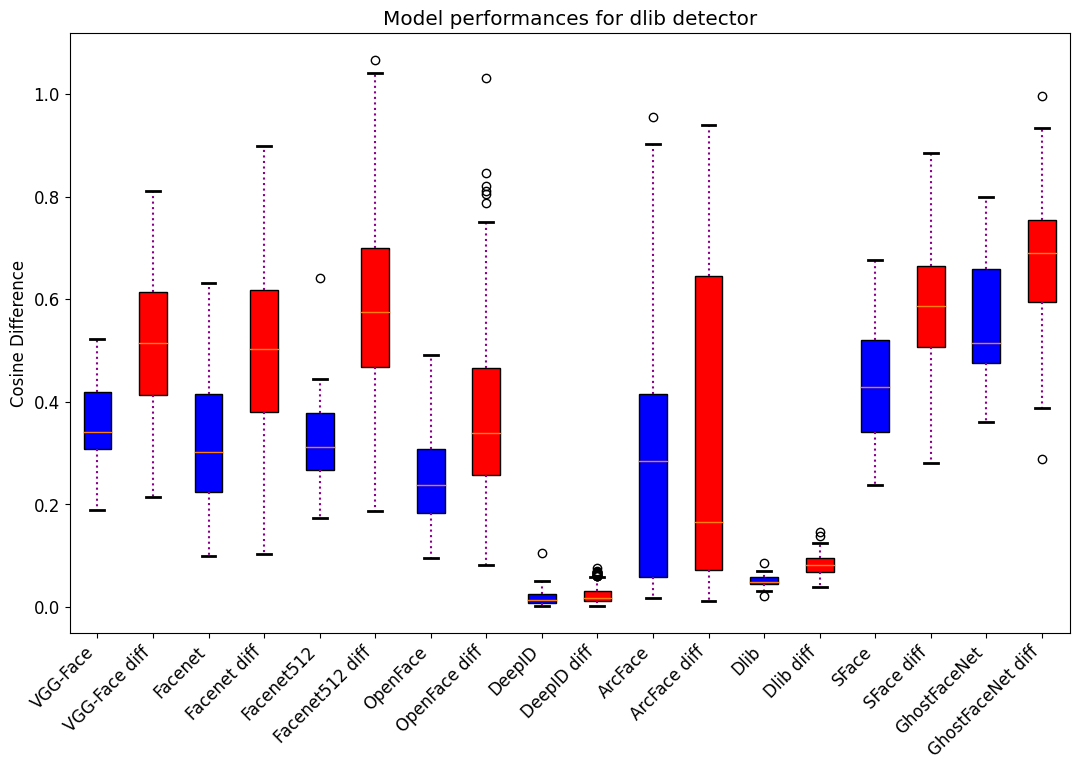

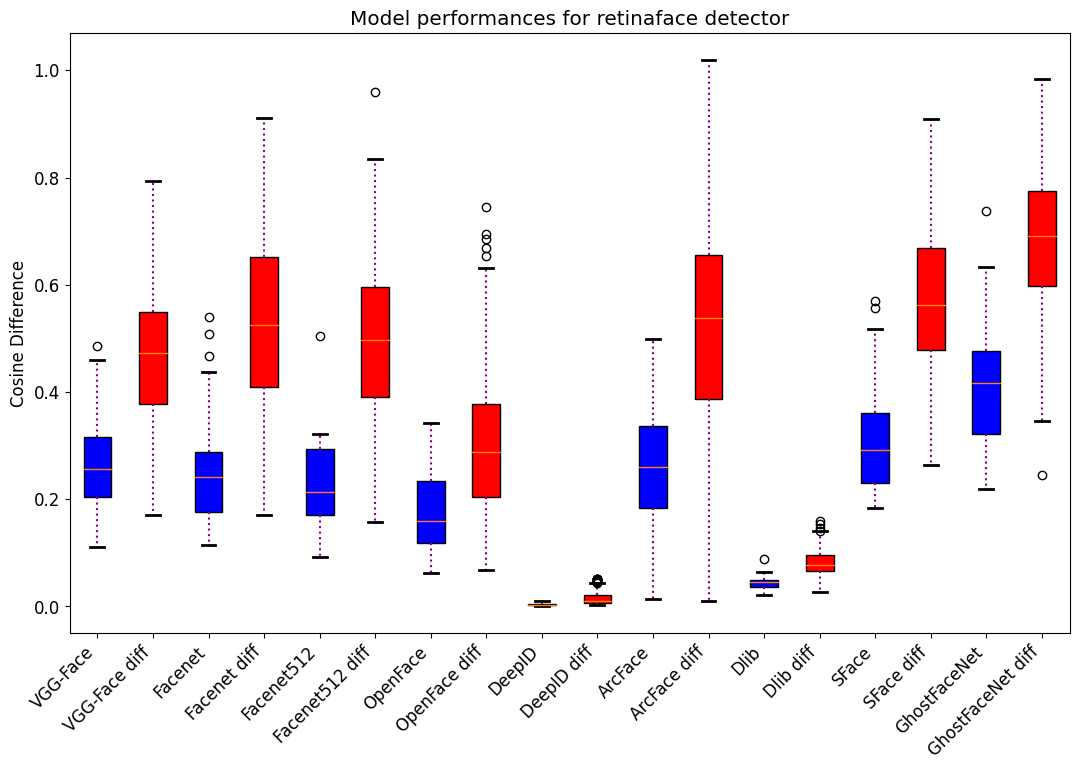

In [81]:
plot_results_model(full_results, 'opencv',full_results_diff)
plot_results_model(full_results, 'dlib',full_results_diff)
plot_results_model(full_results, 'retinaface',full_results_diff)

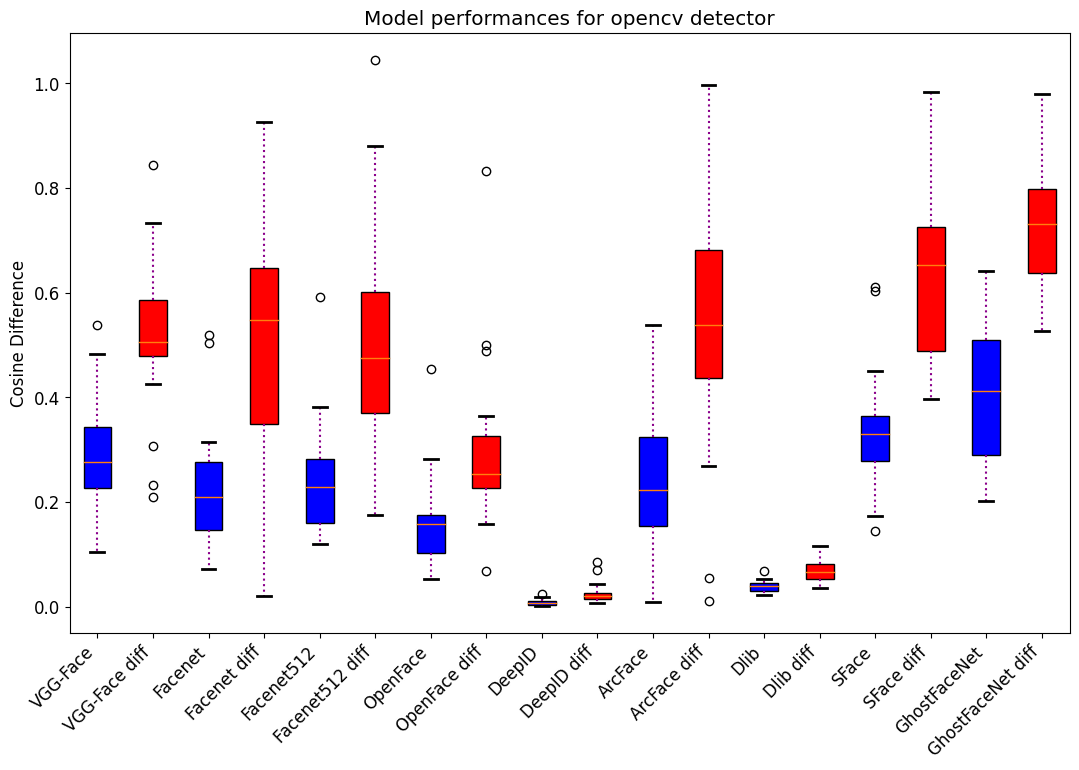

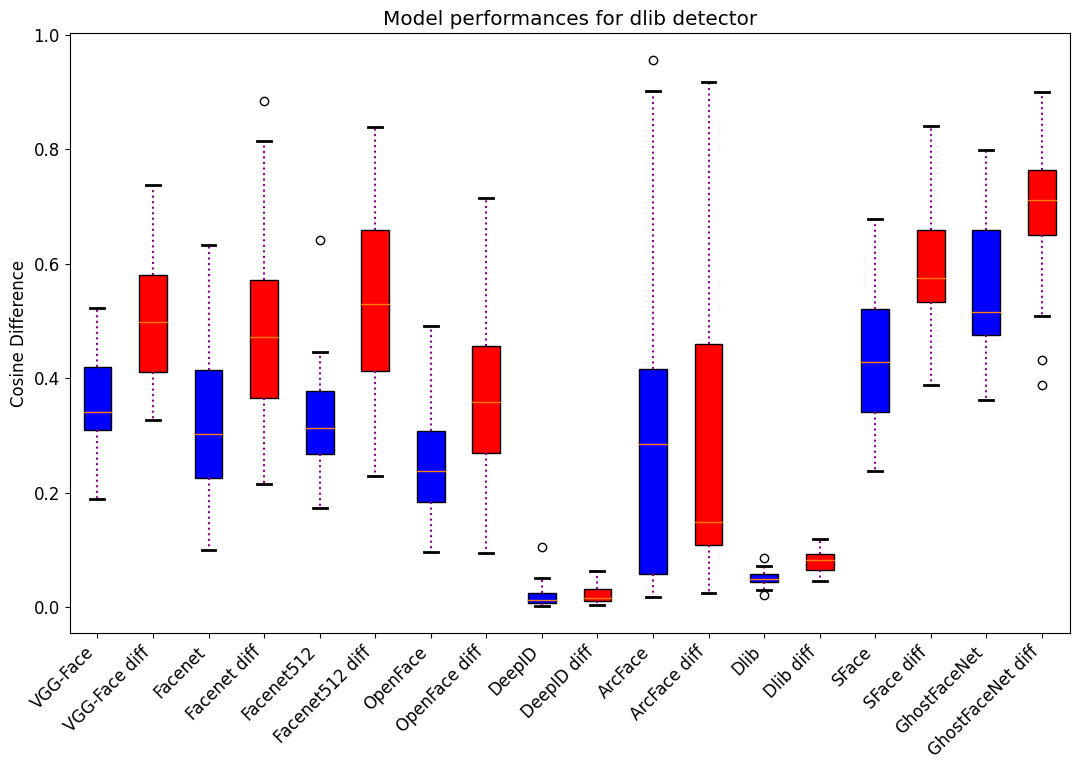

In [16]:
plot_results_model(full_results, 'opencv',full_results_diff_test)
plot_results_model(full_results, 'dlib',full_results_diff_test)
# plot_results_model(full_results, 'retinaface',full_results_diff_test)

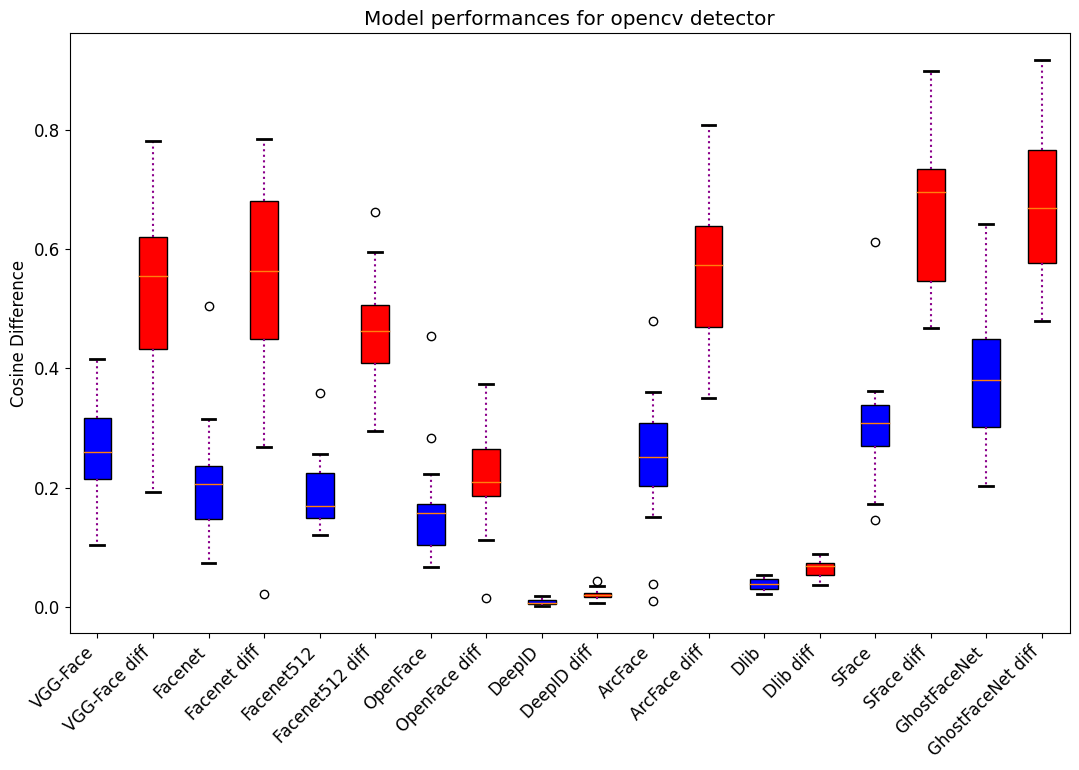

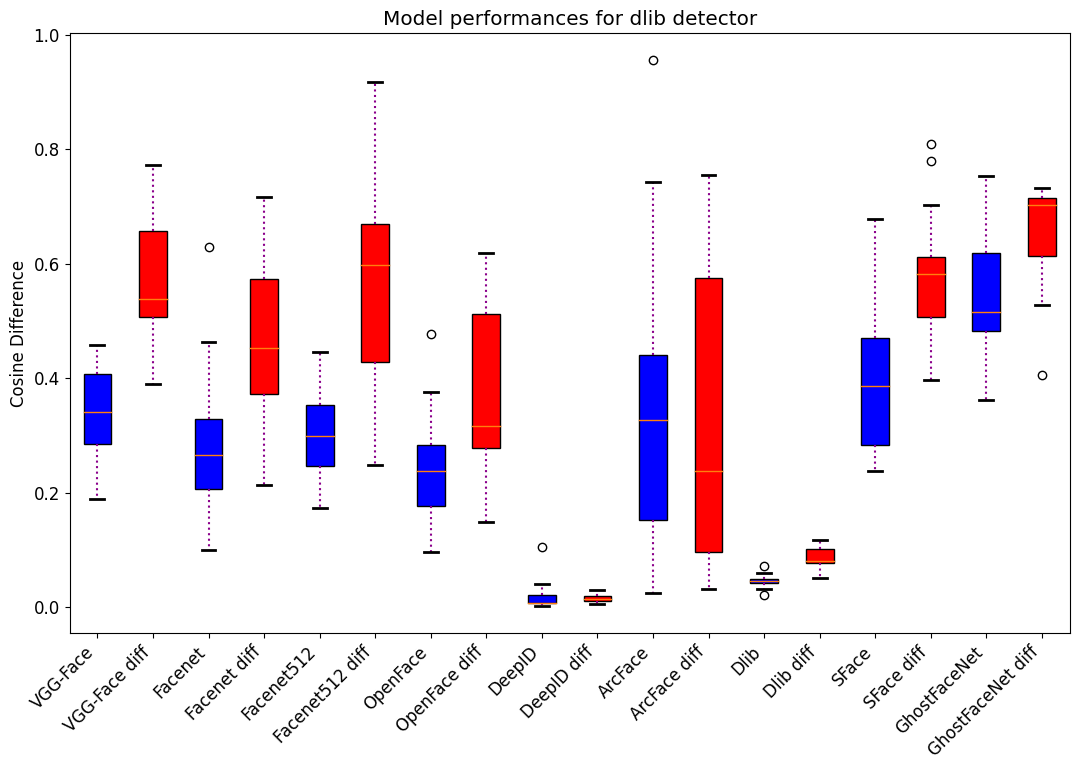

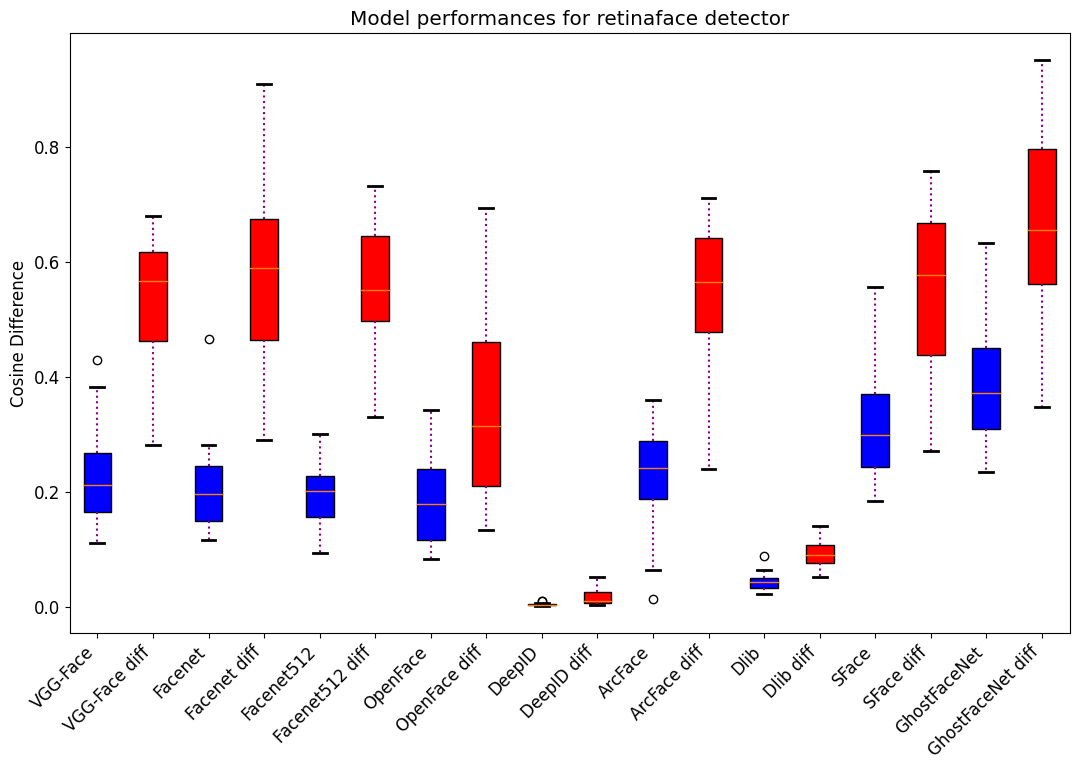

In [83]:
plot_results_model(full_results, 'opencv',full_results_diff_test_2)
plot_results_model(full_results, 'dlib',full_results_diff_test_2)
plot_results_model(full_results, 'retinaface',full_results_diff_test_2)

In [95]:
perform_stats_test(full_results, full_results_diff_test_2, 'retinaface')

Results for detector retinaface
VGG-Face
U statistic: 10.0
p-value: 1.6410265549780677e-06
There is a significant difference between the two groups.
Facenet
U statistic: 5.0
p-value: 7.366600071560908e-07
There is a significant difference between the two groups.
Facenet512
U statistic: 0.0
p-value: 3.2278370106587223e-07
There is a significant difference between the two groups.
OpenFace
U statistic: 63.0
p-value: 0.0018307246496942306
There is a significant difference between the two groups.
DeepID
U statistic: 39.0
p-value: 0.0001063061735187313
There is a significant difference between the two groups.
ArcFace
U statistic: 10.0
p-value: 1.6410265549780677e-06
There is a significant difference between the two groups.
Dlib
U statistic: 13.0
p-value: 2.622947133501737e-06
There is a significant difference between the two groups.
SFace
U statistic: 38.0
p-value: 9.330734066373957e-05
There is a significant difference between the two groups.
GhostFaceNet
U statistic: 32.0
p-value: 4.181799

In [102]:
for p in [l for l in list_patients if l not in skip]:
    print(p)

    try:
        detect_1 = DeepFace.extract_faces(PATH+p+"_1.png", detector_backend = detectors[4])
        print("1:",detect_1[0]['facial_area'],detect_1[0]['confidence'])
    except:
        print("1: No face detected")

    try:
        detect_2 = DeepFace.extract_faces(PATH+p+"_2.png", detector_backend = detectors[4])    
        print("2:",detect_2[0]['facial_area'],detect_2[0]['confidence'])
    except:
        
        print("2: No face detected")
    

118
1: {'x': 190, 'y': 69, 'w': 127, 'h': 176, 'left_eye': (280, 138), 'right_eye': (224, 132)} 1.0
2: {'x': 163, 'y': 47, 'w': 124, 'h': 166, 'left_eye': (252, 104), 'right_eye': (197, 103)} 1.0
272
1: {'x': 170, 'y': 65, 'w': 144, 'h': 183, 'left_eye': (273, 135), 'right_eye': (208, 132)} 1.0
2: {'x': 169, 'y': 71, 'w': 129, 'h': 160, 'left_eye': (266, 123), 'right_eye': (208, 125)} 1.0
437
1: {'x': 177, 'y': 60, 'w': 126, 'h': 178, 'left_eye': (267, 125), 'right_eye': (209, 123)} 1.0
2: {'x': 170, 'y': 38, 'w': 140, 'h': 199, 'left_eye': (276, 115), 'right_eye': (212, 115)} 1.0
447
1: {'x': 190, 'y': 42, 'w': 136, 'h': 189, 'left_eye': (294, 116), 'right_eye': (229, 115)} 1.0
2: {'x': 184, 'y': 63, 'w': 117, 'h': 154, 'left_eye': (270, 117), 'right_eye': (218, 116)} 1.0
462
1: {'x': 166, 'y': 68, 'w': 147, 'h': 199, 'left_eye': (278, 149), 'right_eye': (212, 148)} 1.0
2: {'x': 189, 'y': 87, 'w': 138, 'h': 179, 'left_eye': (292, 153), 'right_eye': (227, 153)} 1.0
600
1: {'x': 179, 'y

In [272]:
for p in [l for l in list_patients if l not in skip]:
    print(p)

    try:
        detect_1 = DeepFace.extract_faces(PATH + p + "_1.png", detector_backend='dlib')
        print("1:", detect_1[0]['facial_area'], detect_1[0]['confidence'])
        
        # Load the image
        image_path_1 = PATH + p + "_1.png"
        image = cv2.imread(image_path_1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
        
        # Extract facial area coordinates
        x = detect_1[0]['facial_area']['x']
        y = detect_1[0]['facial_area']['y']
        w = detect_1[0]['facial_area']['w']
        h = detect_1[0]['facial_area']['h']
        
        # Draw rectangle around the face
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 1)
        
        # Extract and plot eye coordinates
        left_eye = detect_1[0]['facial_area']['left_eye']
        right_eye = detect_1[0]['facial_area']['right_eye']
        plt.imshow(image)
        plt.scatter(*left_eye, color='red', s=50, label='Left Eye')
        plt.scatter(*right_eye, color='blue', s=50, label='Right Eye')
        plt.title(f"Patient: {p} - Image 1")
        plt.axis('off')
        plt.legend()
        plt.show()
        
    except Exception as e:
        print("1: No face detected or error:", e)

    try:
        detect_2 = DeepFace.extract_faces(PATH + p + "_2.png", detector_backend='dlib')
        print("2:", detect_2[0]['facial_area'], detect_2[0]['confidence'])
        
        # Load the image
        image_path_2 = PATH + p + "_2.png"
        image = cv2.imread(image_path_2)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
        
        # Extract facial area coordinates
        x = detect_2[0]['facial_area']['x']
        y = detect_2[0]['facial_area']['y']
        w = detect_2[0]['facial_area']['w']
        h = detect_2[0]['facial_area']['h']
        
        # Draw rectangle around the face
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 1)
        
        # Extract and plot eye coordinates
        left_eye = detect_2[0]['facial_area']['left_eye']
        right_eye = detect_2[0]['facial_area']['right_eye']
        # plt.imshow(image)
        # plt.scatter(*left_eye, color='red', s=50, label='Left Eye')
        # plt.scatter(*right_eye, color='blue', s=50, label='Right Eye')
        # plt.title(f"Patient: {p} - Image 2")
        # plt.axis('off')
        # plt.legend()
        # plt.show()
        
    except Exception as e:
        print("2: No face detected or error:", e)

NameError: name 'list_patients' is not defined

In [273]:
for p in [l for l in list_patients if l not in skip]:
    print(p)

    try:
        detect_1 = DeepFace.extract_faces(PATH + p + "_1.png", detector_backend='retinaface')
        print("1:", detect_1[0]['facial_area'], detect_1[0]['confidence'])
        
        # Load the image
        image_path_1 = PATH + p + "_1.png"
        image = cv2.imread(image_path_1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
        
        # Extract facial area coordinates
        x = detect_1[0]['facial_area']['x']
        y = detect_1[0]['facial_area']['y']
        w = detect_1[0]['facial_area']['w']
        h = detect_1[0]['facial_area']['h']
        
        # Draw rectangle around the face
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 1)
        
        # Extract and plot eye coordinates
        left_eye = detect_1[0]['facial_area']['left_eye']
        right_eye = detect_1[0]['facial_area']['right_eye']
        plt.imshow(image)
        plt.scatter(*left_eye, color='red', s=50, label='Left Eye')
        plt.scatter(*right_eye, color='blue', s=50, label='Right Eye')
        plt.title(f"Patient: {p} - Image 1")
        plt.axis('off')
        plt.legend()
        plt.show()
        
    except Exception as e:
        print("1: No face detected or error:", e)

    try:
        detect_2 = DeepFace.extract_faces(PATH + p + "_2.png", detector_backend='retinaface')
        print("2:", detect_2[0]['facial_area'], detect_2[0]['confidence'])
        
        # Load the image
        image_path_2 = PATH + p + "_2.png"
        image = cv2.imread(image_path_2)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
        
        # Extract facial area coordinates
        x = detect_2[0]['facial_area']['x']
        y = detect_2[0]['facial_area']['y']
        w = detect_2[0]['facial_area']['w']
        h = detect_2[0]['facial_area']['h']
        
        # Draw rectangle around the face
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 1)
        
        # Extract and plot eye coordinates
        left_eye = detect_2[0]['facial_area']['left_eye']
        right_eye = detect_2[0]['facial_area']['right_eye']
        # plt.imshow(image)
        # plt.scatter(*left_eye, color='red', s=50, label='Left Eye')
        # plt.scatter(*right_eye, color='blue', s=50, label='Right Eye')
        # plt.title(f"Patient: {p} - Image 2")
        # plt.axis('off')
        # plt.legend()
        # plt.show()
        
    except Exception as e:
        print("2: No face detected or error:", e)

NameError: name 'list_patients' is not defined

In [109]:
results_1_2 = []
# results_A_2 = []

for p in list_patients:
    
    print(p)
    try:
        result = DeepFace.verify(img1_path = PATH+p+"_1.png", img2_path = PATH+p+'_2.png', enforce_detection=True,threshold=0.4,detector_backend = detectors[4])
        results_1_2.append(result['distance'])
        print("1 vs 2",result['distance'])
    except:
        print("NO FACE")
        # result = DeepFace.verify(img1_path = PATH+p+"_A.png", img2_path = PATH+p+"_2.png", enforce_detection=False,threshold=0.4)
        # results_A_2.append(result['distance'])
        # print("A vs 2",result['distance'])

118
1 vs 2 0.15215399715564604
272
1 vs 2 0.3252370655874649
437
1 vs 2 0.25564019563722773
447
1 vs 2 0.18599447776312406
462
1 vs 2 0.27144565196084636
600
1 vs 2 0.48502328626040436
625
1 vs 2 0.2218798825563819
628
1 vs 2 0.1105535695812
633
NO FACE
638
NO FACE
644
1 vs 2 0.20979919127921043
651
1 vs 2 0.300468278129025
673
1 vs 2 0.1448040417625548
685
1 vs 2 0.2841221333848969
734
1 vs 2 0.31209055564837207
755
1 vs 2 0.460214785449263
790
1 vs 2 0.19817677427786828
848
1 vs 2 0.2129475973269661
877
NO FACE
892
1 vs 2 0.3188146334157571
910
1 vs 2 0.24923777386548984
965
1 vs 2 0.3825100923067184
946
1 vs 2 0.27701310547544333
961
1 vs 2 0.1581027977656645
1288
1 vs 2 0.15591951513517188
1314
1 vs 2 0.210756032223665
1502
NO FACE
1763
1 vs 2 0.36573348724673593
1892
1 vs 2 0.25735677027580905
2037
1 vs 2 0.22327869548863133
2056
1 vs 2 0.42970649712545483


In [75]:
distances = []
list_to_do = list_patients.copy()
for p1 in list_patients:
    list_to_do.remove(p1)
    for p2 in [p for p in list_to_do if p != p1]:
        result = DeepFace.verify(img1_path = PATH+p1+"_2.png", img2_path = PATH+p2+'_2.png', enforce_detection=False,threshold=0.4)
        # print(p1,"vs",p2,result['distance'])
        distances.append(result['distance'])

        if result['distance'] < 0.4:
            print(p1,p2, result['distance'])
            


118 447 0.2460139329240152
118 462 0.20979735645933217
118 651 0.31598237313309385
118 1314 0.30694705019443036
272 651 0.3647032216490611
272 685 0.39933194222195456
272 946 0.37744722318919144
272 961 0.3990557483408157
272 2056 0.3733256155474509
447 462 0.2696736735195139
447 651 0.25730344791922166
447 1314 0.34721329453730654
462 600 0.3792010171347123
462 651 0.29689368611868694
462 1314 0.3915920288038133
625 638 0.39333557167065636
625 644 0.3993736826016958
625 734 0.23298243186222123
625 848 0.39788740816943124
625 1288 0.3258820767843038
625 2056 0.28222069374116143
628 638 0.3934271396507618
628 892 0.3707018227542894
633 961 0.3850461467791131
633 1763 0.335815140681314
644 685 0.326874098245058
644 734 0.3409242638541655
644 965 0.3608843506956503
644 946 0.37226166542417416
644 1288 0.3309337088325396
644 2056 0.30836236221844715
651 946 0.3850604851027085
651 961 0.3787820840046091
651 1314 0.33674534491881103
651 1892 0.3911920809948175
685 790 0.38178693834723143
685

In [78]:
stances_2_1_other = []
list_to_do = list_patients.copy()
for p1 in list_patients:
#     list_to_do.remove(p1)
    for p2 in [p for p in list_to_do if p != p1]:
        result = DeepFace.verify(img1_path = PATH+p1+"_1.png", img2_path = PATH+p2+'_2.png', enforce_detection=False,threshold=0.4)
        # print(p1,"vs",p2,result['distance'])
        distances_2_1_other.append(result['distance'])

        if result['distance'] < 0.4:
            print(p1,p2, result['distance'])

118 673 0.18730585939258515
272 961 0.39869464953061384
447 118 0.32036885584412045
447 462 0.2937623119723294
447 600 0.3449992264701246
447 651 0.22972518448267742
447 1314 0.33920428586232165
447 1892 0.3967802620710551
462 118 0.325432182362718
462 651 0.30808266461547507
462 685 0.34361741159823866
462 965 0.3828504224199145
462 946 0.39442064775661745
462 1892 0.3701746045651182
600 272 0.396624073870941
600 644 0.24736781747035708
600 685 0.2656999660497483
600 790 0.3673396919910672
600 965 0.3452436943695649
600 1763 0.37686117526626817
600 2056 0.3795167256533146
625 644 0.3552293734711679
625 734 0.20276955646831285
625 2056 0.34778495197168013
628 790 0.32417231069297137
628 1763 0.3989152554519221
638 625 0.3500253375251836
638 628 0.3331720452535176
638 633 0.36109529652461203
638 892 0.3719867855505158
644 625 0.328593602322205
644 734 0.26624542570655774
644 848 0.31555606670433456
644 1288 0.24636038285809636
644 2056 0.3212620569920066
651 644 0.3456455654942445
651 7

In [ ]:
skip = ['118',']

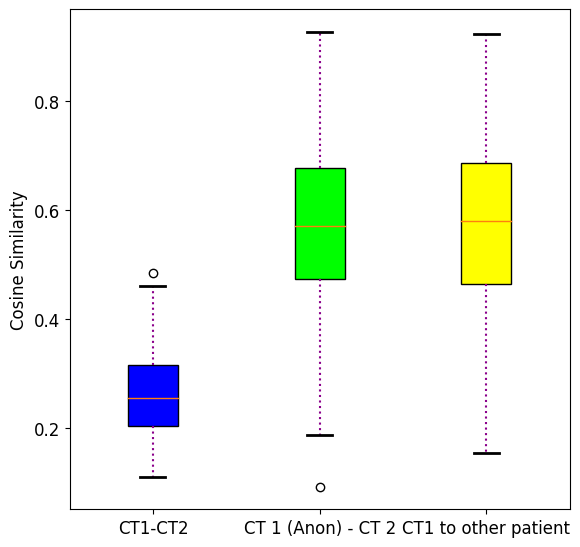

In [110]:
data = [results_1_2, distances, distances_2_1_other]#, results_A_2,
plt.rcParams['font.size'] = 12.
# Create a figure instance
fig = plt.figure(figsize=(5,5))

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)

colors = ['#0000FF', '#00FF00', '#FFFF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing color and line width of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# Changing color and line width of caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# # Changing color and line width of medians
# for median in bp['medians']:
#     median.set(color ='red',
#                linewidth = 3)

# # Changing style of fliers
# for flier in bp['fliers']:
#     flier.set(marker ='D',
#                color ='#e7298a',
#                alpha = 0.5)
    
# # x-axis labels
ax.set_xticklabels(['CT1-CT2', 'CT 1 (Anon) - CT 2', 'CT1 to other patient'])
plt.ylabel("Cosine Similarity")
# # Adding title
# plt.title("Vertical Box plot")

# # Removing top axes and right axes
# # ticks
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()

# show plot
plt.show()

In [12]:
len(list_patients)
skip = []

In [1018]:
num = ["1","2"]
for p in list_all :
    for n in num:
        try:
            faces = DeepFace.extract_faces(PATH+p+"_"+n+".png",detector_backend='retinaface')
            print(p, n, faces[0]['confidence'])
        except Exception as e:
            print("NO FACE", p,  n)

19 1 1.0
19 2 1.0
35 1 1.0
35 2 1.0
54 1 1.0
54 2 1.0
59 1 0.99
59 2 1.0
70 1 1.0
70 2 1.0
81 1 1.0
81 2 1.0
118 1 1.0
118 2 1.0
272 1 1.0
272 2 1.0
274 1 1.0
274 2 1.0
437 1 1.0
437 2 1.0
447 1 1.0
447 2 1.0
448 1 1.0
448 2 1.0
452 1 1.0
452 2 1.0
454 1 1.0
454 2 1.0
459 1 1.0
459 2 1.0
462 1 1.0
462 2 1.0
467 1 0.95
467 2 0.93
469 1 1.0
469 2 1.0
473 1 1.0
473 2 1.0
474 1 1.0
474 2 1.0
478 1 1.0
478 2 1.0
483 1 1.0
483 2 1.0
518 1 0.99
518 2 1.0
600 1 1.0
600 2 1.0
625 1 1.0
625 2 1.0
628 1 0.99
628 2 0.99
633 1 0.9
633 2 1.0
638 1 0.93
NO FACE 638 2
644 1 0.99
644 2 1.0
651 1 1.0
651 2 1.0
662 1 0.99
662 2 0.99
673 1 0.99
673 2 0.99
685 1 1.0
685 2 0.99
694 1 0.99
694 2 0.94
NO FACE 721 1
721 2 0.92
723 1 1.0
723 2 1.0
734 1 0.99
734 2 0.99
738 1 1.0
738 2 1.0
755 1 1.0
755 2 1.0
770 1 1.0
770 2 1.0
773 1 0.99
773 2 1.0
786 1 1.0
786 2 1.0
790 1 1.0
790 2 0.99
820 1 1.0
820 2 1.0
833 1 1.0
833 2 0.99
838 1 1.0
838 2 1.0
848 1 1.0
848 2 1.0
892 1 0.99
892 2 0.92
908 1 1.0
908 2 1.0
9

In [154]:
dict_emb = {}
# colours = ['red','blue','magenta','cyan','orange','lime','yellow','green','purple','salmon','cadetblue','olive']
colours = [
    'red', 'blue', 'magenta', 'cyan', 'orange', 'lime', 'yellow', 'green', 'purple', 'salmon', 'cadetblue', 'olive',
    'pink', 'brown', 'black', 'white', 'grey', 'navy', 'teal', 'maroon', 'gold', 'silver', 'coral', 'indigo', 'violet',
    'turquoise', 'khaki', 'lavender', 'maroon', 'plum'
]
for i, p in enumerate([x for x in list_patients if x not in skip]):
    dict_emb[p] = {}
    for n in num:
        dict_emb[p][n] = {}
        dict_emb[p][n]['colour'] = colours[i]
#         dict_emb[p][n]['n'] = n
        
      
        #embeddings
        embedding_objs = DeepFace.represent(img_path = PATH+p+"_"+n+".png", enforce_detection=False, detector_backend ='retinaface',model_name='Facenet512') 
#                 detector_backend = 'dlib'
#         )
        print(p,n,embedding_objs[0]['face_confidence'])
        dict_emb[p][n]['embedding'] = embedding_objs[0]['embedding']

NameError: name 'list_patients' is not defined

In [70]:
skip.append('1502')

In [71]:
X = []
c = []
y = []
labels = []
for p in [x for x in dict_emb if x not in skip]:
    for n in ["1","2"]:
#     print([p])
        X.append(dict_emb[p][n]['embedding'])
        c.append(dict_emb[p][n]['colour'])
        y.append(p)
        labels.append(p+"_"+n)

In [72]:
tsne = TSNE(n_components=2, random_state=42,perplexity=5)
X_tsne = tsne.fit_transform(np.array(X))

# Create a DataFrame for plotting
embeddings_df = pd.DataFrame(X_tsne, columns=["x", "y"])
embeddings_df["label"] = y


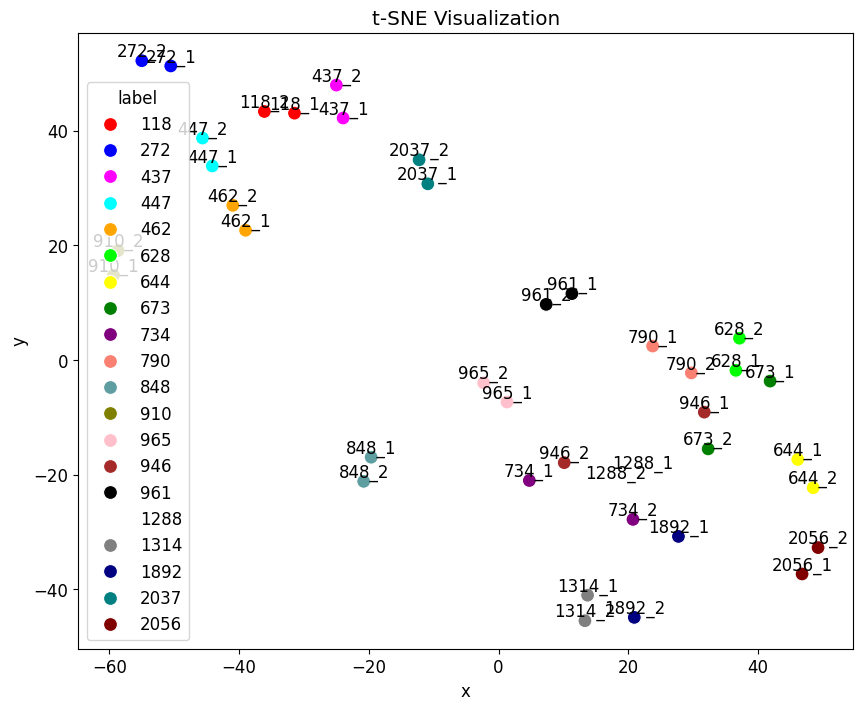

In [73]:
custom_palette = sns.color_palette(colours)
# Scatter plot with colors
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="x", y="y",s=100, hue="label", palette=custom_palette, data=embeddings_df, alpha=1)
# Add labels to each point
x = [item[0] for item in X_tsne]
y = [item[1] for item in X_tsne]
for i, txt in enumerate(labels):
    plt.text(x[i], y[i], txt, fontsize=12, ha='center', va='bottom')
plt.title("t-SNE Visualization")
plt.show()

In [50]:
len(colours)

30

In [118]:
num = ["1","2","A"]
for p in [x for x in list_patients if x not in skip]:
    for n in num:
        try:
            faces = DeepFace.extract_faces(PATH+p+"_"+n+".png", detector_backend ='retinaface')
            print(p, n, faces[0]['confidence'])
        except Exception as e:
            print("NO FACE", p,  n)

118 1 1.0
118 2 1.0
118 A 1.0
272 1 1.0
272 2 1.0
272 A 0.99
437 1 1.0
437 2 1.0
437 A 0.99
447 1 1.0
447 2 1.0
447 A 1.0
462 1 1.0
462 2 1.0
462 A 0.99
628 1 0.99
628 2 0.99
628 A 0.99
644 1 0.99
644 2 1.0
NO FACE 644 A
673 1 0.99
673 2 0.99
NO FACE 673 A
790 1 1.0
790 2 0.99
790 A 0.99
848 1 1.0
848 2 1.0
848 A 1.0
910 1 1.0
910 2 1.0
910 A 0.97
965 1 1.0
965 2 1.0
965 A 0.99
946 1 0.99
946 2 1.0
946 A 0.94
961 1 0.99
961 2 1.0
961 A 0.97
1288 1 0.97
1288 2 0.99
1288 A 0.98
1314 1 1.0
1314 2 1.0
1314 A 1.0
2037 1 1.0
2037 2 1.0
NO FACE 2037 A
2056 1 1.0
2056 2 1.0
2056 A 0.99


In [239]:
full_results_A_ALL = {}

for backend in ['retinaface']: #'opencv','dlib',
    full_results_A_ALL[backend] = {}
    for model in ['Facenet512']:
        print("Testing",backend,"backend, and",model,"model.")
        results_p = []
        num_undetected = 0
        for p in [x for x in list_patients]:# if x not in skip]: 
            try:
                result = DeepFace.verify(img1_path = PATH+p+"_A.png", img2_path = PATH+p+'_2.png', enforce_detection=False,threshold=0.4, detector_backend ='retinaface',model_name='Facenet512')
                results_p.append(result['distance'])
            except:
                num_undetected+=1
        full_results_A_ALL[backend][model] = {
            "results": results_p,
            "undetected":num_undetected
        }
        

Testing retinaface backend, and Facenet512 model.


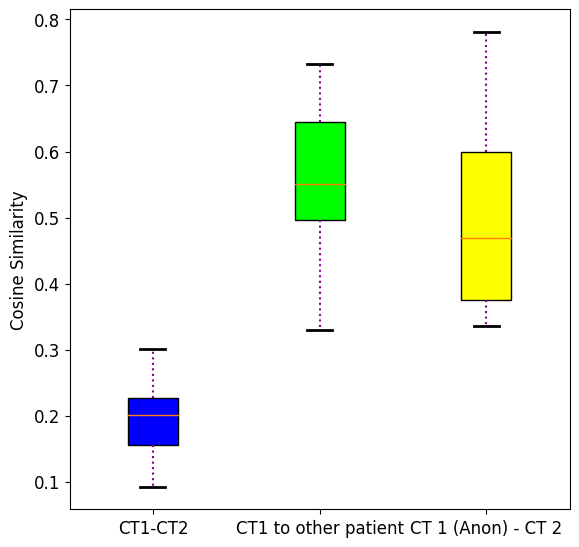

In [121]:
data = [full_results['retinaface']['Facenet512']['results'], full_results_diff_test_2['retinaface']['Facenet512']['results'], full_results_A['retinaface']['Facenet512']['results']]#, results_A_2,
plt.rcParams['font.size'] = 12.
# Create a figure instance
fig = plt.figure(figsize=(5,5))

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)

colors = ['#0000FF', '#00FF00', '#FFFF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing color and line width of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# Changing color and line width of caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# # Changing color and line width of medians
# for median in bp['medians']:
#     median.set(color ='red',
#                linewidth = 3)

# # Changing style of fliers
# for flier in bp['fliers']:
#     flier.set(marker ='D',
#                color ='#e7298a',
#                alpha = 0.5)
    
# # x-axis labels
ax.set_xticklabels(['CT1-CT2',  'CT1 to other patient','CT 1 (Anon) - CT 2'])
plt.ylabel("Cosine Similarity")
# # Adding title
# plt.title("Vertical Box plot")

# # Removing top axes and right axes
# # ticks
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()

# show plot
plt.show()

In [135]:
perform_stats_test(full_results, full_results_A, 'retinaface')

['Facenet512']
Results for detector retinaface
Facenet512
U statistic: 0.0
p-value: 7.374952579940774e-07
There is a significant difference between the two groups.


In [136]:
perform_stats_test(full_results_diff_test_2, full_results_A, 'retinaface')

['Facenet512']
Results for detector retinaface
Facenet512
U statistic: 192.0
p-value: 0.10123289972993921
There is no significant difference between the two groups.


In [164]:
dict_emb = {}
# colours = ['red','blue','magenta','cyan','orange','lime','yellow','green','purple','salmon','cadetblue','olive']
colours = [
    'red', 'blue', 'magenta', 'cyan', 'orange', 'lime', 'yellow', 'green', 'purple', 'salmon', 'cadetblue', 'olive',
    'pink', 'brown', 'black', 'white', 'grey', 'navy', 'teal', 'maroon', 'gold', 'silver', 'coral', 'indigo', 'violet',
    'turquoise', 'khaki', 'lavender', 'maroon', 'plum'
]
for i, p in enumerate([x for x in list_patients if x not in skip and x not in ['673']]):
    dict_emb[p] = {}
    for n in ["A","2","1"]:
        dict_emb[p][n] = {}
        dict_emb[p][n]['colour'] = colours[i]
#         dict_emb[p][n]['n'] = n
        
      
        #embeddings
        embedding_objs = DeepFace.represent(img_path = PATH+p+"_"+n+".png", enforce_detection=False, detector_backend ='retinaface',model_name='Facenet512') 
#                 detector_backend = 'dlib'
#         )
        print(p,n,embedding_objs[0]['face_confidence'])
        dict_emb[p][n]['embedding'] = embedding_objs[0]['embedding']

118 A 1.0
118 2 1.0
118 1 1.0
272 A 0.99
272 2 1.0
272 1 1.0
437 A 0.99
437 2 1.0
437 1 1.0
447 A 1.0
447 2 1.0
447 1 1.0
462 A 0.99
462 2 1.0
462 1 1.0
628 A 0.99
628 2 0.99
628 1 0.99
644 A 0.99
644 2 1.0
644 1 0.99
790 A 0.99
790 2 0.99
790 1 1.0
848 A 1.0
848 2 1.0
848 1 1.0
910 A 0.97
910 2 1.0
910 1 1.0
965 A 0.99
965 2 1.0
965 1 1.0
946 A 0.94
946 2 1.0
946 1 0.99
961 A 0.97
961 2 1.0
961 1 0.99
1288 A 0.98
1288 2 0.99
1288 1 0.97
1314 A 1.0
1314 2 1.0
1314 1 1.0
2037 A 0
2037 2 1.0
2037 1 1.0
2056 A 0.99
2056 2 1.0
2056 1 1.0


In [165]:
X = []
c = []
y = []
labels = []
for p in [x for x in dict_emb if x not in skip]:
    for n in ["A","2","1"]:
#     print([p])
        X.append(dict_emb[p][n]['embedding'])
        c.append(dict_emb[p][n]['colour'])
        y.append(p)
        labels.append(n)

In [166]:
tsne = TSNE(n_components=2, random_state=42,perplexity=5)
X_tsne = tsne.fit_transform(np.array(X))

# Create a DataFrame for plotting
embeddings_df = pd.DataFrame(X_tsne, columns=["x", "y"])
embeddings_df["label"] = y


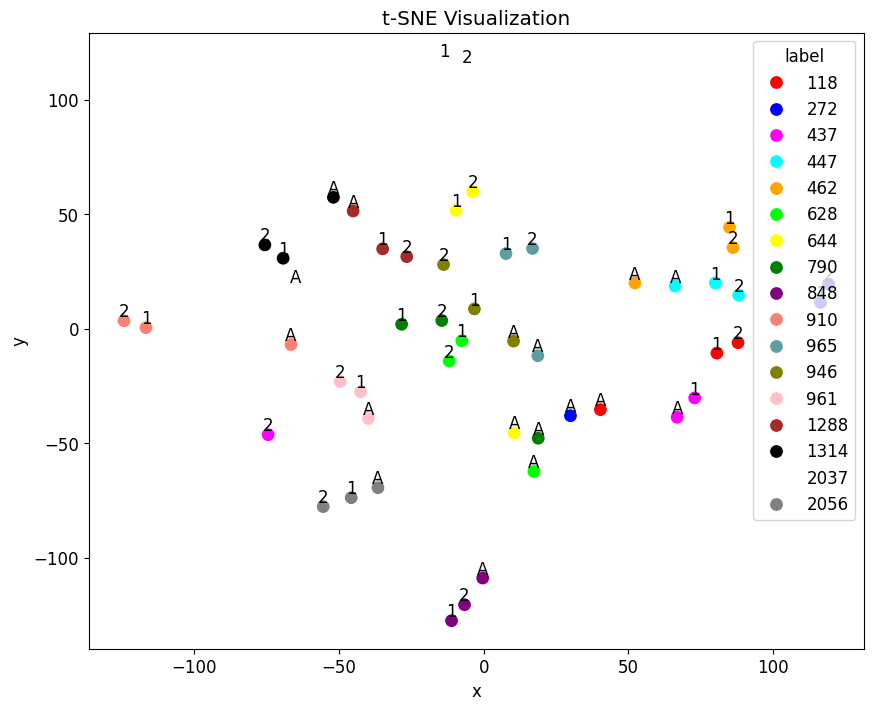

In [167]:
custom_palette = sns.color_palette(colours)
# Scatter plot with colors
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="x", y="y",s=100, hue="label", palette=custom_palette, data=embeddings_df, alpha=1)
# Add labels to each point
x = [item[0] for item in X_tsne]
y = [item[1] for item in X_tsne]
for i, txt in enumerate(labels):
    plt.text(x[i], y[i], txt, fontsize=12, ha='center', va='bottom')
plt.title("t-SNE Visualization")
plt.show()

In [168]:
dict_emb

{'118': {'A': {'colour': 'red',
   'embedding': [0.492083340883255,
    -0.23994649946689606,
    -1.408102035522461,
    -0.5488553047180176,
    -1.2131551504135132,
    0.5484321713447571,
    0.13070550560951233,
    0.20751948654651642,
    -2.0642900466918945,
    -0.062066636979579926,
    -2.3981895446777344,
    -0.20848216116428375,
    -1.4680546522140503,
    -0.8027756810188293,
    0.9228530526161194,
    -1.5197287797927856,
    0.758086621761322,
    -0.44054079055786133,
    1.432538628578186,
    -1.4185956716537476,
    -1.1282854080200195,
    0.5599939227104187,
    0.5564668774604797,
    0.7347875237464905,
    0.92661452293396,
    0.28222399950027466,
    0.2299973964691162,
    -0.5159459710121155,
    1.0496718883514404,
    1.136242389678955,
    -1.225257158279419,
    0.36517682671546936,
    -0.5120426416397095,
    -0.22041843831539154,
    -0.08100595325231552,
    -1.083304762840271,
    -0.9895039796829224,
    0.12248706817626953,
    0.1512854099273

In [170]:
len(dict_emb['118']['A']['embedding'])

512

In [1012]:
same = []
for p in [x for x in emb_dict.keys() if x not in skip]:
    emb_A = emb_dict[p]['A'][0]['embedding']
    closest_sim = 1
    closest_p = ''
    # print("*****")
    # print(p)
    for p2 in [x for x in emb_dict.keys() if x not in skip]:
        # print(p2)
        emb_2 = emb_dict[p2]['2'][0]['embedding']
        # sim = np.dot(emb_A, emb_2) / (norm(emb_A) * norm(emb_2))

        sim =  verification.find_distance(emb_A, emb_2, 'cosine')
        # print(sim)
        

        # print("       "+p2 +": "+ str(sim))
        if sim < closest_sim:
            closest_sim = sim
            closest_p = p2
    print(p,":", closest_p,"--->",closest_sim)
    if p == closest_p:
        same.append(p)

print("MATCH FOR: =",same)

19 : 734 ---> 0.31626157682646183
54 : 2056 ---> 0.49462093351141934
59 : 838 ---> 0.4611660691888564
81 : 961 ---> 0.4079799449902519
118 : 2041 ---> 0.361348230986567
272 : 734 ---> 0.43142083054825453
274 : 694 ---> 0.28165441380640177
437 : 437 ---> 0.3505773416658722
448 : 961 ---> 0.3164237924269906
454 : 478 ---> 0.48596854228850284
459 : 848 ---> 0.47280373943432885
462 : 1511 ---> 0.2418209629473601
473 : 755 ---> 0.2965929037166767
474 : 662 ---> 0.24730432504833566
478 : 673 ---> 0.4897944915563144
483 : 734 ---> 0.3032025120317978
518 : 961 ---> 0.3519697446864487
600 : 1511 ---> 0.25710863753781366
625 : 734 ---> 0.3343408888663535
628 : 790 ---> 0.41095430070489436
633 : 673 ---> 0.5085263173667436
651 : 2027 ---> 0.3240492019864366
662 : 734 ---> 0.4467530602456731
673 : 1949 ---> 0.30791982771658233
685 : 790 ---> 0.2952896766453156
694 : 673 ---> 0.4062249937945832
723 : 961 ---> 0.2657085942804511
734 : 961 ---> 0.32232191423406964
755 : 651 ---> 0.5311759139754241
77

In [1013]:
same = []
diff = []
offenders = []
for p in [x for x in emb_dict.keys() if x not in skip]:
    
    emb_A = emb_dict[p]['1'][0]['embedding']
    closest_sim = 0
    closest_p = ''
    # print("*****")
    # print(p)
    for p2 in [x for x in emb_dict.keys() if x not in skip]:
        # print(p2)
        emb_2 = emb_dict[p2]['2'][0]['embedding']
        sim = np.dot(emb_A, emb_2) / (norm(emb_A) * norm(emb_2))
        # print("       "+p2 +": "+ str(sim))
        if sim > closest_sim:
            closest_sim = sim
            closest_p = p2
    print(p,":", closest_p)
    if p == closest_p:
        same.append(p)
    else:
        diff.append(p)
        offenders.append(p)
        offenders.append(closest_p)

print("NOT A MATCH FOR: =",diff)

19 : 19
54 : 838
59 : 1255
81 : 81
118 : 118
272 : 272
274 : 478
437 : 474
448 : 448
454 : 59
459 : 459
462 : 462
473 : 473
474 : 651
478 : 478
483 : 483
518 : 961
600 : 1511
625 : 625
628 : 628
633 : 633
651 : 946
662 : 965
673 : 790
685 : 790
694 : 694
723 : 723
734 : 946
755 : 651
770 : 770
773 : 1511
786 : 786
790 : 790
820 : 820
833 : 833
838 : 838
848 : 848
892 : 892
910 : 910
937 : 892
945 : 945
946 : 790
961 : 961
965 : 965
973 : 973
1255 : 945
1288 : 1288
1314 : 1314
1511 : 973
1888 : 1892
1892 : 734
1949 : 1949
1987 : 1987
2017 : 2017
2027 : 973
2037 : 2037
2041 : 2041
2056 : 755
2058 : 1288
2061 : 2061
NOT A MATCH FOR: = ['54', '59', '274', '437', '454', '474', '518', '600', '651', '662', '673', '685', '734', '755', '773', '937', '946', '1255', '1511', '1888', '1892', '2027', '2056', '2058']


In [517]:
skip  = []

In [511]:
# def get_same_results(list_patients, models=['Facenet512'],detectors=['retinaface']):
#     results = {}
    
#     for backend in detectors: #'opencv','dlib',
#         results[backend] = {}
#         for model in models:
#             print("Testing",backend,"backend, and",model,"model.")
#             results_p = []
#             num_undetected = 0
#             for p in list_patients: 
#                 try:
#                     result = DeepFace.verify(img1_path = PATH+p+"_1.png", img2_path = PATH+p+'_2.png', enforce_detection=False,threshold=0.4, detector_backend =backend,model_name=model)
#                     results_p.append(result['distance'])
#                 except:
#                     num_undetected+=1
#             results[backend][model] = {
#                 "results": results_p,
#                 "undetected":num_undetected
#             }
#     return results
            

In [512]:
# def get_diff_results(list_patients,models=['Facenet512'],detectors=['retinaface'],rand=False):
#     results = {}

#     for backend in detectors:
#         results[backend] = {}
#         for model in models:
#             print("Testing", backend, "backend, and", model, "model.")
#             results_p = []
#             num_undetected = 0
#             processed_combinations = set()
#             list_to_do = list_patients.copy()
#             # print(list_to_do)
#             for p1 in list_patients: 
#                 # print(p1)
#                 list_to_do.remove(p1)
#             # for p1 in [ x for x in list_patients if x not in skip]:
#                 # possible_p2 = [p for p in list_patients if p not in skip and p != p1 and (p1, p) not in processed_combinations and (p, p1) not in processed_combinations]
#                 # if possible_p2:  # Ensure there are still patients to choose from
#                     # p2 = random.choice(possible_p2)
#                 for p2 in [p for p in list_to_do if p != p1]:
               
#                     try:
#                         result = DeepFace.verify(img1_path=PATH + p1 + "_2.png", img2_path=PATH + p2 + '_2.png', enforce_detection=True, threshold=0.4, detector_backend=backend, model_name=model)
#                         results_p.append(result['distance'])
#                         # print(p1, p2, result['distance'])
                        
#                         # if result['distance'] < 0.5:
#                         #     print("******")
                            
#                     except:
#                         num_undetected += 1
#                     processed_combinations.add((p1, p2))
            
#             results[backend][model] = {
#                 "results": results_p,
#                 "undetected": num_undetected
#             }
#     return results
            

In [513]:
# skip = ['600','638','633','651','685','625','755','892','1502','1763','734','1892']

In [203]:
new_list = sorted([f for f in list_patients if f not in skip])
print(new_list)
print(len(new_list))
print(len(list_patients))
print(len(skip))

['118', '1288', '1314', '2037', '2056', '272', '437', '447', '462', '628', '644', '673', '790', '848', '910', '946', '961', '965']
18
30
12


In [199]:

results_same = get_same_results(new_list)['retinaface']['Facenet512']['results']


Testing retinaface backend, and Facenet512 model.
{'results': [0.17436911038152536, 0.12010842538338651, 0.1517782102034977, 0.2130403230262503, 0.23138654880344245, 0.2470585598951337, 0.2591133287212748, 0.21322523237785052, 0.17142517928825518, 0.13998138246803482, 0.1897806097159741, 0.3004551392475552, 0.21471848149972095, 0.09277341364570202, 0.11875230341658449, 0.28656381205105497, 0.1689056531791051, 0.21175341021121197], 'undetected': 0}


In [212]:
results_diff = get_diff_results(new_list)['retinaface']['Facenet512']['results']

Testing retinaface backend, and Facenet512 model.


In [207]:
results_diff

{'results': [0.46047668713445344,
  0.2944899063398978,
  0.47818691029784566,
  0.7205609608723829,
  0.5446234384704729,
  0.44173611641281585,
  0.5604738107158549,
  0.39605952776006303,
  0.7225280790490887,
  0.5700451558413837,
  0.24831019822105227,
  0.6624285523612268,
  0.7119132589855691,
  0.40690845238556383,
  0.535088665653482,
  0.3012739978130522,
  0.36571698820985377,
  0.5573651733017224],
 'undetected': 0}

In [21]:
def plot_two(same,diff):
    data = [same, diff]
    plt.rcParams['font.size'] = 12.
    # Create a figure instance
    fig = plt.figure(figsize=(5,5))
    
    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])
    
    # Create the boxplot
    bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)
    
    colors = ['blue', 'red']
    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Changing color and line width of whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                    linewidth = 1.5,
                    linestyle =":")
    
    # Changing color and line width of caps
    for cap in bp['caps']:
        cap.set(color ='black',
                linewidth = 2)
    
    
    ax.set_xticklabels(['CT1-CT2','CT1 to other patient'])
    plt.ylabel("Cosine Similarity")
    ax.set_ylim(ymin=0)
    # show plot
    plt.show()

In [22]:
def plot_two_x3(same_list,diff_list,names=['Cosine Distance','Euclidean Distance','Euclidean L2 Distance']):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # Changed to 1 row and 3 columns

    for i in range(len(same_list)):
        data = [same_list[i], diff_list[i]]
        ax = axes[i]
        
        # Create the boxplot
        bp = ax.boxplot(data, patch_artist=True)
        
        colors = ['blue', 'red']
        
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        # Changing color and line width of whiskers
        for whisker in bp['whiskers']:
            whisker.set(color='#8B008B', linewidth=1.5, linestyle=":")

        # Changing color and line width of caps
        for cap in bp['caps']:
            cap.set(color='black', linewidth=2)
        
        ax.set_xticklabels(['CT1-CT2', 'CT1 to other patient'])
        ax.set_ylabel(names[i])
        ax.set_ylim(ymin=0)
    
    plt.show()

In [360]:
def plot_3_x3(same_list,diff_list,anon_list,names=['Cosine Distance','Euclidean Distance','Euclidean L2 Distance'],threshold=0.4):
    
    if len(same_list) > 1:
        fig, axes = plt.subplots(1, len(same_list), figsize=(15, 5))  # 1 row, 3 columns
    else:
        fig = plt.figure(figsize=(5,5))
        # Create an axes instance
        ax = fig.add_axes([0,0,1,1])

    for i in range(len(same_list)):
        if len(same_list)> 1:
            ax = axes[i]
        # Create the boxplot
        data = [same_list[i], diff_list[i], anon_list[i]]
        bp = ax.boxplot(data, patch_artist=True)
        
        colors = ['blue', 'red','yellow']
        
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        # Changing color and line width of whiskers
        for whisker in bp['whiskers']:
            whisker.set(color='#8B008B', linewidth=1.5, linestyle=":")

        # Changing color and line width of caps
        for cap in bp['caps']:
            cap.set(color='black', linewidth=2)
        
        ax.set_xticklabels(['CT1-CT2', 'CT1 to \n other patient','CT2 - \nAnon CT1'])
        ax.set_ylabel(names[i])
        ax.set_ylim(ymin=0)

        ax.axhline(y=threshold, color='green', linestyle='--', linewidth=2)
    
    plt.show()

In [ ]:
sa

In [224]:
len(results_same['results'])

18

In [223]:
stat, p_value = mannwhitneyu(results_same['results'], results_diff, alternative='two-sided')
print(f'U statistic: {stat}')
print(f'p-value: {p_value}')


U statistic: 32.0
p-value: 1.3135187659291474e-11


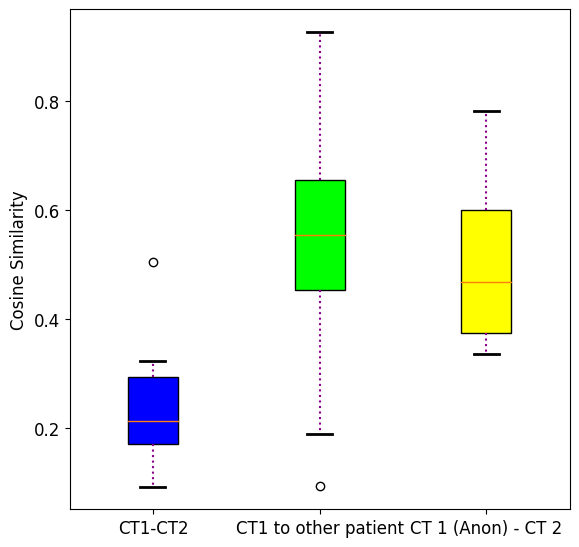

In [232]:
# data = [results_same['results'], results_diff, full_results_A['retinaface']['Facenet512']['results']]#, results_A_2,

data = [full_results_og30['retinaface']['Facenet512']['results'], full_results_dif_og30['retinaface']['Facenet512']['results'], full_results_A['retinaface']['Facenet512']['results']]#, results_A_2,


plt.rcParams['font.size'] = 12.
# Create a figure instance
fig = plt.figure(figsize=(5,5))

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)

colors = ['#0000FF', '#00FF00', '#FFFF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing color and line width of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# Changing color and line width of caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# # x-axis labels
ax.set_xticklabels(['CT1-CT2',  'CT1 to other patient','CT 1 (Anon) - CT 2'])
plt.ylabel("Cosine Similarity")
# # Adding title
plt.show()

In [238]:
alpha = 0.05

print("different patient cs same patient")
# full_results_og30['retinaface']['Facenet512']['results'], full_results_dif_og30['retinaface']['Facenet512']['results'], full_results_A['retinaface']['Facenet512']['results']
stat, p_value = mannwhitneyu(full_results_og30['retinaface']['Facenet512']['results'], full_results_dif_og30['retinaface']['Facenet512']['results'], alternative='two-sided')
print(f'U statistic: {stat}')
print(f'p-value: {p_value}')
    
if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")
print("----------------------------------------------------------")
print("same patient vs anon")

stat, p_value = mannwhitneyu(full_results_og30['retinaface']['Facenet512']['results'],   full_results_A['retinaface']['Facenet512']['results'], alternative='two-sided')
print(f'U statistic: {stat}')
print(f'p-value: {p_value}')
    
if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")
print("----------------------------------------------------------")
print("different patient vs annon")


stat, p_value = mannwhitneyu( full_results_dif_og30['retinaface']['Facenet512']['results'],  full_results_A['retinaface']['Facenet512']['results'], alternative='two-sided')
print(f'U statistic: {stat}')
print(f'p-value: {p_value}')
    
if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

different patient cs same patient
U statistic: 350.0
p-value: 3.6944577974668886e-16
There is a significant difference between the two groups.
----------------------------------------------------------
same patient vs anon
U statistic: 10.0
p-value: 2.425277809411813e-07
There is a significant difference between the two groups.
----------------------------------------------------------
different patient vs annon
U statistic: 4150.0
p-value: 0.05957538340813001
There is no significant difference between the two groups.


## Start Again

In [10]:
list_patients = ['19','35','54','59','70','81','118','272','274','437','447','448','462','600','625','628',
                 '633','638','644','651','673','685','734','755',
                 '790','848','892','910','946','961','965','1288',
                 '1314','1502','1552','1763','1888','1892','1949','1955','2037','2041','2056']

In [29]:
# skip_same = ['','']

In [34]:
same_results = get_same_results(list_patients)

Testing retinaface backend, and Facenet512 model.
19 0.1317052933736601
35 0.17615651409333244
54 0.3553012077712828
59 0.2693015382267838
70 0.4355157388807379
81 0.209385800967687
118 0.17436911038152536
272 0.2470585598951337
274 0.1379795133503613
437 0.2591133287212748
447 0.21322523237785052
448 0.23738113533244976
462 0.17142517928825518
600 0.31029979372696115
625 0.18727560211600047
628 0.13998138246803482
633 undetected
638 undetected
644 0.1897806097159741
651 0.3129511936718744
673 0.3004551392475552
685 0.24705530917542284
734 0.3225068207076782
755 0.32142491031921305
790 0.21471848149972095
848 0.09277341364570202
892 0.17086178867628343
910 0.11875230341658449
946 0.28656381205105497
961 0.1689056531791051
965 0.21175341021121197
1288 0.12010842538338651
1314 0.1517782102034977
1502 undetected
1552 0.19385360487644954
1763 0.5041347021487648
1892 0.30933916657961225
2037 0.2130403230262503
2041 0.2472934216023539
2056 0.23138654880344245


In [35]:
print("Length list:",len(list_patients))
print("Number detected:",same_results['retinaface']['Facenet512']['undetected'])
print("Total detected:",len(list_patients) - same_results['retinaface']['Facenet512']['undetected'])

Length list: 40
Number detected: 3
Total detected: 37


In [36]:
diff_results = get_diff_results(list_patients)

Testing retinaface backend, and Facenet512 model.
19 35 0.45831513797191514
19 54 0.42126975964679836
19 59 0.3110580016295744
19 70 0.33085097922896933
19 81 0.35301517885938394
19 118 0.3401571503706753
19 272 0.3608005088873395
19 274 0.47041693900419335
19 437 0.4267889633049531
19 447 0.31375006059280797
19 448 0.3010421015897229
19 462 0.21808445758118022
19 600 0.1226872711069863
19 625 0.5589742123976827
19 628 0.5361493299148794
19 633 0.5303557316531564
19 644 0.6024138960251625
19 651 0.42355942745144737
19 673 0.6591279361827156
19 685 0.5368533208763051
19 734 0.3795707131437668
19 755 0.5391509296934287
19 790 0.5058896890051817
19 848 0.627163758646305
19 892 0.43031189749591015
19 910 0.2755054168022717
19 946 0.3036811057070111
19 961 0.4235665605541732
19 965 0.3715204472783544
19 1288 0.4449506467392337
19 1314 0.4369568701502453
19 1552 0.5855156396776937
19 1763 0.28618950636252394
19 1892 0.3979094778813249
19 2037 0.5346192981753073
19 2041 0.33612363974606785
19

(array([1.3140287 , 3.94208611, 3.94208611, 5.25611481, 5.25611481,
        6.57014352, 1.3140287 , 5.25611481, 2.62805741, 1.3140287 ,
        5.25611481, 2.62805741, 1.3140287 , 0.        , 0.        ,
        0.        , 1.3140287 , 0.        , 0.        , 1.3140287 ]),
 array([0.09277341, 0.11334148, 0.13390954, 0.15447761, 0.17504567,
        0.19561374, 0.2161818 , 0.23674986, 0.25731793, 0.27788599,
        0.29845406, 0.31902212, 0.33959019, 0.36015825, 0.38072632,
        0.40129438, 0.42186244, 0.44243051, 0.46299857, 0.48356664,
        0.5041347 ]),
 <BarContainer object of 20 artists>)

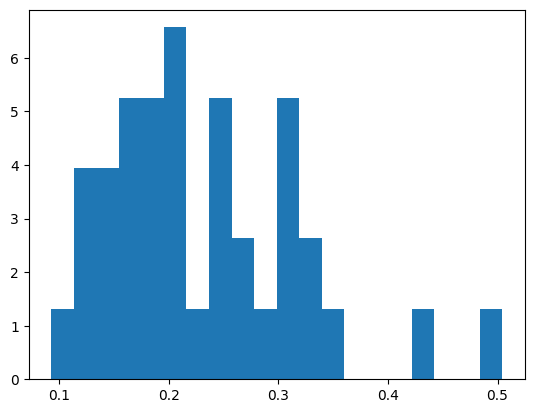

In [42]:
plt.hist(same_results['retinaface']['Facenet512']['results'], density=True, bins=20) 

(array([0.0680596 , 0.1361192 , 0.2382086 , 0.7146258 , 1.32716219,
        1.93969859, 2.48417539, 2.55223499, 2.68835419, 3.13074159,
        2.41611579, 2.31402639, 1.59940059, 1.191043  , 0.7146258 ,
        0.2041788 , 0.1361192 , 0.0340298 , 0.        , 0.0340298 ]),
 array([0.12268727, 0.16448814, 0.206289  , 0.24808987, 0.28989074,
        0.3316916 , 0.37349247, 0.41529333, 0.4570942 , 0.49889507,
        0.54069593, 0.5824968 , 0.62429766, 0.66609853, 0.7078994 ,
        0.74970026, 0.79150113, 0.83330199, 0.87510286, 0.91690373,
        0.95870459]),
 <BarContainer object of 20 artists>)

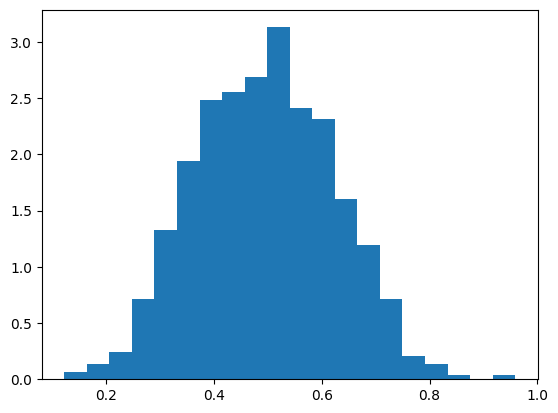

In [45]:
plt.hist(diff_results['retinaface']['Facenet512']['results'], density=True, bins=20) 

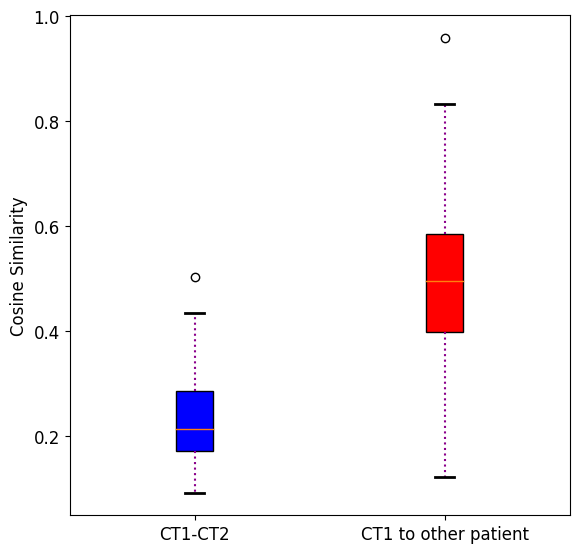

In [47]:
plot_two(same_results['retinaface']['Facenet512']['results'],diff_results['retinaface']['Facenet512']['results'])

In [23]:
skip = ['19','59','70','633','638','734','790','965','1288','1502','1763']
list_30 = [p for p in list_patients if p not in skip]
print(len(list_30))

29


In [54]:
same_results = get_same_results(list_30,print_result=False)

Testing retinaface backend, and Facenet512 model.


In [55]:
same_results_30 =same_results

In [56]:
diff_results_30 = get_diff_results(list_30,print_result=False)

Testing retinaface backend, and Facenet512 model.


In [23]:
def plot_hist(same, diff):
    plt.hist(same, bins=30, alpha=0.5, label='Same Patient',color='blue')
    plt.hist(diff, bins=30, alpha=0.5, label='Different Patient',color='red')
    
    # Add labels and legend
    plt.xlabel('Cosine Difference')
    plt.ylabel('Frequency')
    
    plt.legend(loc='upper right')
    
    # Show the plot
    plt.show()

In [350]:
def plot_hist_x3(same, diff,names=['Cosine Difference','Euclidian Distance','Euclidean L2 Distance'],density=True,threshold=0.4):
    if len(same) > 1:
        fig, axes = plt.subplots(1, len(same), figsize=(15, 5))  # 1 row, 3 columns
    else:
        fig = plt.figure(figsize=(5,5))
        # Create an axes instance
        ax = fig.add_axes([0,0,1,1])

    for i in range(len(same)):
        if len(same)> 1:
            ax = axes[i]
        ax.hist(same[i], bins=30, alpha=0.5,density=density, label='Same Patient', color='blue')
        ax.hist(diff[i], bins=30, alpha=0.5,density=density, label='Different Patient', color='red')
        
        ax.axvline(x=threshold, color='green', linestyle='--', linewidth=2)
                   
        ax.set_xlabel(names[i])
        ax.set_ylabel('Frequency')
        ax.legend(loc='upper right')

    

In [348]:
def plot_hist_x3x3(same, diff, anon,names=['Cosine Difference','Euclidian Distance','Euclidean L2 Distance'],density=True,threshold=0.4):
    if len(same) > 1:
        fig, axes = plt.subplots(1, len(same), figsize=(15, 5))  # 1 row, 3 columns
    else:
        fig = plt.figure(figsize=(5,5))
        # Create an axes instance
        ax = fig.add_axes([0,0,1,1])

    for i in range(len(same)):
        if len(same)> 1:
            ax = axes[i]
        ax.hist(same[i], bins=30, alpha=0.5,density=density, label='Same Patient', color='blue')
        ax.hist(diff[i], bins=30, alpha=0.5,density=density, label='Different Patient', color='red')
        ax.hist(anon[i], bins=30, alpha=0.5,density=density, label='Anon Patient', color='yellow')
        
        ax.axvline(x=threshold, color='green', linestyle='--', linewidth=2)
        
        ax.set_xlabel(names[i])
        ax.set_ylabel('Frequency')
        ax.legend(loc='upper right')

    

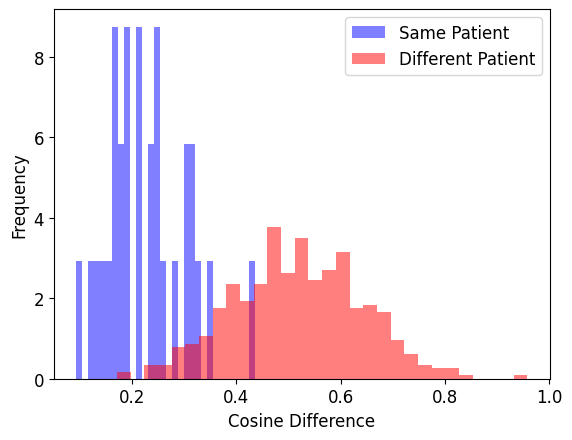

In [72]:
plot_hist(same_results_30['retinaface']['Facenet512']['results'],diff_results_30['retinaface']['Facenet512']['results'])

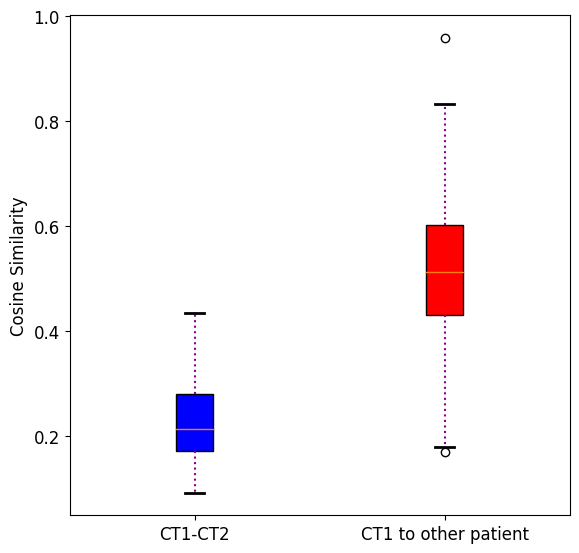

In [58]:
plot_two(same_results_30['retinaface']['Facenet512']['results'],diff_results_30['retinaface']['Facenet512']['results'])

In [68]:
diff_rmv = [0.648885881,0.608724618,0.538130548,0.55463174,0.827282009,0.811635008,0.468267314,0.450735981,
0.47202431,0.443767086,0.456645567,0.569143407,0.638577117,0.662691145,0.610983441,0.588172022,
0.655316885,0.565028804,0.635432145,0.673689492,0.517224359,0.484221004,0.583823151,0.398071726,
0.637376418,0.780437864,0.464828633,0.595972491,0.236156748,0.530007369,0.657238215,0.480135247,
0.549651652,0.609287581,0.45524799,0.597279367,0.548685608,0.385275929,0.715457013,0.466235434,
0.513765766,0.401289631,0.383369171,0.50795581,0.545869268,0.773723576,0.548587606,0.595246441,
0.505416462,0.664552395,0.479815391,0.2487208,0.474729017,0.681868559,0.46861479,0.394138313,
0.417710464,0.36848673,0.342252763,0.531049314,0.374430853,0.355098137,0.387735023,0.332927572,
0.607610341,0.505761335,0.392497935,0.39284233,0.425677366,0.358983853,0.515508243,0.57641289,
0.380688373,0.431187262,0.373867405,0.626747912,0.526554255,0.365098607,0.532486209,0.46293704,
0.401339553,0.299387718,0.484443826,0.320707148,0.433700242,0.323892361,0.37741808,0.412743283,
0.38201064,0.802766931,0.670375971,0.535082618,0.395973156,0.64756327,0.594892465,0.704210568,
0.583450194,0.628524265,0.291579851,0.630262876,0.526858881,0.47332462,0.49441064,0.401526365,
0.422968495,0.562449224,0.387501614,0.534688502,0.377584779,0.282321026,0.404505242,0.322916976,
0.412116225,0.708508791,0.745325741,0.469979621,0.29671921,0.676575112,0.614688785,0.720246021,
0.659230749,0.519613693,0.460476687,0.395648353,0.445907388,0.410039692,0.613825544,0.512972847,
0.349888196,0.698362236,0.509389261,0.560473811,0.396059528,0.687251951,0.367503312,0.347764794,
0.740342941,0.598374493,0.441736116,0.438610637,0.662428552,0.51207699,0.615484469,0.730514357,
0.371982238,0.684014274,0.462233753,0.600643096,0.764356829,0.466435352,0.525512727,0.36662314,
0.413671423,0.57650498,0.551082747,0.431641855,0.494022936,0.533682745,0.687386575,0.618343951,
0.558322896,0.478623375,0.63831618,0.423855832,0.546797807,0.470760421,0.503037985,0.420733621,
0.612287007,0.447610753,0.627319371,0.508018196,0.44129056,0.514681752,0.475715316,0.473242283,
0.398605581,0.489799602,0.473951574,0.706524318,0.528237858,0.484200556,0.525385057,0.672958588,
0.471418161,0.593283944,0.682778552,0.517204606,0.616964995,0.506380733,0.434960539,0.584634245,
0.581491926,0.371962994,0.342055825,0.519245455,0.463750033,0.274746257,0.292638479,0.799275593,
0.672097693,0.658976498,0.305858357,0.593223582,0.694078389,0.579398159,0.733046864,0.499292689,
0.466422304,0.512495597,0.482615199,0.47818691,0.430004667,0.466433421,0.360189877,0.610902552,
0.380225261,0.335528631,0.555164535,0.592515873,0.601337651,0.586448913,0.612945846,0.486168816,
0.625488243,00.458957603,0.424602942,0.266464958,0.519791301,0.497326027,0.59319142,0.666571271,
0.462410366,0.336718528,0.598401064,0.170523615,0.679823052,0.722528079,0.643856334,0.467109853,
0.69780328,0.557413757,0.634713137,0.747414809,0.52879916,0.383030596,0.413159794,0.535385089,
0.538277671,0.616805721,0.57423061,0.291778906,0.602535684,0.634469375,0.576778433,0.618705711,
0.48843588,0.624156297,0.572181955,0.600536669,0.731600986,0.502157275,0.366007488,0.394790347,
0.510796398,0.590283688,0.576745303,0.47838953,0.334776614,0.468997253,0.320651245,0.496628648,
0.624281959,0.393448611,0.366963389,0.497958355,0.502842437,0.416745395,0.69360968,0.321636563,
0.512650221,0.536066956,0.54491104,0.958704593,0.583134818,0.518461484,0.561085448,0.578918628,
0.316883295,0.384394284,0.442044298,0.406908452,0.344996127,0.67872074,0.424947404,0.408105698,
0.570045156,0.371067004,0.695544869,0.512983979,0.503296051,0.406322054,0.438249479,0.23914197,
0.471679985,0.689987197,0.515402937,0.833837325,0.404202374,0.619592163,0.543302219,0.37805415,
0.537040326,0.58144632,0.248310198,0.60743273,0.503105257,0.429172001,0.585249099,0.450607455,
0.624238217,0.350000433,0.390186266,0.31152855, 0.366989501,0.476191192,0.529244436,0.460508241,0.384843134,0.591785271,0.589504014,0.501832505,
0.652554533,0.516173326,0.561506692,0.455763157,0.180267501,0.720560961,0.638359535,0.542082727,
0.422801849,0.494872163,0.367205309,0.668241473,0.463102161,0.501497062,0.606728085,0.388771935,
0.558258352,0.462661138,0.29496905,0.581743477,0.38510117,0.789607928,0.360087854,0.321991009,
0.547202854,0.451226098,0.662630083,0.476763025, 0.305622989,0.398192323,0.535088666,0.540543256,0.371825061,0.714901374,0.603529406,0.701676153,
0.513447847,0.649341643,0.595027877,0.394616095,0.435207497,0.630372253,0.451492262,0.646744922,
0.227884047,0.499180422,0.635940532,0.569771698,0.542417735,0.665254871,0.608464998,0.452991513,
0.773349611,0.301273998,0.434701266,0.491073685,0.670769364,0.448692711,0.460054567,0.491441473,
0.499997089,0.45306149,0.41277648,0.570665832,0.455265041,0.74969822,0.669052554,0.645837007,
0.545616333,0.578493946,0.425607501,0.56084898,
0.544623438,0.609413546]

In [69]:
same_rm = [0.176156514,0.355301208,0.269301538,0.209385801,0.17436911,0.24705856,0.137979513,0.259113329,
0.213225232,0.237381135,0.171425179,0.310299794,0.187275602,0.139981382,0.18978061,0.312951194,
0.300455139,0.247055309,0.32142491,0.092773414,0.170861789,0.118752303,0.286563812,0.168905653,
0.15177821,0.193853605,0.213040323,0.247293422,0.231386549]

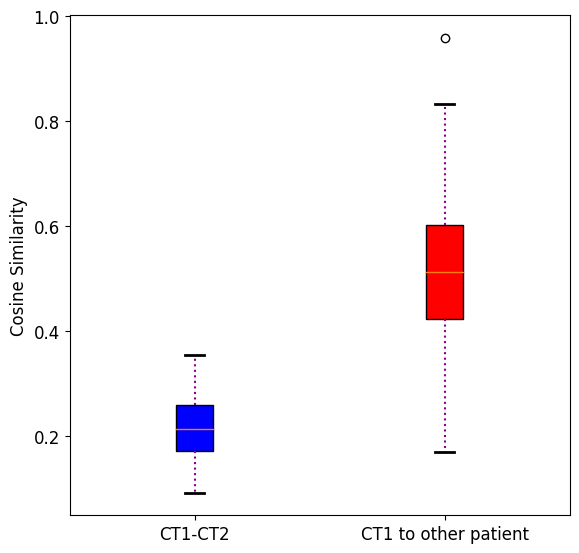

In [70]:
plot_two(same_rm,diff_rmv)

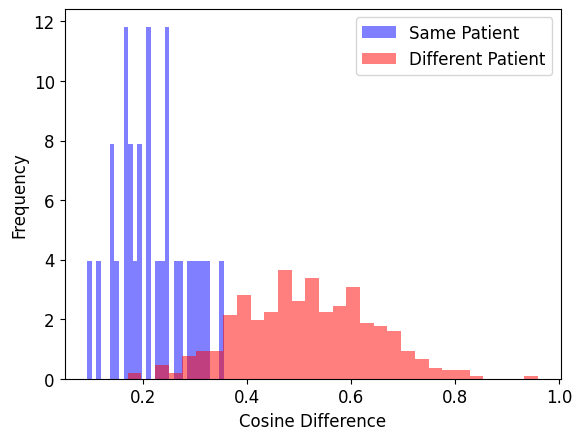

In [74]:
plot_hist(same_rm,diff_rmv)

In [3]:
same_24 = [0.176156514,0.269301538,0.209385801,0.17436911,0.24705856,0.137979513,0.259113329,0.213225232,
0.237381135,0.171425179,0.187275602,0.139981382,0.18978061,0.247055309,0.092773414,0.170861789,
0.118752303,0.286563812,0.168905653,0.15177821,0.193853605,0.213040323,0.247293422,0.231386549]

diff_24 = [0.608724618,0.538130548,0.55463174,0.827282009,0.811635008,0.468267314,0.450735981,0.47202431,
0.443767086,0.569143407,0.638577117,0.662691145,0.655316885,0.635432145,0.673689492,0.517224359,
0.484221004,0.583823151,0.398071726,0.637376418,0.780437864,0.464828633,0.595972491,0.394138313,
0.417710464,0.36848673,0.342252763,0.531049314,0.374430853,0.355098137,0.387735023,0.607610341,
0.505761335,0.392497935,0.358983853,0.57641289,0.380688373,0.431187262,0.373867405,0.626747912,
0.526554255,0.365098607,0.532486209,0.46293704,0.401339553,0.299387718,0.484443826,0.320707148,
0.433700242,0.323892361,0.37741808,0.412743283,0.802766931,0.670375971,0.535082618,0.594892465,
0.583450194,0.628524265,0.291579851,0.630262876,0.526858881,0.47332462,0.49441064,0.401526365,
0.422968495,0.562449224,0.387501614,0.534688502,0.377584779,0.282321026,0.404505242,0.322916976,
0.708508791,0.745325741,0.469979621,0.614688785,0.659230749,0.519613693,0.460476687,0.395648353,
0.445907388,0.410039692,0.613825544,0.512972847,0.349888196,0.698362236,0.509389261,0.560473811,
0.396059528,0.687251951,0.367503312,0.740342941,0.598374493,0.441736116,0.51207699,0.730514357,
0.371982238,0.684014274,0.462233753,0.600643096,0.764356829,0.466435352,0.525512727,0.36662314,
0.413671423,0.57650498,0.551082747,0.431641855,0.494022936,0.687386575,0.618343951,0.558322896,
0.423855832,0.470760421,0.503037985,0.420733621,0.612287007,0.447610753,0.627319371,0.508018196,
0.44129056,0.514681752,0.475715316,0.473242283,0.398605581,0.489799602,0.706524318,0.528237858,
0.484200556,0.471418161,0.682778552,0.517204606,0.616964995,0.506380733,0.434960539,0.584634245,
0.581491926,0.371962994,0.342055825,0.519245455,0.463750033,0.274746257,0.799275593,0.672097693,0.658976498,0.694078389,0.733046864,0.499292689,
0.466422304,0.512495597,0.482615199,0.47818691,0.430004667,0.466433421,0.360189877,0.610902552,
0.380225261,0.555164535,0.592515873,0.601337651,0.486168816,0.458957603,0.424602942,0.266464958,
0.519791301,0.497326027,0.59319142,0.666571271,0.462410366,0.336718528,0.598401064,0.679823052,
0.722528079,0.643856334,0.557413757,0.747414809,0.52879916,0.383030596,0.413159794,0.535385089,
0.538277671,0.616805721,0.57423061,0.291778906,0.602535684,0.320651245,0.496628648,0.366963389,
0.502842437,0.416745395,0.69360968,0.321636563,0.512650221,0.536066956,0.54491104,0.958704593,
0.583134818,0.518461484,0.561085448,0.384394284,0.406908452,0.344996127,0.67872074,0.424947404,
0.408105698,0.570045156,0.371067004,0.695544869,0.512983979,0.503296051,0.23914197,0.689987197,
0.515402937,0.833837325,0.404202374,0.619592163,0.543302219,0.37805415,0.537040326,0.58144632,
0.248310198,0.494872163,0.367205309,0.668241473,0.463102161,0.501497062,0.606728085,0.388771935,
0.558258352,0.462661138,0.29496905,0.398192323,0.535088666,0.540543256,0.371825061,0.714901374,
0.603529406,0.701676153,0.513447847,0.649341643,0.595027877,0.394616095,0.435207497,0.630372253,
0.451492262,0.646744922,0.227884047,0.499180422,0.635940532,0.569771698,0.542417735,0.665254871,
0.608464998,0.452991513,0.773349611,0.301273998,0.434701266,0.491073685,0.670769364,0.448692711,
0.460054567,0.491441473,0.499997089,0.45306149,0.41277648,0.570665832,0.455265041,0.74969822,
0.669052554,0.645837007,0.545616333,0.578493946,0.425607501,0.560848985,0.544623438,0.609413546
]

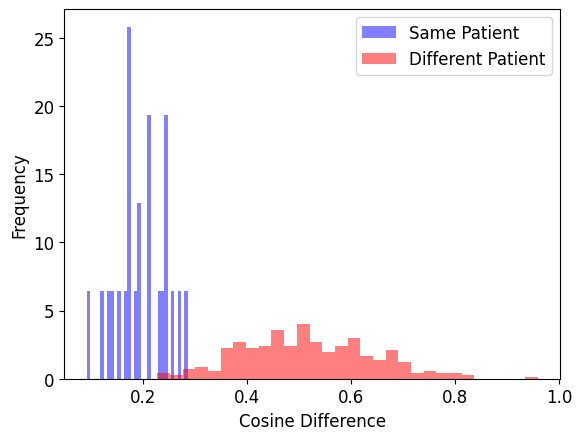

In [77]:
plot_hist(same_24,diff_24)

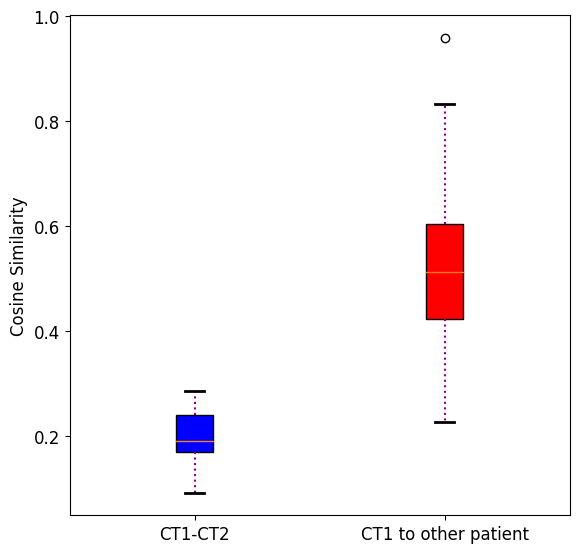

In [78]:
plot_two(same_24,diff_24)

In [79]:
get_same_results(['1955','1949','1888'])

Testing retinaface backend, and Facenet512 model.
1955 0.46069308806312004
1949 0.1639040012272588
1888 0.29036711667724513


{'retinaface': {'Facenet512': {'results': [0.46069308806312004,
    0.1639040012272588,
    0.29036711667724513],
   'undetected': 0}}}

In [91]:
DeepFace.analyze(img_path = PATH+'35_2.png', actions = ['age','gender'], detector_backend = 'retinaface') 

Action: gender: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.00it/s]


[{'age': 43,
  'region': {'x': 158,
   'y': 48,
   'w': 142,
   'h': 202,
   'left_eye': (264, 137),
   'right_eye': (198, 134)},
  'face_confidence': 1.0,
  'gender': {'Woman': 0.08286735974252224, 'Man': 99.91713762283325},
  'dominant_gender': 'Man'}]

In [90]:
DeepFace.analyze(img_path = PATH+'54_1.png', actions = ['age','gender'], detector_backend = 'retinaface') 

Action: gender: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.91it/s]


[{'age': 44,
  'region': {'x': 159,
   'y': 55,
   'w': 134,
   'h': 195,
   'left_eye': (254, 128),
   'right_eye': (195, 129)},
  'face_confidence': 1.0,
  'gender': {'Woman': 6.181327626109123, 'Man': 93.81867051124573},
  'dominant_gender': 'Man'}]

In [82]:
DeepFace.analyze(img_path = PATH+'1949_1.png', actions = ['age'], detector_backend = 'retinaface') 

[{'age': 43,
  'region': {'x': 172,
   'y': 33,
   'w': 135,
   'h': 179,
   'left_eye': (273, 93),
   'right_eye': (215, 90)},
  'face_confidence': 0.99}]

In [83]:
DeepFace.analyze(img_path = PATH+'1949_1.png', actions = ['gender'], detector_backend = 'retinaface') 

2024-10-04 20:44:16.872824: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


24-10-04 20:44:17 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /home/kayla/.deepface/weights/gender_model_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 537M/537M [00:05<00:00, 93.6MB/s]


[{'gender': {'Woman': 0.5166701506823301, 'Man': 99.483323097229},
  'dominant_gender': 'Man',
  'region': {'x': 172,
   'y': 33,
   'w': 135,
   'h': 179,
   'left_eye': (273, 93),
   'right_eye': (215, 90)},
  'face_confidence': 0.99}]

In [97]:
 result = DeepFace.verify(img1_path = PATH+"35_2.png", img2_path = PATH+'test_.png', enforce_detection=True,align=True,threshold=0.4, detector_backend ='retinaface',model_name='Facenet512')

In [98]:
result

{'verified': False,
 'distance': 0.8774981022954018,
 'threshold': 0.4,
 'model': 'Facenet512',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 158,
   'y': 48,
   'w': 142,
   'h': 202,
   'left_eye': (264, 137),
   'right_eye': (198, 134)},
  'img2': {'x': 16,
   'y': 8,
   'w': 42,
   'h': 56,
   'left_eye': (49, 34),
   'right_eye': (31, 29)}},
 'time': 4.4}

In [4]:
list_24 = ['35','59','81','118','272','274','437','447','448','462','625','628','644','685','848','892','910','946','961','1314',
           '1552','2037','2041','2056'
]

In [11]:
same_results_24_euc = get_same_results(list_24,print_result=True,metric=metrics[1])

Testing retinaface backend, and Facenet512 model.


2024-10-07 17:43:01.495837: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78118912 exceeds 10% of free system memory.
2024-10-07 17:43:01.780158: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78687232 exceeds 10% of free system memory.
2024-10-07 17:43:01.878723: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78118912 exceeds 10% of free system memory.
2024-10-07 17:43:01.973567: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78118912 exceeds 10% of free system memory.
2024-10-07 17:43:02.053279: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78118912 exceeds 10% of free system memory.


35 14.110335172115429
59 17.333764962489525
81 14.892316372980165
118 13.753256642630024
272 16.85771471223687
274 11.969068813583007
437 17.02500564178839
447 15.51005633638472
448 16.840630208762946
462 14.052904799240137
625 13.561420647448637
628 11.961946236985993
644 14.71242330087911
685 16.159470374374866
848 10.32444764559021
892 13.32537308802299
910 12.137042114769448
946 16.98679417118599
961 12.955108698383839
1314 12.130073186613163
1552 13.608959060247065
2037 15.372830357946873
2041 17.123730397932636
2056 16.38001383022127


In [12]:
diff_results_24_euc = get_diff_results(list_24,print_result=True,metric=metrics[1])

Testing retinaface backend, and Facenet512 model.
35 59 26.478686439904116
35 81 24.49314712829104
35 118 24.86948802801943
35 272 31.438306556726058
35 274 29.42759200428336
35 437 23.20594505063032
35 447 22.60822913608406
35 448 23.635237652273617
35 462 22.57732053699456
35 625 24.563200949093794
35 628 25.25576984917891
35 644 27.58761121390287
35 685 26.403193179381812
35 848 26.423876406215655
35 892 26.863478410311565
35 910 25.12004206095704
35 946 23.001887952177032
35 961 25.156838307175754
35 1314 20.691203119210336
35 1552 25.745660457637378
35 2037 29.68883516287051
35 2041 23.392295861456592
35 2056 26.33236772042975
59 81 21.047916887060087
59 118 21.67058948158755
59 272 21.066249024783467
59 274 19.23845898998444
59 437 24.804280254978973
59 447 20.685222846630193
59 448 20.573873280269776
59 462 21.18231452913004
59 625 25.48276441518005
59 628 22.639197809283385
59 644 21.310346555668218
59 685 19.666845777203726
59 848 25.269541764673615
59 892 20.310313154074205
5

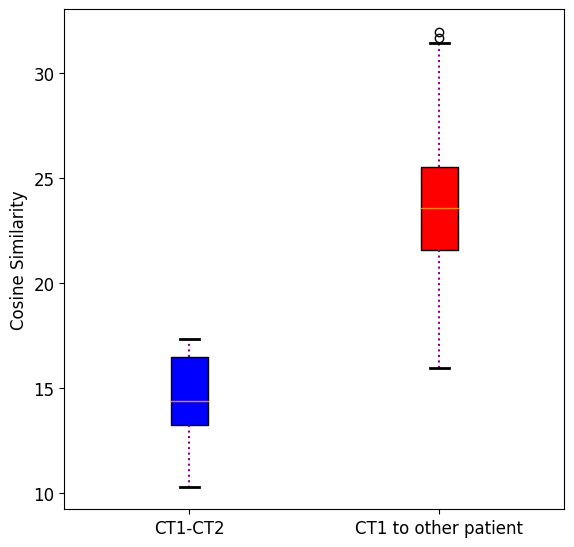

In [16]:
plot_two(same_results_24_euc['retinaface']['Facenet512']['results'],diff_results_24_euc['retinaface']['Facenet512']['results'])


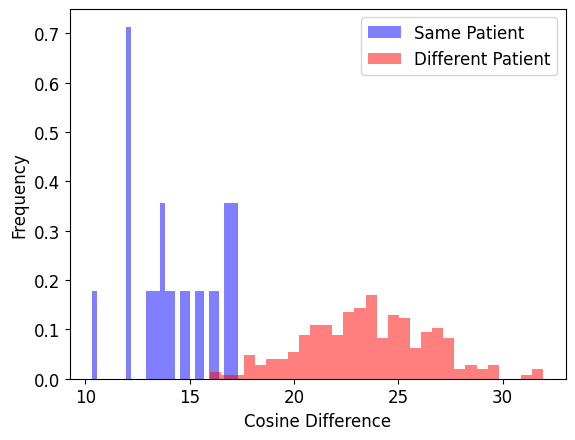

In [17]:
plot_hist(same_results_24_euc['retinaface']['Facenet512']['results'],diff_results_24_euc['retinaface']['Facenet512']['results'])

In [18]:
same_results_24_l2 = get_same_results(list_24,print_result=True,metric=metrics[2])

Testing retinaface backend, and Facenet512 model.
35 0.5935596247949021
59 0.7338958212536492
81 0.647125646173426
118 0.590540617369416
272 0.7029346483068447
274 0.5253180243440378
437 0.7198796131594154
447 0.6530317486582877
448 0.6890299490333492
462 0.5855342505579931
625 0.6120058857821559
628 0.5291150772148432
644 0.6160853994633768
685 0.7029300237938666
848 0.4307514681244904
892 0.5845712765374009
910 0.48734444372863167
946 0.7570519295940737
961 0.5812153700292263
1314 0.5509595451637037
1552 0.6226613925344169
2037 0.6527485320186486
2041 0.7032686849310924
2056 0.6802742811593612


In [19]:
diff_results_24_l2 = get_diff_results(list_24,print_result=True,metric=metrics[2])

Testing retinaface backend, and Facenet512 model.
35 59 1.1033808205019882
35 81 1.0374300440247362
35 118 1.0532157806409188
35 272 1.2862985728466156
35 274 1.2740761423204916
35 437 0.9677471923853327
35 447 0.9494587735036154
35 448 0.9716216440152703
35 462 0.9420903204244792
35 625 1.0669052505621954
35 628 1.1301124874679265
35 644 1.1512524877653463
35 685 1.1448291448936436
35 848 1.1273261684582874
35 892 1.160766549803068
35 910 1.017078520762402
35 946 0.9840945113053869
35 961 1.0805768378106415
35 1314 0.8922687108996814
35 1552 1.1290495277718706
35 2037 1.2493501226335477
35 2041 0.9641873605523169
35 2056 1.0917623281892248
59 81 0.8878494390853463
59 118 0.9140136370808455
59 272 0.8584715840430295
59 274 0.8273484907039281
59 437 1.0305816939094858
59 447 0.8653679596512742
59 448 0.8427314367871855
59 462 0.8806077704698111
59 625 1.1023704830572583
59 628 1.005744833232195
59 644 0.8859999265704894
59 685 0.8473297499524429
59 848 1.073697247573565
59 892 0.8725690

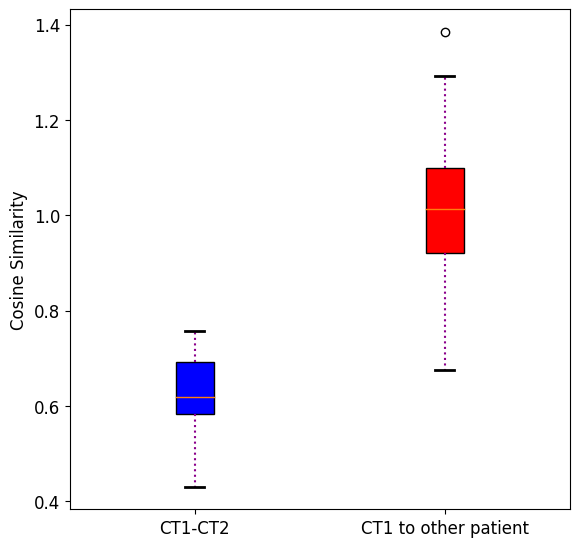

In [20]:
plot_two(same_results_24_l2['retinaface']['Facenet512']['results'],diff_results_24_l2['retinaface']['Facenet512']['results'])


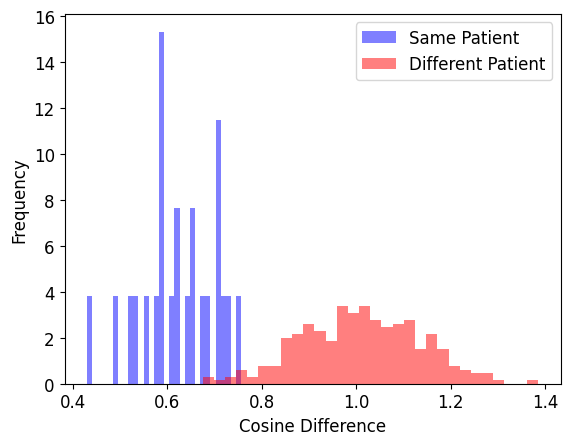

In [21]:
plot_hist(same_results_24_l2['retinaface']['Facenet512']['results'],diff_results_24_l2['retinaface']['Facenet512']['results'])

In [15]:
same_results_all_l2 = get_same_results(list_patients,print_result=True,metric=metrics[2])

Testing retinaface backend, and Facenet512 model.
19 0.5132354106521886
35 0.5935596247949021
54 0.8429723693826303
59 0.7338958212536492
70 0.9332906716353037
81 0.647125646173426
118 0.590540617369416
272 0.7029346483068447
274 0.5253180243440378
437 0.7198796131594154
447 0.6530317486582877
448 0.6890299490333492
462 0.5855342505579931
600 0.7877814338088469
625 0.6120058857821559
628 0.5291150772148432
633 undetected
638 undetected
644 0.6160853994633768
651 0.791139929054114
673 0.7751840287925899
685 0.7029300237938666
734 0.8031274129397876
755 0.801779159518646
790 0.6553144001160375
848 0.4307514681244904
892 0.5845712765374009
910 0.48734444372863167
946 0.7570519295940737
961 0.5812153700292263
965 0.6507740164007965
1288 0.4901192209725846
1314 0.5509595451637037
1502 undetected
1552 0.6226613925344169
1763 1.0041261894291624
1888 0.7620592059377609
1892 0.7865610803740701
1949 0.5725451968661669
1955 0.9598886269386883
2037 0.6527485320186486
2041 0.7032686849310924
2056 0

In [16]:
diff_results_all_l2 = get_diff_results(list_patients,print_result=True,metric=metrics[2])

Testing retinaface backend, and Facenet512 model.
19 35 0.9574081031325306
19 54 0.9178995148128125
19 59 0.7887433063165411
19 70 0.8134506490611085
19 81 0.8402561262607777
19 118 0.8248116759244808
19 272 0.8494710223278243
19 274 0.9699659159003409
19 437 0.9238928112123755
19 447 0.7921490523794218
19 448 0.775940850309768
19 462 0.6604308557013071
19 600 0.49535294711344224
19 625 1.0573308019703984
19 628 1.0355185463475578
19 633 1.0299084732665875
19 644 1.097646478630677
19 651 0.9203905990952401
19 673 1.1481532442864197
19 685 1.0361981672212175
19 734 0.871287223760072
19 755 1.0384131448449876
19 790 1.0058724461930368
19 848 1.1199676411810344
19 892 0.9276981163028307
19 910 0.7423010397436768
19 946 0.7793344669742398
19 961 0.9203983491447313
19 965 0.8619981986969051
19 1288 0.9433457974032998
19 1314 0.9348335361445326
19 1552 1.0821419866890793
19 1763 0.7565573426549028
19 1888 0.9764056065838947
19 1892 0.8920868543828285
19 1949 1.0338663142210762
19 1955 1.0526

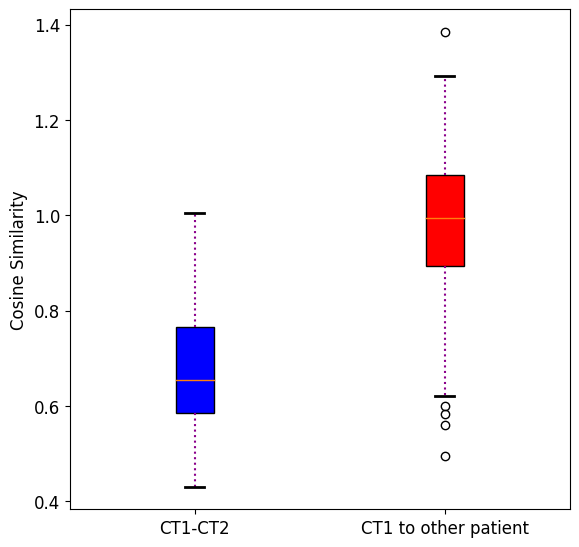

In [19]:
plot_two(same_results_all_l2['retinaface']['Facenet512']['results'],diff_results_all_l2['retinaface']['Facenet512']['results'])


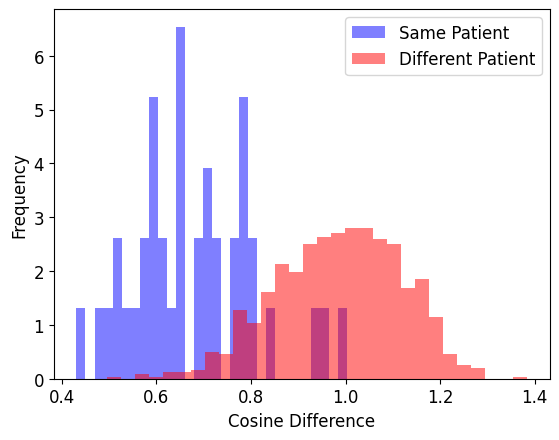

In [22]:
plot_hist(same_results_all_l2['retinaface']['Facenet512']['results'],diff_results_all_l2['retinaface']['Facenet512']['results'])

In [24]:
same_30_l2 = [0.593559625,0.733895821,0.647125646,0.590540617,0.702934648,0.525318024,0.719879613,0.653031749,
0.689029949,0.585534251,0.787781434,0.612005886,0.529115077,0.616085399,0.775184029,0.702930024,
0.80177916,0.430751468,0.584571277,0.487344444,0.75705193,0.58121537,0.550959545,0.622661393,
0.762059206,0.78656108,0.572545197,0.652748532,0.703268685,0.680274281]

In [41]:
diff_30_l2 = [1.103380821,1.037430044,1.053215781,1.286298573,1.274076142,0.967747192,0.949458774,0.971621644,
0.94209032,0.955662667,1.066905251,1.130112487,1.151252488,1.084593953,1.144829145,1.063041678,
1.127326168,1.16076655,1.017078521,0.984094511,1.080576838,0.892268711,1.129049528,1.029165213,
0.919612174,1.195636692,1.249350123,0.964187361,1.091762328,0.887849439,0.914013637,0.858471584,
0.827348491,1.030581694,0.86536796,0.842731437,0.88060777,0.815999476,1.102370483,1.005744833,
0.885999927,0.92268886,0.84732975,1.01538982,1.073697248,0.87256905,0.928641225,0.864716606,
1.119596277,1.026210753,0.854515778,1.03821082,0.952653038,0.764137261,1.031975008,0.962223508,
0.895923605,0.773805812,0.984320909,0.800883447,0.931343376,0.804850745,0.868813075,0.908562913,
0.874083108,1.267096627,1.157908434,1.03448791,1.138036264,1.09077263,1.186769201,1.080231636,
1.121181756,0.763648939,1.12273138,1.026507556,0.972959012,0.994394931,0.973124255,0.961385082,
1.168218106,0.896132094,0.919748329,1.060612298,0.880342677,1.034106863,0.869004924,0.751426678,
0.899450101,0.803637948,0.907872486,1.190385476,1.22092239,0.969514952,1.163249855,1.108773002,
1.200205,1.148242787,1.01942507,0.95966315,0.889548596,0.944359453,0.905582346,1.107994173,
0.993072258,0.828701859,0.988759737,1.012889774,0.836526384,1.181830983,1.009345591,1.058748139,
0.890010705,1.172392384,0.857325273,0.833984166,1.216834369,1.093960231,0.939932036,1.151024372,
1.012004931,1.109490395,1.208730207,0.862533754,1.169627525,0.961492333,1.096032021,1.236411606,
0.96585232,1.203819158,0.986423393,0.87684761,1.025195324,0.856298009,0.909583886,1.073783014,
1.049840699,0.92913062,0.994004966,1.03313382,1.172507207,1.112064702,1.056714622,1.129881569,
0.920712585,1.04575122,0.970319969,1.003033384,0.917315236,1.106604724,0.946161458,1.120106576,
1.007986305,1.170524935,1.097921974,1.02742704,0.939457886,1.014575529,0.975413057,0.972874384,
0.892866822,0.98974704,0.973603177,1.188717223,1.027850046,0.984073733,1.160136706,0.970997591,
1.089296969,1.168570539,1.0170591,1.110824014,1.00636050,0.932695598,1.081327189,1.078417291,
1.107637392,0.893256014,1.053428784,0.86251144,
0.827110422,1.019063742,0.963068049,0.741277623,0.765033958,1.26433824,1.159394404,1.14802134,
1.089241555,1.178200653,1.076474021,1.210823574,0.999292439,0.965838811,1.012418488,0.982461398,
0.977943669,0.927366882,0.943858356,0.883505468,1.005803604,0.96585032,0.84875188,1.105352932,
0.872038143,0.819180848,1.053721533,1.088591635,1.096665538,1.107199934,0.986071819,1.118470602,
0.958078915,0.921523675,0.73002049,1.019599236,0.997322442,1.089212027,1.154617921,1.118350976,
1.069584285,1.104684794,0.961676001,0.820632108,1.093984519,0.583992492,1.166038638,1.202104886,
1.134774281,1.181357931,1.055853927,1.126688188,1.22263225,1.028395994,0.875249217,0.909021225,
1.034780256,1.037571849,1.110680621,1.171154917,0.938404918,1.117038885,1.071662829,0.763909557,
1.097757427,1.126471815,1.074037646,1.11238996,1.117279103,1.069749461,1.095934915,1.209628857,
1.002154953,0.855578738,0.888583532,1.010738738,1.086539174,1.0740068,1.060974366,0.922623873,
1.09019516,0.978150837,0.818262323,0.968501165,0.800813643,0.996622946,0.887072276,0.856695266,
0.997956266,1.002838409,0.912957168,1.177802768,0.802043095,1.012571203,1.035438994,1.043945439,
1.083867859,0.972805268,1.054264148,1.384705451,1.079939645,1.018294146,1.05932568,0.796094586,
0.87680589,0.940259856,0.90211801,0.830657724,1.165092906,0.921897396,0.903444186,1.067750117,
0.861472,0.901503048,1.01239014,1.040960074,1.179444673,1.012900764,1.003290637,0.93621523,
0.691580755,0.971267198,1.174723114,1.01528605,1.29138478,0.899113313,1.113186564,1.042403203,
0.869544881,1.126726627,0.867716503,0.838873844,1.036378624,1.078375,0.704712989,0.877317655,
1.087920283,1.0858213,1.001830829,1.14241370,1.016044611,1.059723258,0.954738872,0.600445669,
0.904195157,0.828043186,0.930123408,1.200467376,1.129919939,1.041232661,0.919567126,0.994858948,
0.856977607,1.156063556,0.962395097,1.001495943,1.101569866,0.88178448,1.198322379,0.935976163,
0.921376332,1.05665354,0.961936731,0.768074281,1.078650525,0.877611725,1.256668554,0.848631668,
0.802484902,1.046138474,0.94997484,1.008491845,0.9667904,0.98091888,1.15119944,0.976486585,0.781822216,
0.892403858,1.03449376,1.039753101,0.862351508,1.195743596,1.098662283,
1.129110377,1.189592954,1.131687556,1.184631718,1.013358621,1.139597861,1.090896766,0.88838741,
0.932960339,1.122828797,0.950254979,1.078987297,1.028403562,0.788535769,1.137316949,0.675105987,
0.999180085,1.127777045,1.067493979,1.041554353,1.15347724,1.024781408,1.09804349,1.203633708,
1.1031455,0.951831406,1.24366362,0.776239651,0.932417574,
0.991033485,0.92420510,0.832531834,0.911839749,1.158248129,0.947304292,0.959223193,0.991404532,
0.999997089,0.845876845,0.854171353,1.099302535,0.951904921,0.908599449,1.068331252,0.954216999,
0.628068954,0.736779537,0.9882679,1.224498444,1.15676493,1.136518374,0.878049485,
0.74652427,0.829841439,1.044620824,1.075633716,0.922613138,0.853434082,0.991912058,1.149037148,
1.140951384,1.17072706,0.87826094,1.058362763,1.013993115,0.942067167,1.147790724,1.077009888,
0.835942885,1.059102436,1.043669908,1.104005024
]

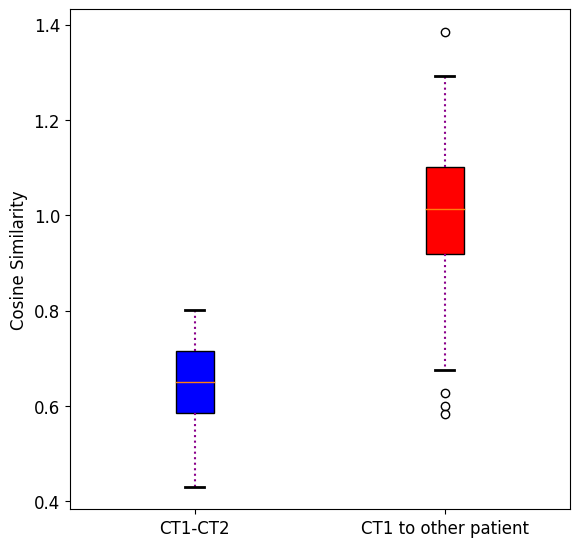

In [42]:
plot_two(same_30_l2,diff_30_l2)


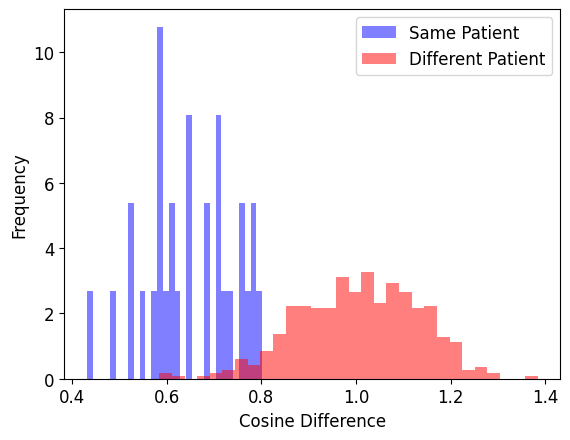

In [43]:
plot_hist(same_30_l2,diff_30_l2)

In [44]:
len(same_30_l2)

30

In [48]:
skip = ['19','54','70','633','638','651','734','790','965','1288','1502','1763','1955']

In [49]:
pts_30_cos = [p for p in list_patients if p not in skip]
print(len(pts_30_cos))


30


In [60]:
anon_re_30_l2 = get_anon_results(pts_30_cos,metric=metrics[2])


Testing retinaface backend, and Facenet512 model.
error  35
error  59
error  81
error  600
error  673
error  685
error  755
error  892
error  1552
error  1888
error  1892
error  1949
error  2041


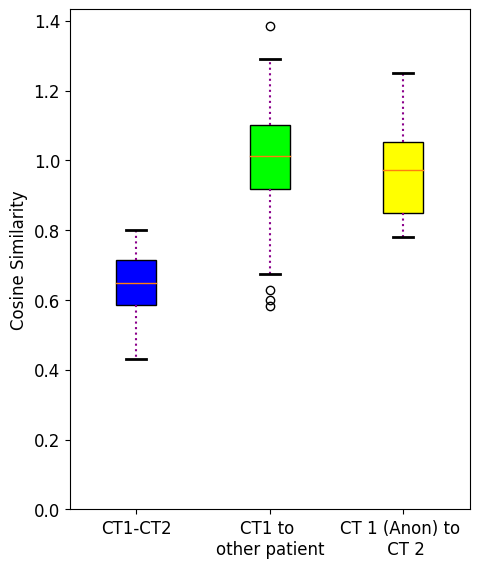

In [62]:
plot_whiskers_3(same_30_l2,diff_30_l2,anon_re_30_l2['retinaface']['Facenet512']['results'])

In [77]:
len(list_all)

64

In [12]:
from deepface.modules import verification

## Test that represent + distances is same as verify

In [106]:
p = "462"
result = DeepFace.verify(img1_path = PATH+p+"_1.png", img2_path = PATH+p+'_2.png', enforce_detection=True,threshold=0.4, detector_backend ='retinaface',model_name='Facenet512',distance_metric='cosine')
print(result['distance'])

0.17142517928825518


In [107]:
vector_1 =  DeepFace.represent(img_path = PATH+p+"_1"+".png", enforce_detection=False,detector_backend='retinaface',model_name='Facenet512') 
vector_2 =  DeepFace.represent(img_path = PATH+p+"_2"+".png", enforce_detection=False,detector_backend='retinaface',model_name='Facenet512') 
verification.find_distance(vector_1[0]['embedding'], vector_2[0]['embedding'], "cosine")

0.17142517928825518

In [793]:
# get list patients: 
list_all = []
for f in [x.split("_")[0] for x in os.listdir(PATH) if "_1" in x]:
    list_all.append(f)
list_all.sort(key = int)
print(len(list_all))

77


In [794]:
emb_dict = {}
for p in list_all:
    # print(p)
    emb_dict[p] = {}
    try:
        emb_dict[p]['1'] = DeepFace.represent(img_path = PATH+p+"_1"+".png", enforce_detection=True,detector_backend='retinaface',model_name='Facenet512') 
    except:
        print(p,"1: No face detected")
    try:
        emb_dict[p]['2'] =  DeepFace.represent(img_path = PATH+p+"_2"+".png", enforce_detection=True,detector_backend='retinaface',model_name='Facenet512') 
    except:
        print(p,"2: No face detected")
    try:
        emb_dict[p]['A'] =  DeepFace.represent(img_path = PATH+p+"_A"+".png", enforce_detection=True,detector_backend='retinaface',model_name='Facenet512') 
    except:
        print(p,"A: No face detected")

35 A: No face detected
478 A: No face detected
633 A: No face detected
638 2: No face detected
638 A: No face detected
694 A: No face detected
721 1: No face detected
964 A: No face detected
1502 2: No face detected
1502 A: No face detected
1892 A: No face detected
2037 A: No face detected


In [782]:
p='1502'
DeepFace.represent(img_path = PATH+p+"_2"+".png", enforce_detection=True,detector_backend='retinaface',model_name='Facenet512') 

ValueError: Face could not be detected in /mnt/iDriveShare/Kayla/CBCT_images/anonymized/screenshots/1502_2.png.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [690]:
p = '694'
e1 = DeepFace.represent(img_path = PATH+p+"_1"+".png", enforce_detection=True,detector_backend='retinaface',model_name='Facenet512') 
e2 = DeepFace.represent(img_path = PATH+p+"_2"+".png", enforce_detection=True,detector_backend='retinaface',model_name='Facenet512') 
# ea = DeepFace.represent(img_path = PATH+p+"_A"+".png", enforce_detection=True,detector_backend='retinaface',model_name='Facenet512') 

In [662]:
print(verification.find_distance(e1[0]['embedding'], e2[0]['embedding'], 'cosine'))
# print(verification.find_distance(ea[0]['embedding'], e2[0]['em\bedding'], 'cosine'))

0.1040129449924907


In [801]:
for p in emb_dict.keys():
    try:
        emb_dict[p]['A']
    except:
        try:    
            emb_dict[p]['A'] =  DeepFace.represent(img_path = PATH+p+"_A"+".png", enforce_detection=False,detector_backend='retinaface',model_name='Facenet512') 
        except Exception as e:
            print(e)

Confirm that /mnt/iDriveShare/Kayla/CBCT_images/anonymized/screenshots/35_A.png exists
Confirm that /mnt/iDriveShare/Kayla/CBCT_images/anonymized/screenshots/638_A.png exists
Confirm that /mnt/iDriveShare/Kayla/CBCT_images/anonymized/screenshots/1502_A.png exists


In [918]:
for p in emb_dict.keys():
    try:
        emb_dict[p]['2']
    except:
        try:    
            emb_dict[p]['2'] =  DeepFace.represent(img_path = PATH+p+"_2"+".png", enforce_detection=False,detector_backend='retinaface',model_name='Facenet512') 
        except Exception as e:
            print(e)
    try:
        emb_dict[p]['1']
    except:
        try:    
            emb_dict[p]['1'] =  DeepFace.represent(img_path = PATH+p+"_1"+".png", enforce_detection=False,detector_backend='retinaface',model_name='Facenet512') 
        except Exception as e:
            print(e)

In [460]:
def get_same_distances_dict(emb_dict, a, b, distance_metric,skip=[]):
    dist_dict = {}
    dist_list = []
    for p in [p for p in list(emb_dict.keys()) if p not in skip]:
        v_a = emb_dict[p][a][0]['embedding']
        v_b = emb_dict[p][b][0]['embedding']
        # to do -- change 0 to be taken before
        dist =  verification.find_distance(v_a, v_b, distance_metric)
        dist_dict[p] = dist
        dist_list.append(dist)

    return dist_dict,dist_list
        
    

In [461]:
def get_diff_distances_dict(emb_dict,distance_metric,skip=[]):
    dist_dict = {}
    dist_list = []
    list_to_do = [p for p in list(emb_dict.keys()) if p not in skip]
    for p1 in [p for p in list(emb_dict.keys()) if p not in skip] :
        list_to_do.remove(p1)
        dist_dict[p1] = {}
        for p2 in list_to_do:            

            v_a = emb_dict[p1]['1'][0]['embedding']
            v_b = emb_dict[p2]['1'][0]['embedding']
            # to do -- change 0 to be taken before
            
            dist = verification.find_distance(v_a, v_b, distance_metric)
          
            dist_dict[p1][p2] = dist
            dist_list.append(dist)
        
    return dist_dict, dist_list

In [462]:
def get_diff_distances_dict_one_per_patient(emb_dict,distance_metric,skip=[]):
    random.seed(40)
    dist_dict = {}
    dist_list = []
    list_to_do = [p for p in list(emb_dict.keys()) if p not in skip]
    processed_combinations = set()
#          
    for p1 in [p for p in list(emb_dict.keys()) if p not in skip]: 

        list_to_do.remove(p1)
        dist_dict[p1] = {}
   
        possible_p2 = [p for p in list(emb_dict.keys()) if p not in skip and p != p1 and (p1, p) not in processed_combinations and (p, p1) not in processed_combinations]
        if possible_p2:  # Ensure there are still patients to choose from
            p2 = random.choice(possible_p2)

 
            dist_dict[p1] = {}
                  

            v_a = emb_dict[p1]['1'][0]['embedding']
            v_b = emb_dict[p2]['1'][0]['embedding']
            # to do -- change 0 to be taken before
            
            dist = verification.find_distance(v_a, v_b, distance_metric)
          
            dist_dict[p1][p2] = dist
            dist_list.append(dist)
    
    return dist_dict, dist_list

In [463]:
from collections import Counter

In [524]:
Counter(offenders)

Counter({'54': 1,
         '59': 3,
         '1255': 2,
         '274': 1,
         '478': 1,
         '437': 1,
         '474': 2,
         '447': 1,
         '19': 1,
         '454': 1,
         '651': 3,
         '518': 1,
         '961': 1,
         '600': 1,
         '1511': 3,
         '946': 3,
         '662': 1,
         '965': 1,
         '673': 1,
         '790': 3,
         '685': 1,
         '734': 1,
         '738': 1,
         '1552': 2,
         '755': 2,
         '773': 1,
         '937': 1,
         '892': 1,
         '945': 1,
         '973': 2,
         '1888': 1,
         '1892': 2,
         '2027': 1,
         '2056': 1,
         '2058': 1,
         '1288': 1})

In [939]:
undetected = ['638','721','1502']
no_anon = ['35']


bad_same_rec =[]# ['452','1955','1763']
bad_same_rec_2 = []
bad_same_rec = ['70','452','467','908','1763','1955','964','1167']
# bad_same_rec_2 = ['54','518','600','651','662','734','755','1255','1511','2027','773','1892']
diff_too_low = []
diff_too_low=['447','469','1552']#,'644'
diff_too_low_2 =[]
diff_too_low_2=['644','738']#['19','483','628','673','946','770','1949','2061']

skip = undetected+bad_same_rec+bad_same_rec_2+diff_too_low + diff_too_low_2 + no_anon
print(len(list_all) - len(skip))


60


In [940]:
dist_same_cos, list_same_cos = get_same_distances_dict(emb_dict,'1','2',"cosine",skip)#.values()
dist_same_euc, list_same_euc = get_same_distances_dict(emb_dict,'1','2',"euclidean",skip)#.values()
dist_same_l2, list_same_l2 = get_same_distances_dict(emb_dict,'1','2',"euclidean_l2",skip)#.values()

In [1]:
for p in dist_same_cos.keys():
    if dist_same_cos[p] > 0.4:
        print(p,dist_same_cos[p])

NameError: name 'dist_same_cos' is not defined

In [942]:
for p in dist_same_cos.keys():
    if dist_same_cos[p] > 0.33:
        print(p)

54
662
2027


In [ ]:
dist_diff_cos, list_diff_cos =  get_diff_distances_dict(emb_dict,'cosine',skip)
dist_diff_euc, list_diff_euc =/
dist_diff_l2, list_diff_l2 =  get_diff_distances_dict(emb_dict,'euclidean_l2',skip)

In [944]:
dist_anon_cos, list_anon_cos = get_same_distances_dict(emb_dict,'A','2',"cosine",skip)#.values()
dist_anon_euc, list_anon_euc = get_same_distances_dict(emb_dict,'A','2',"euclidean",skip)#.values()
dist_anon_l2, list_anon_l2 = get_same_distances_dict(emb_dict,'A','2',"euclidean_l2",skip)#.values()

In [945]:
# dist_same_cos

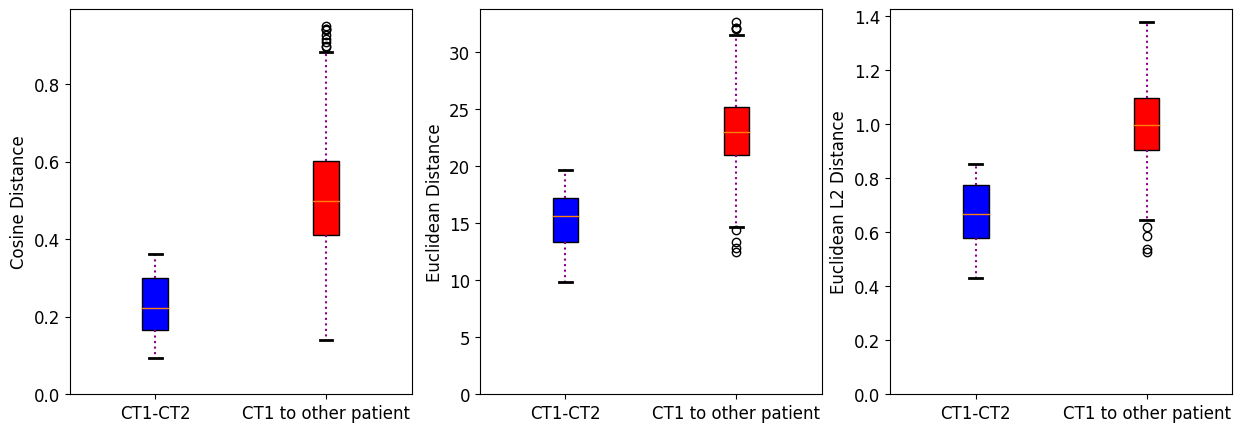

In [946]:
plot_two_x3([list_same_cos,list_same_euc,list_same_l2],[list_diff_cos,list_diff_euc,list_diff_l2])

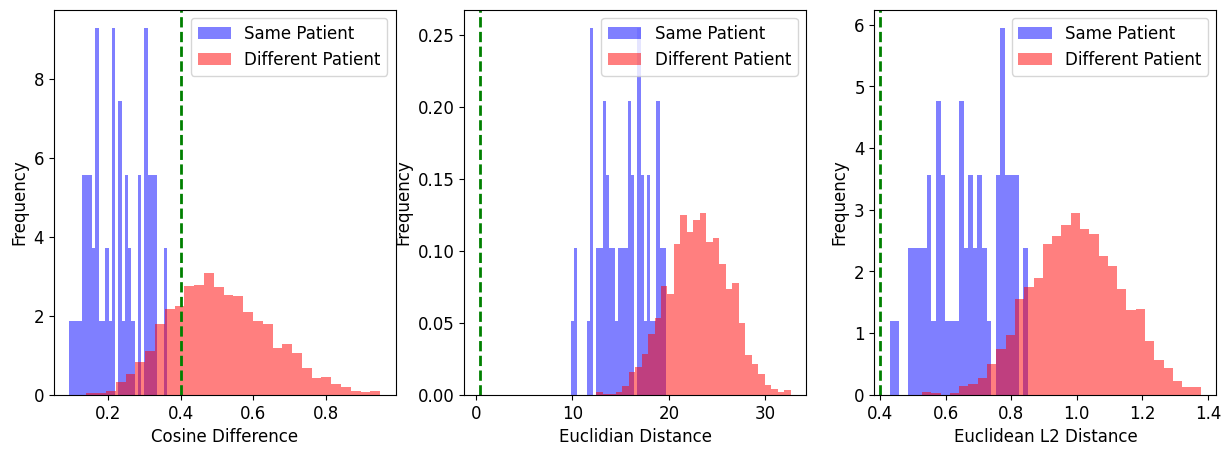

In [947]:
plot_hist_x3([list_same_cos,list_same_euc,list_same_l2],[list_diff_cos,list_diff_euc,list_diff_l2])

In [948]:
len(list_diff_cos)

1770

In [949]:
len(list_same_cos)

60

In [950]:
def get_dict_counts(list_all,skip,dist_diff,threshold):
    dict_counts = {}
    for p in [x for x in list_all if x not in skip]:
        dict_counts[p] = 0
        
    for p1 in dist_diff.keys():
        for p2 in dist_diff[p1].keys():
            if dist_diff[p1][p2] < threshold:
                dict_counts[p1]+=1
                dict_counts[p2]+=1
    return dict_counts    

In [ ]:
{'54': 1,
         '59': 3,
         '1255': 2,
         '274': 1,
         '478': 1,
         '437': 1,
         '474': 2,
         '447': 1,
         '19': 1,
         '454': 1,
         '651': 3,
         '518': 1,
         '961': 1,
         '600': 1,
         '1511': 3,
         '946': 3,
         '662': 1,
         '965': 1,
         '673': 1,
         '790': 3,
         '685': 1,
         '734': 1,
         '738': 1,
         '1552': 2,
         '755': 2,
         '773': 1,
         '937': 1,
         '892': 1,
         '945': 1,
         '973': 2,
         '1888': 1,
         '1892': 2,
         '2027': 1,
         '2056': 1,
         '2058': 1,
         '1288': 1})

In [951]:
cos_2 = get_dict_counts(list_all,skip,dist_diff_cos,threshold=0.3)
for k in cos_2.keys():
    if cos_2[k] > 0:
        print(k,":",cos_2[k])

19 : 6
59 : 5
81 : 6
118 : 6
272 : 2
274 : 2
437 : 2
448 : 2
454 : 5
459 : 2
462 : 1
473 : 3
478 : 3
483 : 4
600 : 4
625 : 1
628 : 3
651 : 4
662 : 2
673 : 6
685 : 6
694 : 6
734 : 4
755 : 4
770 : 4
773 : 3
790 : 2
833 : 3
838 : 1
848 : 3
892 : 8
937 : 2
945 : 5
946 : 5
965 : 3
973 : 2
1255 : 5
1288 : 2
1314 : 3
1511 : 4
1888 : 5
1892 : 2
1949 : 2
1987 : 3
2027 : 2
2037 : 1
2041 : 3
2056 : 1
2058 : 7
2061 : 6


In [952]:
euc_15 = get_dict_counts(list_all,skip,dist_diff_euc,threshold=15)
for k in euc_15.keys():
    if euc_15[k] > 0:
        print(k)

19
81
118
483
628
673
946
1314
1888
1949
2061


In [953]:
l2_6 = get_dict_counts(list_all,skip,dist_diff_l2,threshold=0.6)
for k in l2_6.keys():
    if l2_6[k] > 0:
        print(k)

19
483
628
673
946


(array([ 3.,  7., 10.,  4.,  6.,  8.,  3.,  8.,  9.,  2.]),
 array([0.09277341, 0.1197186 , 0.1466638 , 0.17360899, 0.20055418,
        0.22749937, 0.25444456, 0.28138975, 0.30833494, 0.33528013,
        0.36222532]),
 <BarContainer object of 10 artists>)

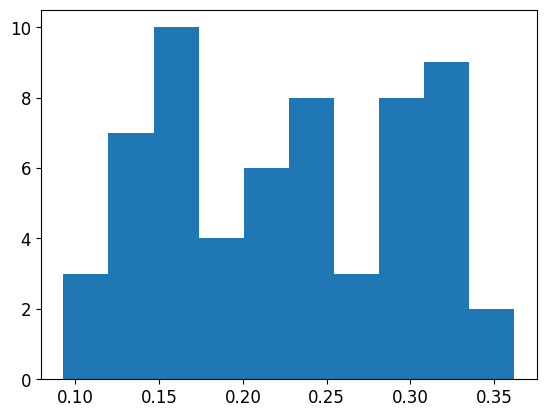

In [954]:
plt.hist(list_same_cos)

(array([  9.,  81., 242., 371., 398., 308., 202., 102.,  44.,  13.]),
 array([0.1394715 , 0.22054312, 0.30161473, 0.38268634, 0.46375796,
        0.54482957, 0.62590118, 0.7069728 , 0.78804441, 0.86911602,
        0.95018764]),
 <BarContainer object of 10 artists>)

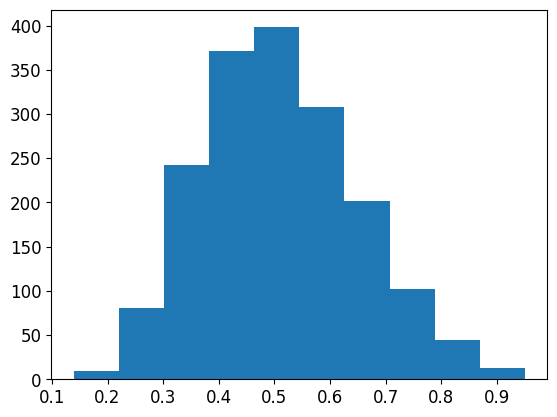

In [955]:
plt.hist(list_diff_cos)

In [956]:
stat, p_value = mannwhitneyu(list_same_cos, list_diff_cos, alternative='two-sided')

print(f'U statistic: {stat}')
print(f'p-value: {p_value}')


alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

U statistic: 2578.0
p-value: 3.950942526066379e-36
There is a significant difference between the two groups.


In [957]:
stat, p_value = mannwhitneyu(list_same_cos, list_anon_cos, alternative='two-sided')

print(f'U statistic: {stat}')
print(f'p-value: {p_value}')


alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

U statistic: 55.0
p-value: 5.373188339895247e-20
There is a significant difference between the two groups.


In [958]:
def welch_ttest(group1, group2):
    # Calculate the means
    mean1, mean2 = sum(group1) / len(group1), sum(group2) / len(group2)
    
    # Calculate the variances
    var1, var2 = stats.tvar(group1), stats.tvar(group2)
    
    # Calculate the lengths
    n1, n2 = len(group1), len(group2)
    
    # Welch's t-test formula
    t_value = (mean1 - mean2) / ((var1 / n1 + var2 / n2) ** 0.5)
    
    # Degrees of freedom for Welch's t-test
    df = ((var1 / n1 + var2 / n2) ** 2) / (((var1 / n1) ** 2 / (n1 - 1)) + ((var2 / n2) ** 2 / (n2 - 1)))
    
    # Calculate the p-value
    p_value = stats.t.cdf(t_value, df) * 2  # two-tailed p-value
    
    return t_value, df, p_value



t_value, df, p_value = welch_ttest(list_same_cos, list_diff_cos)
print(f"T-Value: {t_value}, Degrees of Freedom: {df}, P-Value: {p_value}")

T-Value: -28.435187064546046, Degrees of Freedom: 74.11171423159622, P-Value: 1.3037725101869537e-41


In [959]:
def bootstrap_mean_difference(group1, group2, num_samples=10000):
    # Concatenate the two groups
    combined = np.concatenate([group1, group2])
    
    # Create arrays to hold the bootstrap samples
    boot_means_diff = np.zeros(num_samples)
    
    # Generate bootstrap samples
    for i in range(num_samples):
        boot_sample = np.random.choice(combined, size=combined.shape, replace=True)
        boot_group1 = boot_sample[:len(group1)]
        boot_group2 = boot_sample[len(group1):]
        
        # Calculate the mean difference for the bootstrap sample
        boot_means_diff[i] = np.mean(boot_group1) - np.mean(boot_group2)
    
    # Calculate the confidence interval
    conf_interval = np.percentile(boot_means_diff, [2.5, 97.5])
    
    return boot_means_diff, conf_interval

boot_means_diff, conf_interval = bootstrap_mean_difference(list_same_cos, list_diff_cos)
print(f"Bootstrap Mean Differences: {boot_means_diff}")
print(f"95% Confidence Interval: {conf_interval}")

Bootstrap Mean Differences: [-0.01916529  0.0112364  -0.01214919 ...  0.02953579 -0.04351015
  0.02321566]
95% Confidence Interval: [-0.03654968  0.03786822]


In [960]:
d_one_cos,list_one_cos = get_diff_distances_dict_one_per_patient(emb_dict,'cosine',skip)
d_one_euc,list_one_euc = get_diff_distances_dict_one_per_patient(emb_dict,'euclidean',skip)
d_one_l2,list_one_l2 = get_diff_distances_dict_one_per_patient(emb_dict,'euclidean_l2',skip)

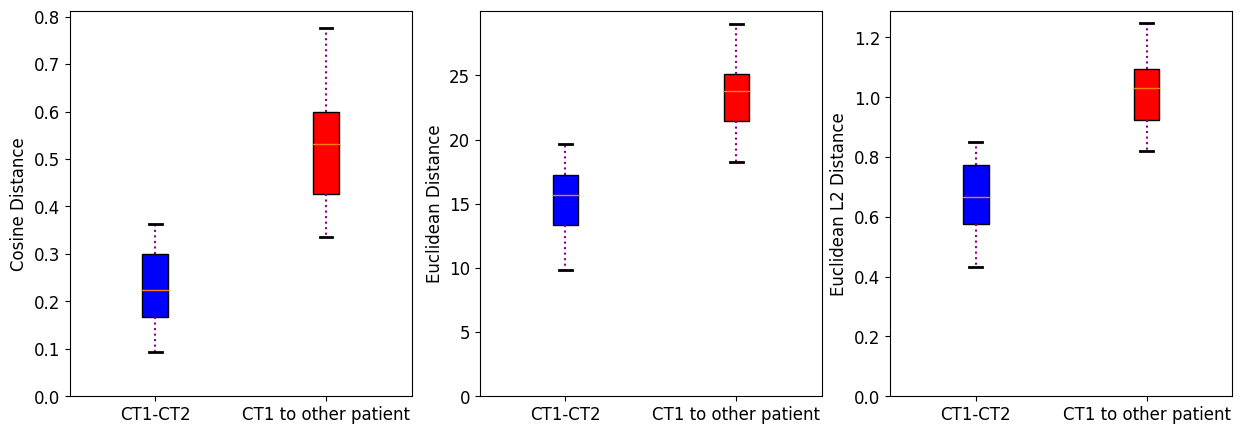

In [1014]:
plot_two_x3([list_same_cos,list_same_euc,list_same_l2],[list_one_cos,list_one_euc,list_one_l2])

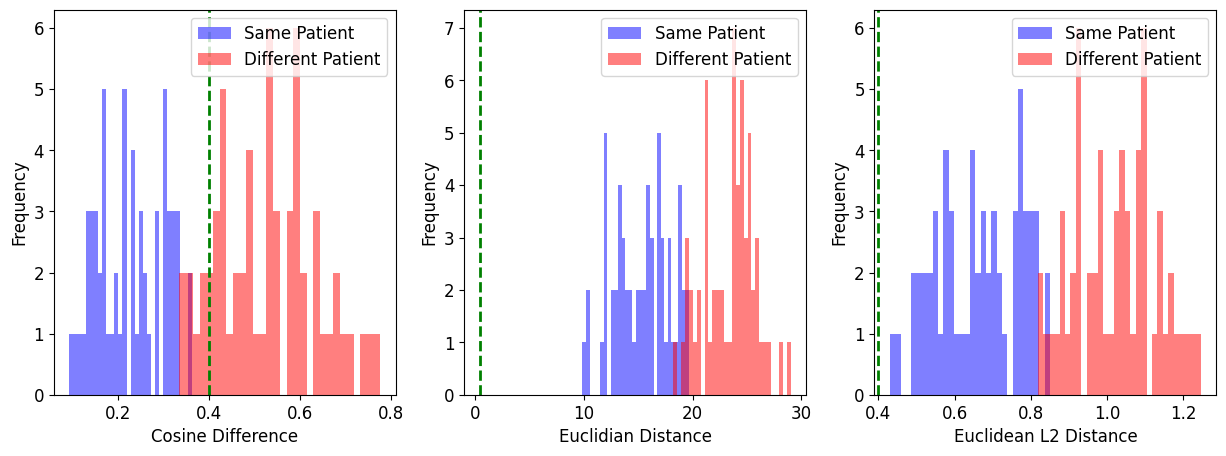

In [962]:
plot_hist_x3([list_same_cos,list_same_euc,list_same_l2],[list_one_cos,list_one_euc,list_one_l2],density=False)

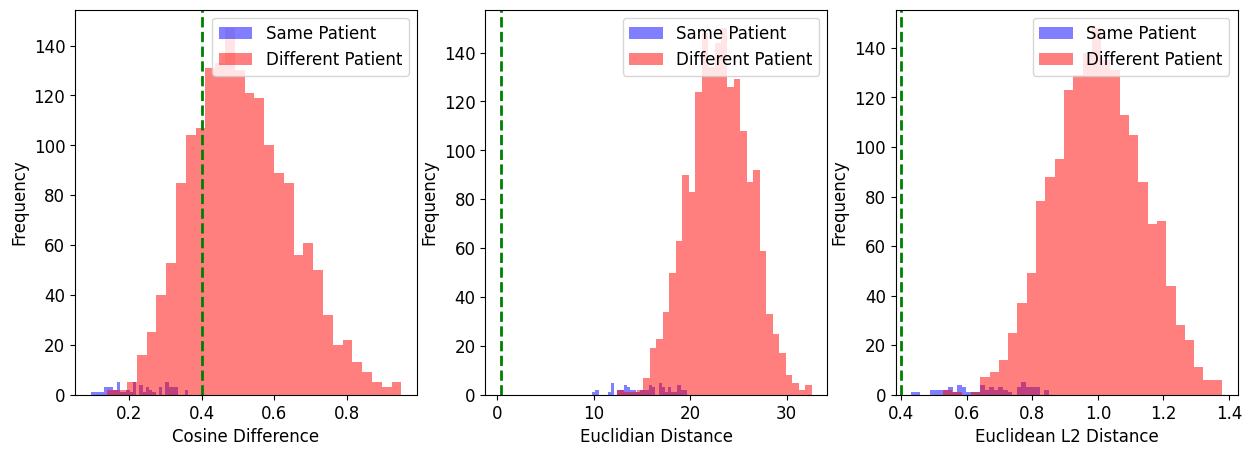

In [963]:
plot_hist_x3([list_same_cos,list_same_euc,list_same_l2],[list_diff_cos,list_diff_euc,list_diff_l2],density=False)

In [964]:
# [p for p in list_all if p not in skip]

In [965]:
# get list patients: 
list_A = []
for f in [x.split("_")[0] for x in os.listdir(PATH) if "_A" in x]:
    list_A.append(f)
list_A.sort(key = int)
# print(len(list_all))

list_todo = []
for p in list_all:
    if p  not in list_A:
        list_todo.append(p)
        

In [966]:
print(list_A)

['19', '54', '59', '70', '81', '118', '272', '274', '437', '447', '448', '452', '454', '459', '462', '467', '469', '473', '474', '478', '483', '518', '600', '625', '628', '633', '644', '651', '662', '673', '685', '694', '721', '723', '734', '738', '755', '770', '773', '786', '790', '820', '833', '838', '848', '892', '908', '910', '937', '945', '946', '961', '964', '965', '973', '1167', '1255', '1288', '1314', '1511', '1552', '1763', '1888', '1892', '1949', '1955', '1987', '2017', '2027', '2037', '2041', '2056', '2058', '2061']


In [967]:
print(list_todo)

['35', '638', '1502']


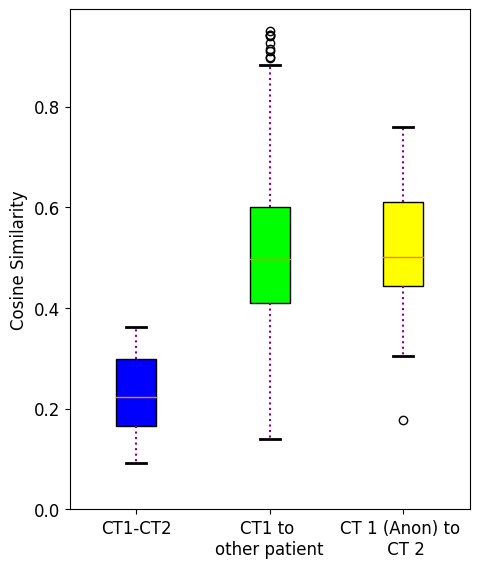

In [968]:
plot_whiskers_3(list_same_cos,list_diff_cos,list_anon_cos)

In [969]:
# list_same_cos

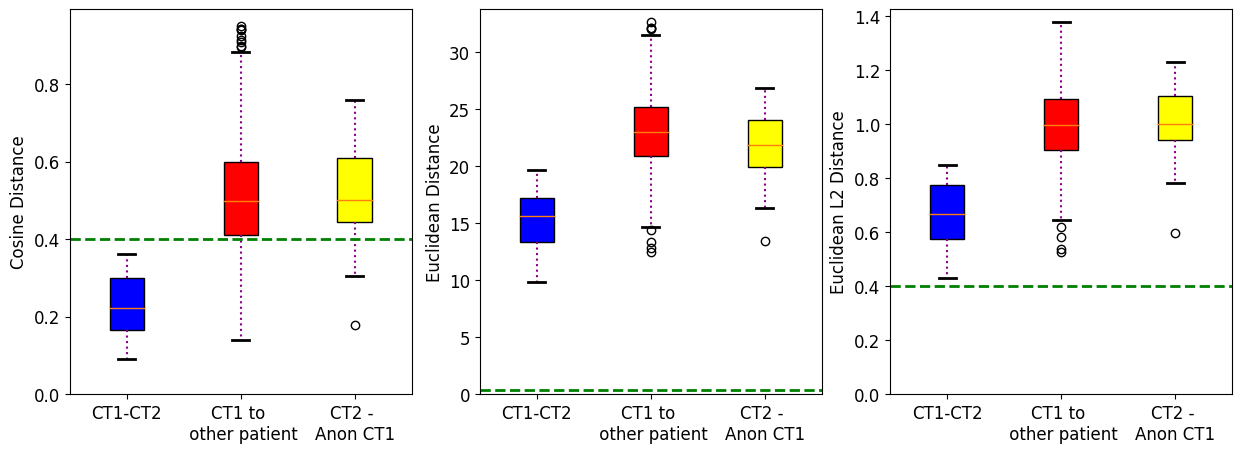

In [970]:
plot_3_x3([list_same_cos,list_same_euc,list_same_l2],[list_diff_cos,list_diff_euc,list_diff_l2],[list_anon_cos,list_anon_euc,list_anon_l2])

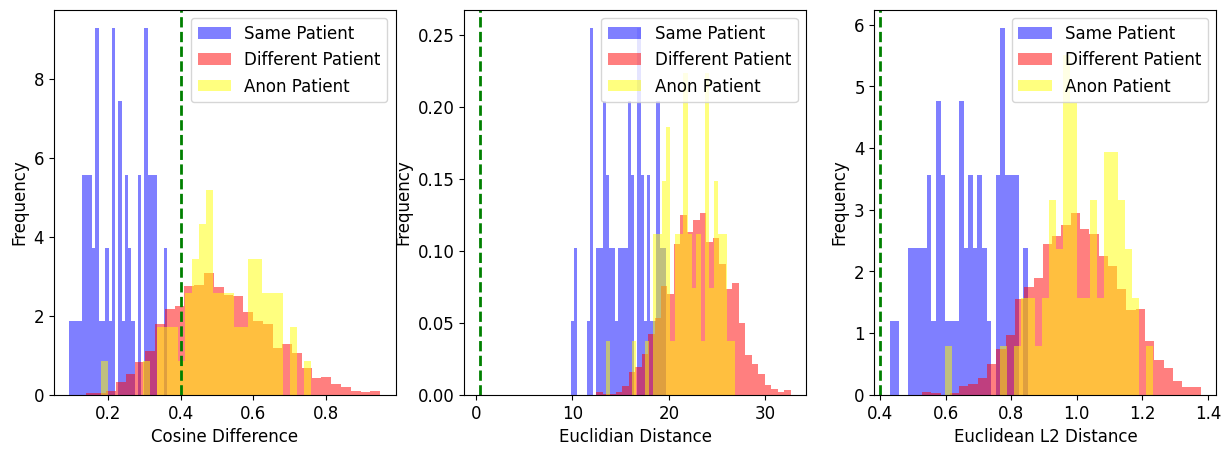

In [971]:
plot_hist_x3x3([list_same_cos,list_same_euc,list_same_l2],[list_diff_cos,list_diff_euc,list_diff_l2],[list_anon_cos,list_anon_euc,list_anon_l2],density=True)

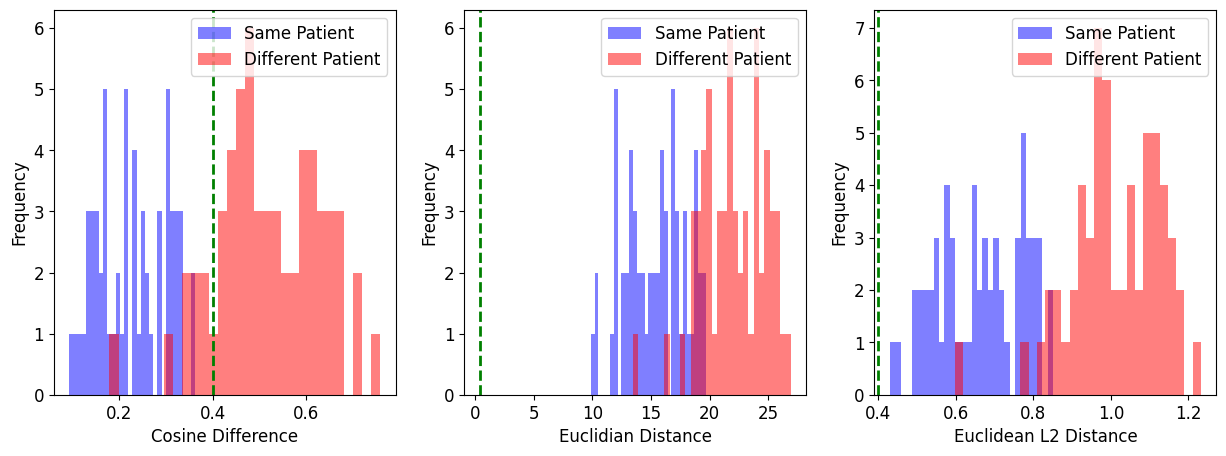

In [972]:
plot_hist_x3([list_same_cos,list_same_euc,list_same_l2],[list_anon_cos,list_anon_euc,list_anon_l2],density=False)

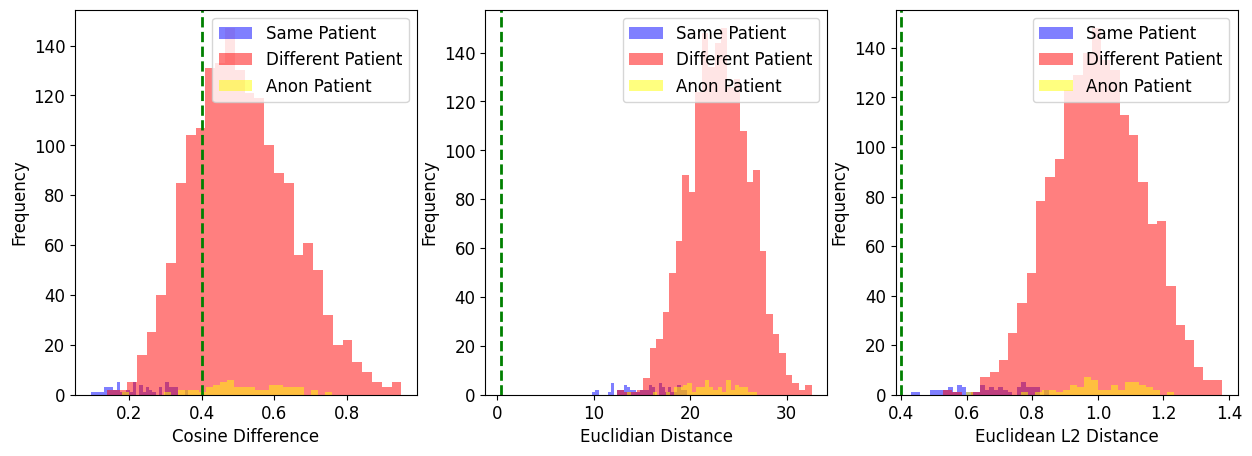

In [973]:
plot_hist_x3x3([list_same_cos,list_same_euc,list_same_l2],[list_diff_cos,list_diff_euc,list_diff_l2],[list_anon_cos,list_anon_euc,list_anon_l2],density=False)

In [974]:
for p in dist_anon_cos.keys():
    if dist_anon_cos[p] <  0.3310264075361308:
        print(p)
        print("Same:",dist_same_cos[p])
        print("Anon:",dist_anon_cos[p])
        print("**********")

274
Same: 0.1379795133503613
Anon: 0.305320297265928
**********
838
Same: 0.13299193933681674
Anon: 0.1785563186714788
**********


In [975]:
bad_same_rec = ['70','452','1763','1955','964']
# bad_same_rec_2 = ['54','518','600','651','662','734','755','1255','1511','2027','773','1892']
diff_too_low = []
# diff_too_low=['447','469','1552']#,'644'
diff_too_low_2 =[]
# diff_too_low_2=['19','483','628','673','946','770','1949','2061']

In [976]:
def process_images(p, path):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    image_paths = [f"{path}{p}_1.png", f"{path}{p}_2.png", f"{path}{p}_A.png"]
    titles = [f"Patient: {p} - Image 1", f"Patient: {p} - Image 2", f"Patient: {p} - Image A"]
    results = []
    
    for i, image_path in enumerate(image_paths):
        try:
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            detect = DeepFace.extract_faces(image_path, detector_backend='retinaface')
            facial_area = detect[0]['facial_area']
            confidence = detect[0]['confidence']
            
            x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 1)
            
            left_eye = facial_area['left_eye']
            right_eye = facial_area['right_eye']
            
            ax = axes[i]
            ax.imshow(image)
            ax.scatter(*left_eye, color='red', s=50, label='Left Eye')
            ax.scatter(*right_eye, color='blue', s=50, label='Right Eye')
            ax.set_title(titles[i])
            ax.axis('off')
            ax.legend()
            
            results.append(f"{titles[i]}: {facial_area}, {confidence}")
        except Exception as e:
            results.append(f"{titles[i]}: No face detected or error: {e}")
    
    plt.tight_layout()
    plt.show()
    return results

# for p in [l for l in list_all if l not in skip]:
#     print(p)
#     results = process_images(p, PATH)
#     print(" | ".join(results))

In [977]:
len(list_all) - len(skip)

60

In [978]:
8/59f

SyntaxError: invalid syntax (2304934429.py, line 1)

In [979]:

plot_embeddings(emb_dict,['1','2'],skip=skip,perplexity=5)

TypeError: plot_embeddings() got an unexpected keyword argument 'perplexity'

In [980]:

plot_embeddings(emb_dict,['A','2'],skip=skip)

IndexError: list index out of range

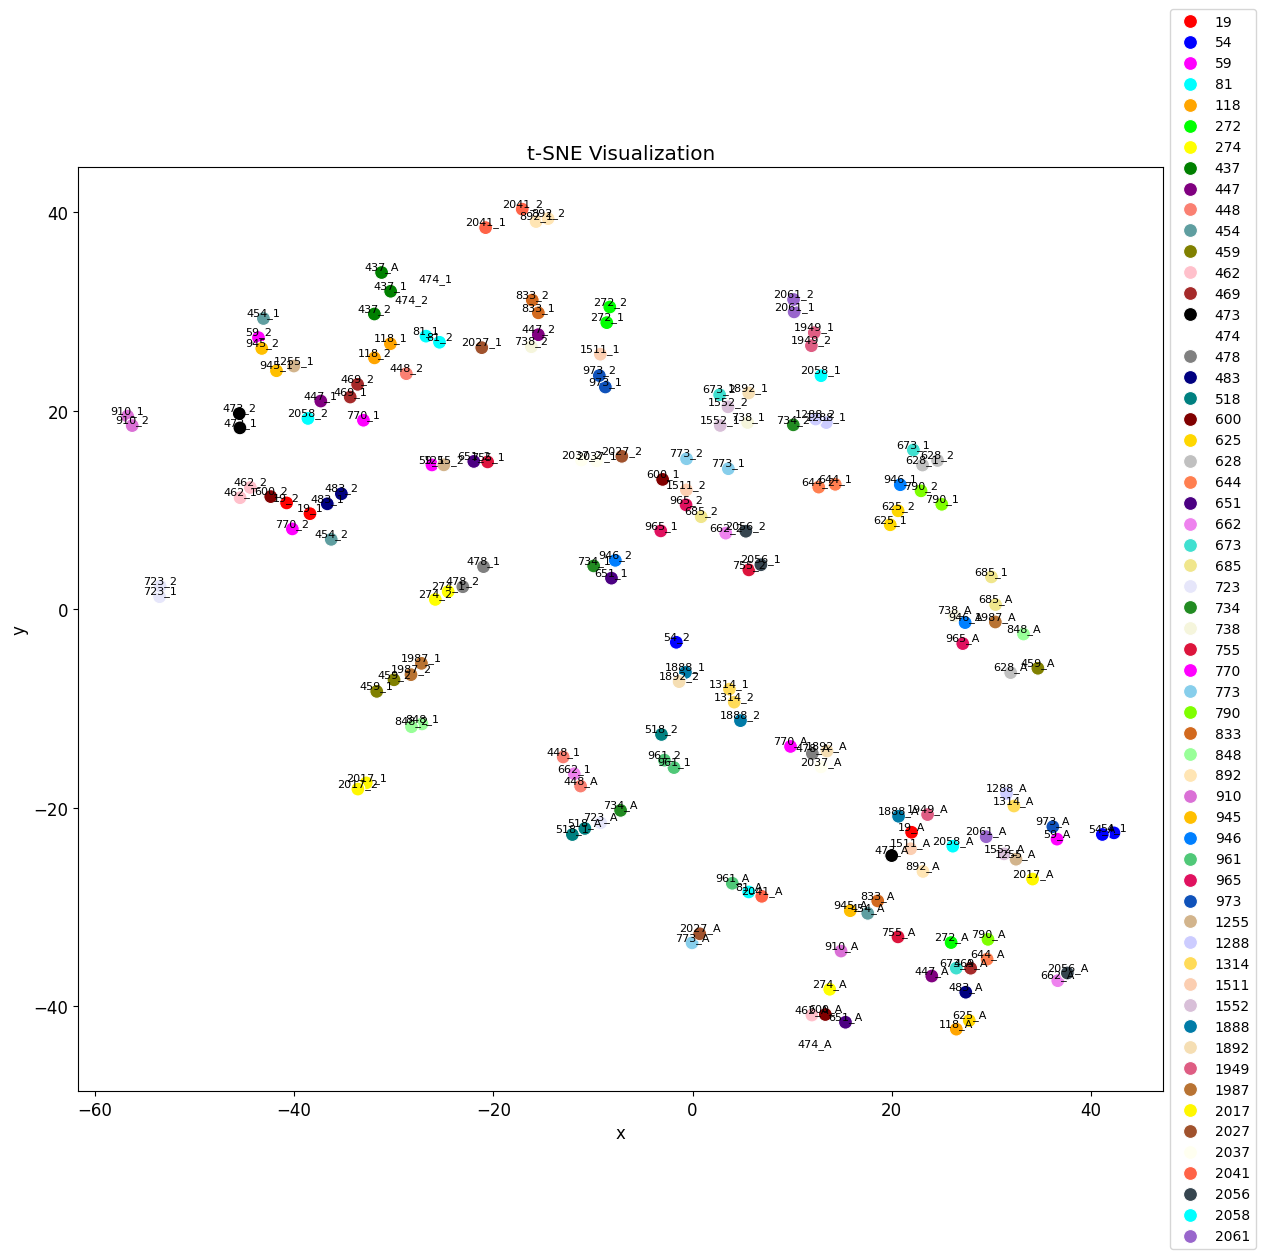

In [181]:

plot_embeddings(emb_dict,skip=skip)

In [224]:
from scipy.spatial.distance import cdist
from scipy.stats import levene

In [981]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from scipy.stats import levene

# Generate t-SNE representation
def compute_tsne(embeddings, perplexity=50):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(np.array(embeddings))
    return tsne_results

# Compute mean deviation
def compute_deviations(points, centroid):
    deviations = np.linalg.norm(points - centroid, axis=1)
    return deviations

# Plot t-SNE and calculate deviations
def plot_tsne_clusters(dict_emb, num=['1', '2'], skip=[],perplexity=30,plot=True):
    X = []
    labels = []
    n_labels = []
    for p in [x for x in dict_emb if x not in skip]:
        for n in num:
            X.append(dict_emb[p][n][0]['embedding'])
            labels.append(p)
            n_labels.append(n)
    
    tsne_results = compute_tsne(X,perplexity)
    df_tsne = pd.DataFrame(tsne_results, columns=['x', 'y'])
    df_tsne['label'] = labels
    df_tsne['n_labels'] = n_labels
    
   
    # Create a custom palette dictionary
    unique_labels = np.unique(labels)
 
    # Calculate centroids and deviations
    within_cluster_devs = []
    centroids = []
    
    for label in unique_labels:
        cluster_points = tsne_results[df_tsne['label'] == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
        deviations = compute_deviations(cluster_points, centroid)
        within_cluster_devs.append(deviations)
    
    between_cluster_dev = compute_deviations(np.array(centroids), np.mean(centroids, axis=0))
    
    # Levene's test for variance equality
    stat, p_value = levene(*within_cluster_devs)
    
    # Print deviations and p-value
    print(f"Within-cluster deviation: {np.mean([np.mean(dev) for dev in within_cluster_devs])}")
    print(f"Between-cluster deviation: {np.mean(between_cluster_dev)}")
    print(f"P-value: {p_value}")
    print(f"Ratio between cluster/within cluster deviation: { np.mean(between_cluster_dev) /np.mean([np.mean(dev) for dev in within_cluster_devs])}")

    if plot:
        fig, ax = plt.subplots(figsize=(10, 8))
        colours = [
            '#FF0000', '#0000FF', '#FF00FF', '#00FFFF', '#FFA500', '#00FF00', '#FFFF00', '#008000', '#800080', '#FA8072',
            '#5F9EA0', '#808000', '#FFC0CB', '#A52A2A', '#000000', '#46dee4', '#808080', '#000080', '#008080', '#800000',
            '#FFD700', '#C0C0C0', '#FF7F50', '#4B0082', '#EE82EE', '#40E0D0', '#F0E68C', '#E6E6FA', '#228B22', '#F5F5DC',
            '#DC143C', '#FF00FF', '#87CEEB', '#7FFF00', '#D2691E', '#98FF98', '#FFE5B4', '#DA70D6', '#e1feaf', '#007FFF',
            '#50C878', '#E0115F', '#0F52BA', '#D2B48C', '#CCCCFF', '#FFDB58', '#FBCEB1', '#D8BFD8', '#007BA7', '#F5DEB3',
            '#DE5D83', '#B87333', '#FFF700', '#A0522D', '#4605f6', '#FF6347', '#36454F', '#00FFFF', '#9966CC','#535970',
            '#2a8373','#7e338e','#73d635','#93550a','#fb17a8'
        ]
    
        palette = dict(zip(unique_labels, colours[:len(unique_labels)]))
        
        sns.scatterplot(x='x', y='y', s=75, hue='label', palette=palette, data=df_tsne, ax=ax)
        x = df_tsne['x'].values
        y = df_tsne['y'].values
        
        # Add text annotations
        for i, txt in enumerate(df_tsne['label']):
            if df_tsne['n_labels'][i] == 'A':
                txt = txt +"_A"
            plt.text(x[i], y[i], txt, fontsize=8, ha='center', va='bottom')
                
                    
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
        plt.show()

In [982]:
for perplexity in [5,10,15,20,25,30,35,40,45,50]:
    print("**************************************************")
    print("Perplexity:", perplexity)
    plot_tsne_clusters(emb_dict,['1','2'],skip=skip,perplexity=perplexity,plot=False)
    

**************************************************
Perplexity: 5
Within-cluster deviation: 5.325667858123779
Between-cluster deviation: 25.313495635986328
P-value: 2.0633685255112754e-09
Ratio between cluster/within cluster deviation: 4.753111839294434
**************************************************
Perplexity: 10
Within-cluster deviation: 3.77068829536438
Between-cluster deviation: 16.372108459472656
P-value: 2.9419611357212135e-06
Ratio between cluster/within cluster deviation: 4.341941833496094
**************************************************
Perplexity: 15
Within-cluster deviation: 2.4299895763397217
Between-cluster deviation: 12.051556587219238
P-value: 1.0848811623197855e-07
Ratio between cluster/within cluster deviation: 4.959509372711182
**************************************************
Perplexity: 20
Within-cluster deviation: 1.4663193225860596
Between-cluster deviation: 8.022340774536133
P-value: 1.4375729873908644e-16
Ratio between cluster/within cluster deviation: 5.4

Within-cluster deviation: 1.4663193225860596
Between-cluster deviation: 8.022340774536133
P-value: 1.4375729873908644e-16
Ratio between cluster/within cluster deviation: 5.471073627471924


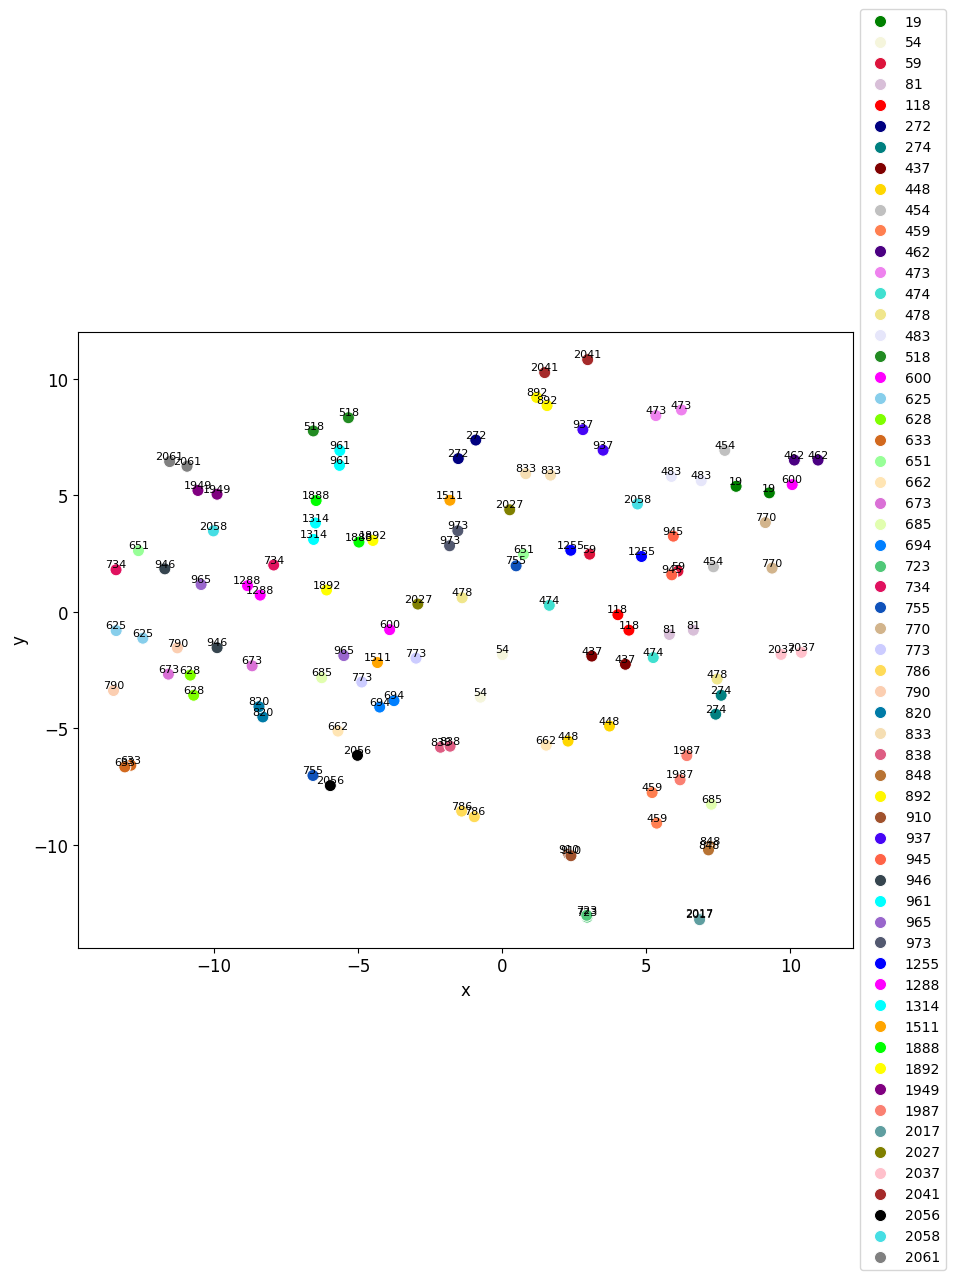

In [983]:
plot_tsne_clusters(emb_dict,['1','2'],skip=skip,perplexity=20)

Within-cluster deviation: 7.395151138305664
Between-cluster deviation: 4.105325698852539
P-value: 0.5021644520642148
Ratio between cluster/within cluster deviation: 0.5551375150680542


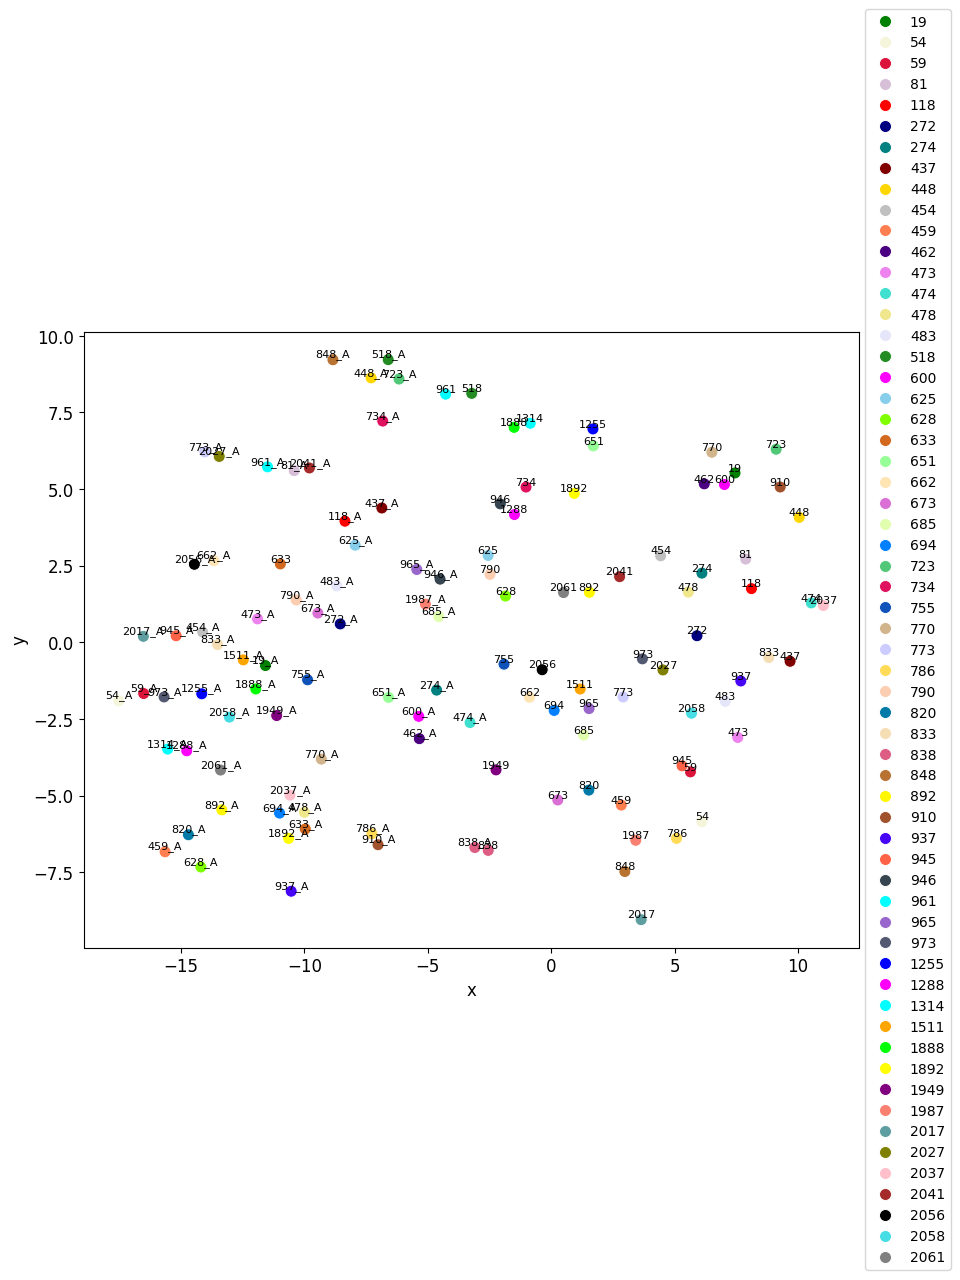

In [984]:
plot_tsne_clusters(emb_dict,['A','2'],skip=skip,perplexity=20)

In [985]:
data = np.concatenate([list_same_cos, list_diff_cos])
hist, bin_edges = np.histogram(data, bins=30)

# Calculate cumulative sums and means
cumulative_sum = np.cumsum(hist)
cumulative_mean = np.cumsum(hist * bin_edges[:-1])

# Calculate global mean
global_mean = cumulative_mean[-1] / cumulative_sum[-1]

# Calculate between-class variance for each threshold
between_class_variance = (global_mean * cumulative_sum - cumulative_mean) ** 2 / (cumulative_sum * (cumulative_sum[-1] - cumulative_sum))

# Find the threshold that maximizes the between-class variance
optimal_threshold_index = np.argmax(between_class_variance)
optimal_threshold = bin_edges[optimal_threshold_index]

print(f"The optimal threshold is: {optimal_threshold}")

The optimal threshold is: 0.921607161222429


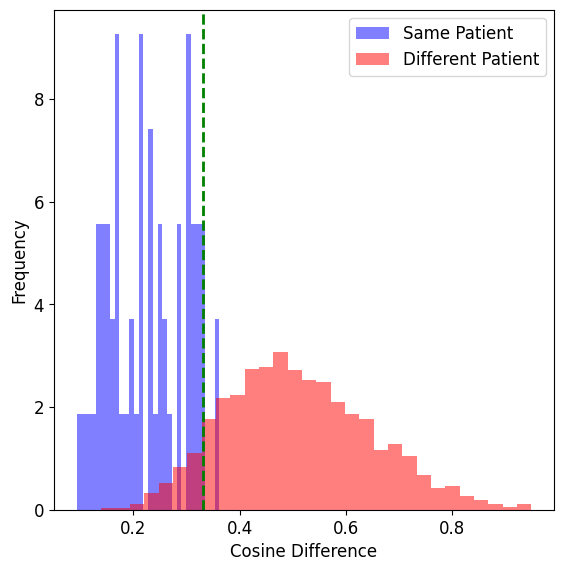

In [986]:
plot_hist_x3([list_same_cos], [list_diff_cos],threshold= 0.3310264075361308)

In [988]:
from sklearn.metrics import roc_curve

# Assuming list1 and list2 are your two lists of cosine distances
data = np.concatenate([list_same_cos, list_diff_cos])
labels = np.concatenate([np.zeros(len(list_same_cos)), np.ones(len(list_diff_cos))])

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(labels, data)

# Find the optimal threshold (Youden's J statistic)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"The optimal threshold is: {optimal_threshold}")

The optimal threshold is: 0.3310264075361308


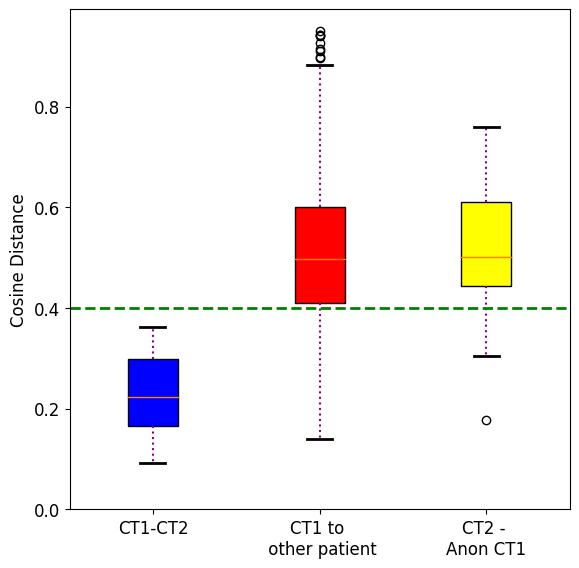

In [989]:
plot_3_x3([list_same_cos],[list_diff_cos],[list_anon_cos])

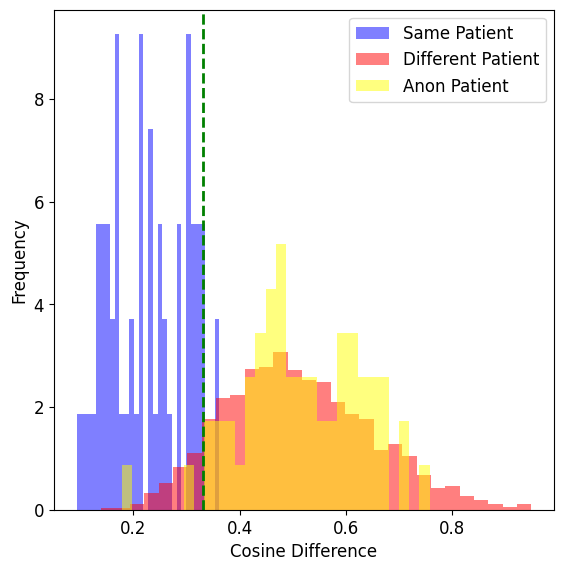

In [990]:
plot_hist_x3x3([list_same_cos], [list_diff_cos],[list_anon_cos],threshold=optimal_threshold)#,threshold= 0.3310264075361308)

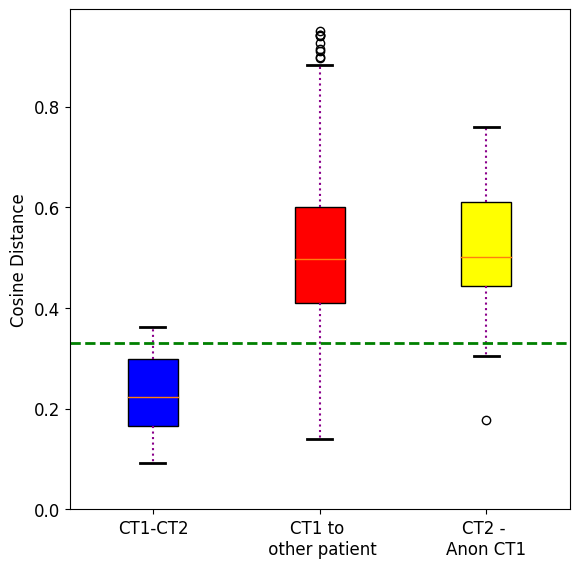

In [991]:
plot_3_x3([list_same_cos],[list_diff_cos],[list_anon_cos],threshold= 0.3310264075361308)

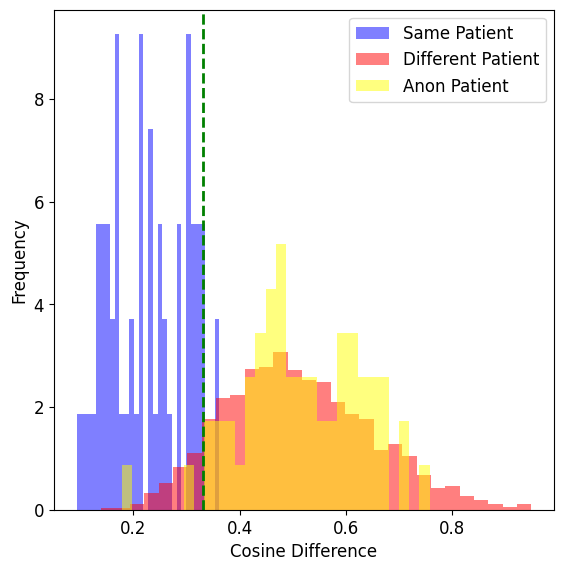

In [992]:
plot_hist_x3x3([list_same_cos], [list_diff_cos],[list_anon_cos],threshold= 0.3310264075361308)

In [993]:
[x for x in list_all if x not in undetected]

['19',
 '35',
 '54',
 '59',
 '70',
 '81',
 '118',
 '272',
 '274',
 '437',
 '447',
 '448',
 '452',
 '454',
 '459',
 '462',
 '467',
 '469',
 '473',
 '474',
 '478',
 '483',
 '518',
 '600',
 '625',
 '628',
 '633',
 '644',
 '651',
 '662',
 '673',
 '685',
 '694',
 '723',
 '734',
 '738',
 '755',
 '770',
 '773',
 '786',
 '790',
 '820',
 '833',
 '838',
 '848',
 '892',
 '908',
 '910',
 '937',
 '945',
 '946',
 '961',
 '964',
 '965',
 '973',
 '1167',
 '1255',
 '1288',
 '1314',
 '1511',
 '1552',
 '1763',
 '1888',
 '1892',
 '1949',
 '1955',
 '1987',
 '2017',
 '2027',
 '2037',
 '2041',
 '2056',
 '2058',
 '2061']

In [994]:
age_dict = {
    '19': 'M',
 '54':'M',
 '59':'F',
 '81':'M',
 '118':'M',
 '272':'M',
 '274':'M',
 '437':'M',
 '447':'M',
 '448':'M',
 '454':'F',
 '459':'M',
 '462':'M',
 '469':'M',
 '473':'M',
 '474':'M',
 '478':'F',
 '483':'M',
 '518':'M',
 '600':'M',
 '625':'M',
 '628':'M',
 '644':'M',
 '651':'M',
 '662':'M',
 '673':'M',
 '685':'M',
 '723':'M',
 '734':'F',
 '738':'M',
 '755':'F',
 '770':'M',
 '773':'M',
 '790':'M',
 '833':'M',
 '848':'M',
 '892':'M',
 '910':'M',
 '937':'F',
 '945':'F',
 '946':'M',
 '961':'M',
 '965':'M',
 '973':'M',
 '1255':'M',
 '1288':'F',
 '1314':'M',
 '1511':'M',
 '1552':'F',
 '1888':'F',
 '1892':'F',
 '1949':'M',
 '1987':'M',
 '2017':'M',
 '2027':'M',
 '2037':'M',
 '2041':'M',
 '2056':'M',
 '2058':'M',
 '2061':'M'
}


In [995]:
dist_M = []
dist_F = []
for p in age_dict:
    if p == '937':
        continue
    v_a = emb_dict[p]['A'][0]['embedding']
    v_b = emb_dict[p]['2'][0]['embedding']
    # to do -- change 0 to be taken before
    dist =  verification.find_distance(v_a, v_b, 'cosine')
    if age_dict[p] == 'M':
        dist_M.append(dist)
    else:
        dist_F.append(dist)

In [996]:
np.mean(dist_M)

0.5193501863198855

In [997]:
np.mean(dist_F)

0.5477593259694389

In [998]:
from scipy.optimize import curve_fit


In [999]:
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

In [1000]:
def plot_fit(data, num_bins):

    # Create histogram
    hist_data = np.histogram(data, bins=num_bins)
    
    # Bin centers
    bin_centers = (hist_data[1][:-1] + hist_data[1][1:]) / 2
    
    # Fit the Gaussian curve
    popt, pcov = curve_fit(gaussian, bin_centers, hist_data[0])

    x_values = np.linspace(0, 1, num=100)
    
    # Plot histogram and fitted curve
    plt.hist(data, bins=num_bins, alpha=0.6)
    plt.plot(x_values, gaussian(x_values, *popt), color='red', linewidth=2)
    plt.xlim(0,1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram and Fitted Gaussian Curve')
    plt.show()

In [1001]:
def plot_fit_3(data1, data2, data3, num_bins, threshold=0.331):
    # Define the range for the histograms
    data_range = (0, 1)
    
    # Create histograms with density=True and the same range
    hist_data, bin_edges = np.histogram(data1, bins=num_bins, density=True, range=data_range)
    hist_data2, bin_edges2 = np.histogram(data2, bins=num_bins, density=True, range=data_range)
    hist_data3, bin_edges3 = np.histogram(data3, bins=num_bins, density=True, range=data_range)
    
    # Bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
    bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2
    
    # Fit the Gaussian curve and get the covariance matrix
    popt, pcov = curve_fit(gaussian, bin_centers, hist_data)
    popt2, pcov2 = curve_fit(gaussian, bin_centers2, hist_data2)
    popt3, pcov3 = curve_fit(gaussian, bin_centers3, hist_data3)

    # Extract mean and variance from the fit parameters
    mean1, sigma1 = popt[0], popt[1]
    mean2, sigma2 = popt2[0], popt2[1]
    mean3, sigma3 = popt3[0], popt3[1]

    # Calculate the certainty of the fit (standard deviation of the parameters)
    certainty1 = np.sqrt(np.diag(pcov))
    certainty2 = np.sqrt(np.diag(pcov2))
    certainty3 = np.sqrt(np.diag(pcov3))

    x_values = np.linspace(0, 1, num=100)
    
    # Plot histograms and fitted curves
    plt.hist(data1, bins=num_bins, alpha=0.6, color='blue', density=True, range=data_range, label='Data1')
    plt.plot(x_values, gaussian(x_values, *popt), color='navy', linewidth=2, label='Fit1')
    
    plt.hist(data2, bins=num_bins, alpha=0.6, color='red', density=True, range=data_range, label='Data2')
    plt.plot(x_values, gaussian(x_values, *popt2), color='darkred', linewidth=2, label='Fit2')
    
    plt.hist(data3, bins=num_bins, alpha=0.6, color='yellow', density=True, range=data_range, label='Data3')
    plt.plot(x_values, gaussian(x_values, *popt3), color='orange', linewidth=2, label='Fit3')

    plt.vlines(x=threshold, ymin=0, ymax=1, colors='green', linewidth=2, label='Threshold')
    
    plt.xlim(0, 1)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Histogram and Fitted Gaussian Curves')
    plt.legend()
    plt.show()

    # Print the results
    print(f"Fit 1: Mean = {mean1}, Variance = {sigma1**2}, Certainty = {certainty1}")
    print(f"Fit 2: Mean = {mean2}, Variance = {sigma2**2}, Certainty = {certainty2}")
    print(f"Fit 3: Mean = {mean3}, Variance = {sigma3**2}, Certainty = {certainty3}")


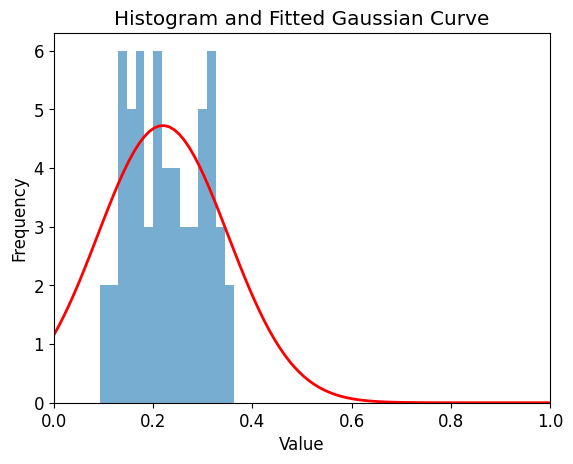

In [1002]:
plot_fit(list_same_cos,15)

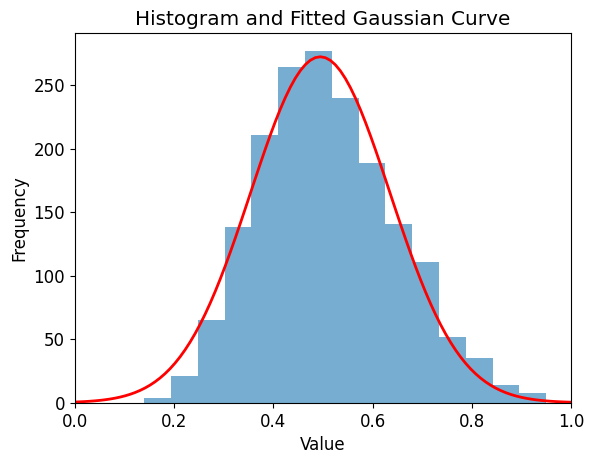

In [1003]:
plot_fit(list_diff_cos,15)

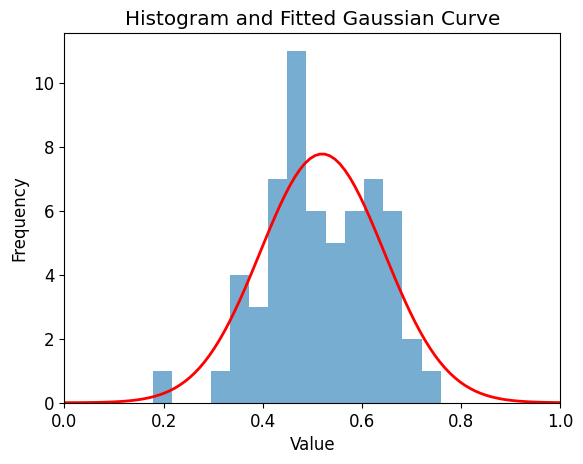

In [1004]:
plot_fit(list_anon_cos,15)

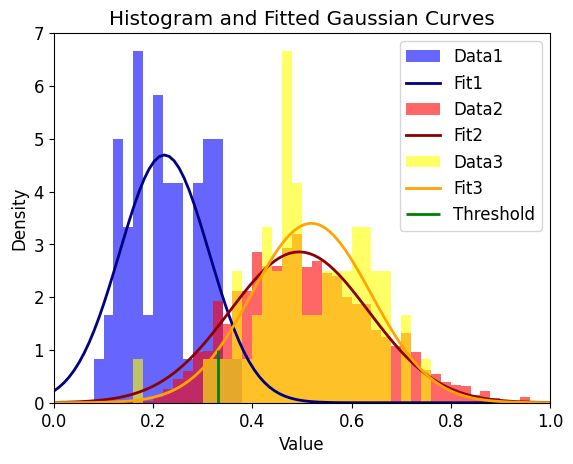

Fit 1: Mean = 4.692226801305703, Variance = 0.04959921048683508, Certainty = [0.44380306 0.00984143 0.00992718]
Fit 2: Mean = 2.8570397410313153, Variance = 0.24446942387729537, Certainty = [0.06482595 0.00366912 0.00366939]
Fit 3: Mean = 3.398158792248378, Variance = 0.2694810507420442, Certainty = [0.30379223 0.01243593 0.01243595]


In [1011]:
plot_fit_3(list_same_cos,list_diff_cos,list_anon_cos,50)

In [880]:
2/65

0.03076923076923077